In [ ]:
library(readr)

In [ ]:
df <- read_csv("/content/combined_ecg_data.csv")

Rows: 140000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, Athlete

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(df)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Athlete
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10251,-1096,-10267,-3724,9391,-5395,13580,11410,14721,16103,6662,-3806,1
8643,-2558,-10829,-1862,8973,-6448,13331,11096,14093,15416,5897,-4548,1
5427,-3776,-9985,743,6469,-6711,13829,10991,13644,14815,5460,-5105,1
5427,-4507,-10829,1116,7304,-7501,13331,10467,13016,14128,4696,-5848,1
6231,-4751,-11673,1116,8138,-8027,13331,10049,12477,13355,3822,-6962,1
5427,-5481,-11954,1860,8138,-8554,12832,9630,11938,12926,3385,-7704,1


Twenty-eight healthy athletes were recruited for this study. 19 (68%) of the participants were men and 9 (32%) were women. Participant's ages ranged from 20 to 43 years (Mean = 25 years, standard deviation = 4.7 years). The distribution among sports was 24 rowers (86%), 2 kayakers (7%) and 2 cyclists (7%). The average amount of training hours for 2017 was 822 hours with a standard deviation of 117 hours, in 2018 the average amount of training was 820 hours with a standard deviation of 113 hours and in 2019 the average amount of training was 798 hours with a standard deviation of 171 hours.

In [ ]:
# Number of observations per athlete
obs_per_athlete <- nrow(df) / 28

# Create a vector for Gender, repeating "Male" and "Female" the necessary number of times
gender_vector <- rep(c(rep("Male", obs_per_athlete * 19), rep("Female", obs_per_athlete * 9)), times = 1)

# Assign the gender vector to the dataframe
df$Gender <- gender_vector

# Similarly for Sport, adjust the numbers as per your distribution
sport_vector <- rep(c(rep("Rowing", obs_per_athlete * 24), rep("Kayaking", obs_per_athlete * 2), rep("Cycling", obs_per_athlete * 2)), times = 1)
df$Sport <- sport_vector


In [ ]:
# Assuming a normal distribution and that df has a row for each athlete for each year
df$Training2017 <- rnorm(nrow(df), mean = 822, sd = 117)
df$Training2018 <- rnorm(nrow(df), mean = 820, sd = 113)
df$Training2019 <- rnorm(nrow(df), mean = 798, sd = 171)

# Then, calculate an average of these simulated values for a more nuanced estimate
df$Simulated_Avg_Training <- rowMeans(df[, c('Training2017', 'Training2018', 'Training2019')])

# View the first few rows to verify
head(df,10)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Athlete,Gender,Sport,Training2017,Training2018,Training2019,Simulated_Avg_Training
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
10251,-1096,-10267,-3724,9391,-5395,13580,11410,14721,16103,6662,-3806,1,Male,Rowing,935.3347,903.6270,814.1107,884.3575
8643,-2558,-10829,-1862,8973,-6448,13331,11096,14093,15416,5897,-4548,1,Male,Rowing,686.9353,939.8613,1042.9450,889.9139
5427,-3776,-9985,743,6469,-6711,13829,10991,13644,14815,5460,-5105,1,Male,Rowing,826.7363,843.8690,380.6964,683.7672
5427,-4507,-10829,1116,7304,-7501,13331,10467,13016,14128,4696,-5848,1,Male,Rowing,781.6344,921.4977,842.7062,848.6127
6231,-4751,-11673,1116,8138,-8027,13331,10049,12477,13355,3822,-6962,1,Male,Rowing,752.8014,845.6427,686.1159,761.5200
5427,-5481,-11954,1860,8138,-8554,12832,9630,11938,12926,3385,-7704,1,Male,Rowing,811.6301,947.5145,814.5129,857.8858
4623,-5969,-11954,2605,7721,-8817,12832,9316,11669,12410,2730,-8076,1,Male,Rowing,721.2272,724.3908,731.6276,725.7486
4221,-6943,-12517,3722,7721,-9606,12583,9107,11400,11981,2074,-9004,1,Male,Rowing,824.9267,749.8709,779.0370,784.6115
3416,-7187,-12235,4467,6886,-9606,12334,8897,11131,11723,1637,-9190,1,Male,Rowing,820.1125,763.6142,943.3352,842.3540


In [ ]:
set.seed(42) # For reproducibility

# Generate ages based on the provided distribution
ages <- rnorm(n = 28, mean = 25, sd = 4.7)

# Round ages, ensure they are within the specified range
ages <- round(ages)
ages <- ifelse(ages < 20, 20, ages)
ages <- ifelse(ages > 43, 43, ages)

# Create a dataframe for athletes and their ages
athletes_ages <- data.frame(Athlete = 1:28, Age = ages)

# Merge the age information with the main dataset
df<- merge(df, athletes_ages, by = "Athlete", all.x = TRUE)

# Display the first few rows to check
head(df)

,Athlete,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Gender,Sport,Training2017,Training2018,Training2019,Simulated_Avg_Training,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,10251,-1096,-10267,-3724,9391,-5395,13580,11410,14721,16103,6662,-3806,Male,Rowing,935.3347,903.6270,814.1107,884.3575,31
2,1,8643,-2558,-10829,-1862,8973,-6448,13331,11096,14093,15416,5897,-4548,Male,Rowing,686.9353,939.8613,1042.9450,889.9139,31
3,1,5427,-3776,-9985,743,6469,-6711,13829,10991,13644,14815,5460,-5105,Male,Rowing,826.7363,843.8690,380.6964,683.7672,31
4,1,5427,-4507,-10829,1116,7304,-7501,13331,10467,13016,14128,4696,-5848,Male,Rowing,781.6344,921.4977,842.7062,848.6127,31
5,1,6231,-4751,-11673,1116,8138,-8027,13331,10049,12477,13355,3822,-6962,Male,Rowing,752.8014,845.6427,686.1159,761.5200,31
6,1,5427,-5481,-11954,1860,8138,-8554,12832,9630,11938,12926,3385,-7704,Male,Rowing,811.6301,947.5145,814.5129,857.8858,31


In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(tidyr)

In [ ]:
summary(df)

    Athlete            V1               V2               V3        
 Min.   : 1.00   Min.   :-32767   Min.   :-32767   Min.   :-32767  
 1st Qu.: 7.75   1st Qu.:-15380   1st Qu.:-23405   1st Qu.:-24139  
 Median :14.50   Median : -5173   Median :-19200   Median :-20534  
 Mean   :14.50   Mean   : -5356   Mean   :-17264   Mean   :-17550  
 3rd Qu.:21.25   3rd Qu.:  2285   3rd Qu.:-13034   3rd Qu.:-14862  
 Max.   :28.00   Max.   : 32767   Max.   : 32766   Max.   : 32767  
       V4               V5               V6               V7        
 Min.   :-32767   Min.   :-32767   Min.   :-32767   Min.   :-32767  
 1st Qu.:  7361   1st Qu.:   528   1st Qu.:-24749   1st Qu.: 10705  
 Median : 15455   Median : 10668   Median :-21170   Median : 17112  
 Mean   : 13566   Mean   :  8668   Mean   :-19045   Mean   : 14653  
 3rd Qu.: 20631   3rd Qu.: 16947   3rd Qu.:-16230   3rd Qu.: 21092  
 Max.   : 32766   Max.   : 32766   Max.   : 32767   Max.   : 32766  
       V8               V9              V

In [ ]:
num_vars <- df %>%
  select(starts_with("V")) %>%
  gather(key = "variable", value = "value") %>%
  ggplot(aes(x = value)) +
  geom_histogram(bins = 20) +
  facet_wrap(~ variable, scales = "free") +
  labs(title = "Distribution of ECG metrics")

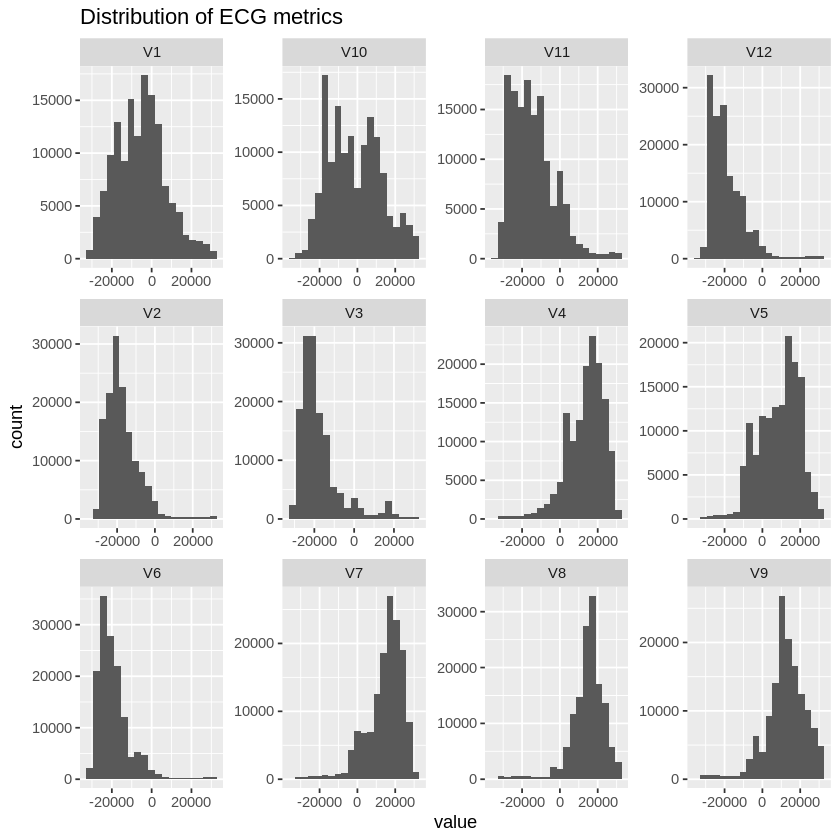

In [ ]:
print(num_vars)

In [ ]:
correlation_matrix <- cor(df %>%
                            select(starts_with("V")))


In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



corrplot 0.92 loaded



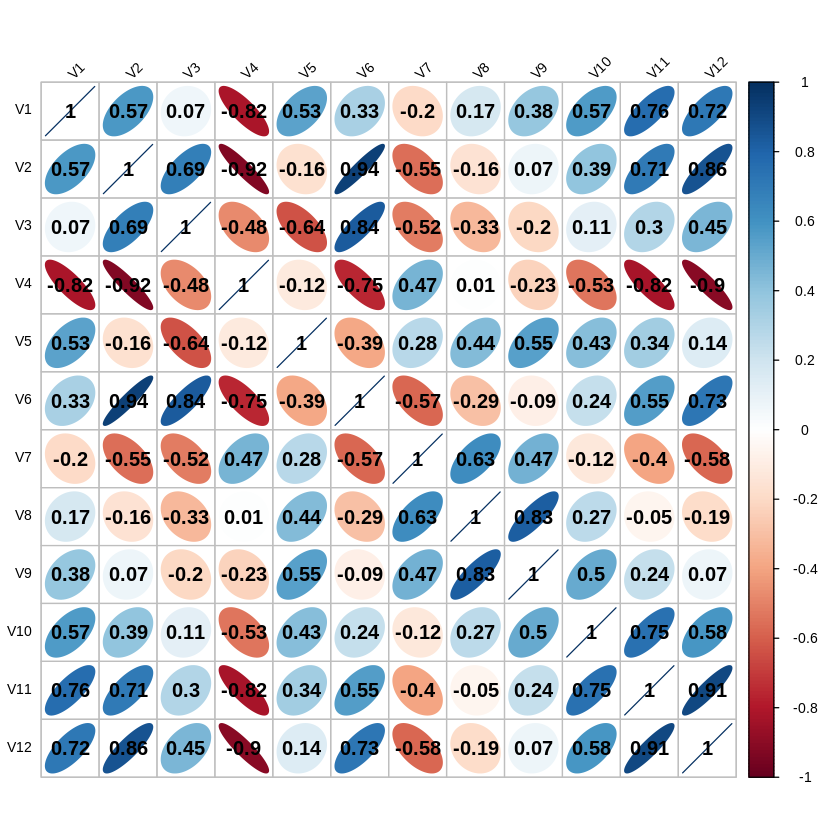

In [ ]:
# Using corrplot package for better visualization
library(corrplot)

corrplot(correlation_matrix, method = "ellipse",
         tl.col = "black", tl.srt = 45, tl.cex = 0.7,
         addrect = 4, cl.cex = 0.7, addCoef.col = "black")

In [ ]:
age_counts <- table(df$Age)

# Convert the result to a data frame
age_counts_df <- as.data.frame(age_counts)
names(age_counts_df) <- c("Age", "Frequency")

# Create the bar chart
bar_chart <- ggplot(age_counts_df, aes(x = Age, y = Frequency)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Frequency of Ages", x = "Age", y = "Frequency") +
  theme_minimal()

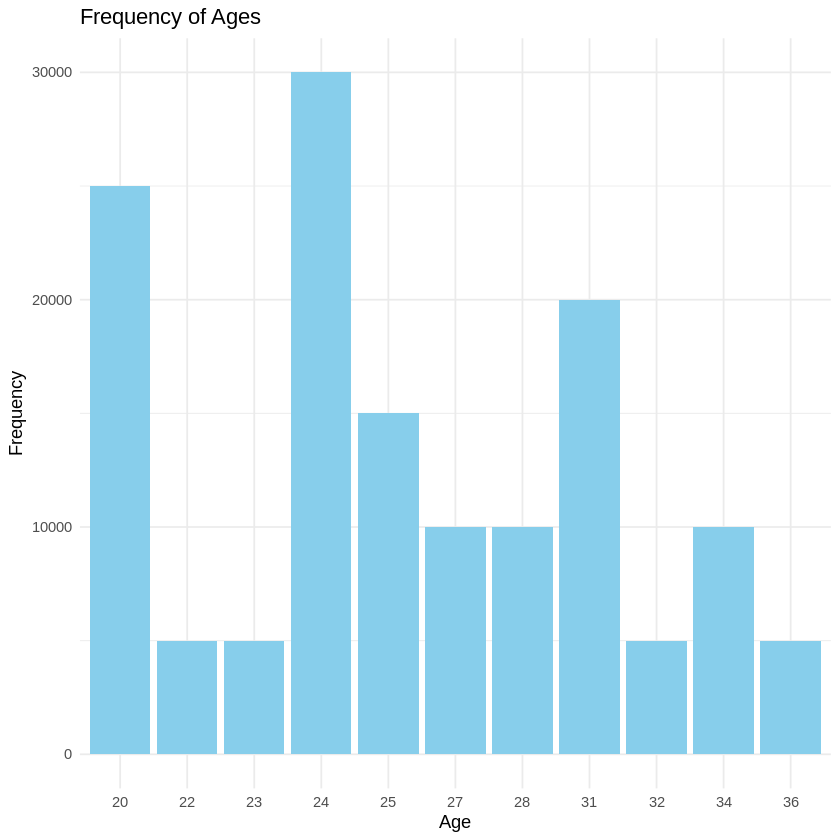

In [ ]:
print(bar_chart)

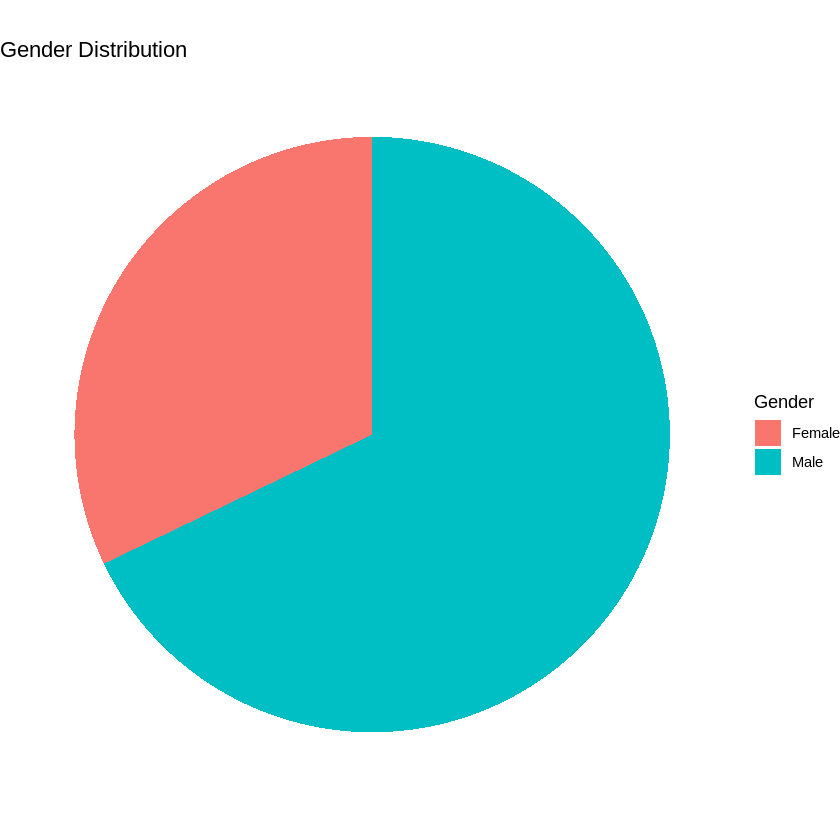

In [ ]:
gender_pie <- ggplot(df, aes(x = "", fill = Gender)) +
  geom_bar(width = 1) +
  coord_polar(theta = "y") +
  labs(title = "Gender Distribution") +
  theme_void()

# Display the pie chart
print(gender_pie)

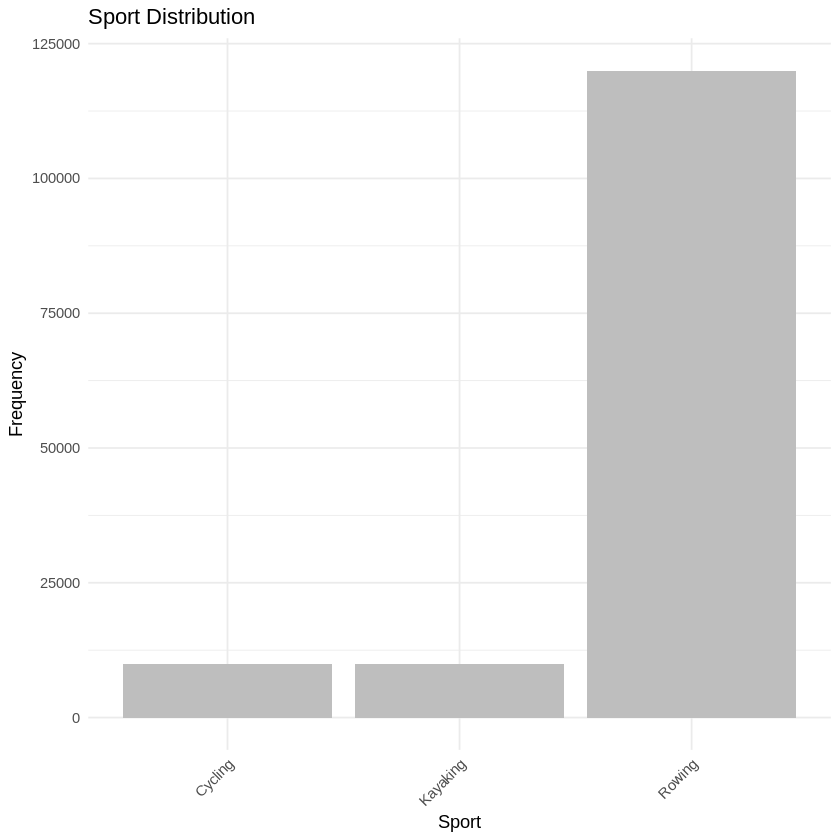

In [ ]:
sport_bar <- ggplot(df, aes(x = Sport)) +
  geom_bar(fill = "grey") +
  labs(title = "Sport Distribution", x = "Sport", y = "Frequency") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Display the bar chart
print(sport_bar)

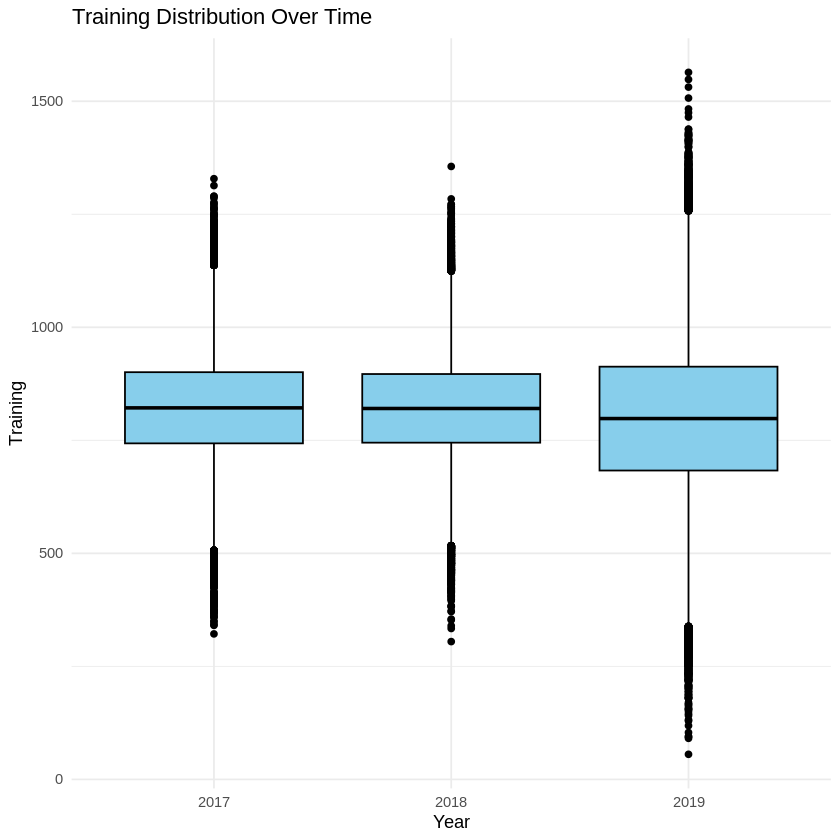

In [ ]:
training_2017 <- df$Training2017
training_2018 <- df$Training2018
training_2019 <- df$Training2019

# Creating a data frame for boxplot
training_data <- data.frame(Year = factor(rep(c("2017", "2018", "2019"), each = nrow(df))),
                            Training = c(training_2017, training_2018, training_2019))

# Creating boxplot for training distribution over time
training_boxplot <- ggplot(training_data, aes(x = Year, y = Training)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Training Distribution Over Time", x = "Year", y = "Training") +
  theme_minimal()

# Display the boxplot
print(training_boxplot)

# 't' TESTS

**1.Gender Differences in Cardiac Electrical Activity Among Athletes:Insights from ECG Lead Measurements-'T test'**

 Lateral View (Leads I, aVL, V5, and V6): This view is crucial due to its potential to reflect changes in the lateral wall of the left ventricle, which may undergo hypertrophy or exhibit enhanced cardiac function as a result of intense physical training. Such adaptations can differ by gender based on factors like training intensity, type of sport, and inherent physiological differences.

 Septal and Anterior Views (Leads V1 through V4): These views are important for assessing the septal and anterior regions, where adaptations could also indicate enhanced cardiac performance or training-related changes. Differences in these areas could provide insights into how male and female athletes' hearts respond differently to their training regimens

In [ ]:
# Lateral View: Leads I (V1), aVL (V5), V5 (V11), and V6 (V12) + gender
lateral_view <- df[, c('Gender', 'V1', 'V5', 'V11', 'V12')]

# Septal and Anterior Views: Leads V1 through V4 (V7 to V10) + gender
septal_anterior_view <- df[, c('Gender', 'V7', 'V8', 'V9', 'V10')]

head(septal_anterior_view)

,Gender,V7,V8,V9,V10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Male,13580,11410,14721,16103
2,Male,13331,11096,14093,15416
3,Male,13829,10991,13644,14815
4,Male,13331,10467,13016,14128
5,Male,13331,10049,12477,13355
6,Male,12832,9630,11938,12926


**Generalized Null and Alternative Hypotheses for the two views :**

*Null Hypothesis (H0):*
  For views Lateral, Septal/Anterior there is no difference in the mean values of the ECG leads between genders. This hypothesis posits that gender does not influence the ECG lead measurements, suggesting that the physiological or electrical properties captured by these leads are similar across males and females.


*Alternative Hypothesis (H1):*
For at least one of the two views, there is a difference in the mean values of the ECG leads between genders. This hypothesis suggests that gender may have an influence on the ECG lead measurements, indicating possible physiological or electrical differences in how males and females present ECG characteristics within at least one of the clinical views.


*Significance Level (α)*:

The significance level, often denoted as α (alpha), is the probability of rejecting the null hypothesis when it is actually true (Type I error). α is equal 0.05


*Test Statistics:*
Conduct independent T-tests for each lead within each view, comparing male and female groups. The aggregation of these tests across all views and leads provides a comprehensive examination of gender differences in ECG measurements

In [ ]:
lateral_results <- list(
  'V1' = t.test(V1 ~ Gender, data=lateral_view),
  'V5' = t.test(V5 ~ Gender, data=lateral_view),
  'V11' = t.test(V11 ~ Gender, data=lateral_view),
  'V12' = t.test(V12 ~ Gender, data=lateral_view)
)

selected_leads <- c('V1', 'V5','V11','V12')
for (lead in selected_leads) {
  cat(sprintf("\nResults for %s:\n", lead))
  print(lateral_results[[lead]])
}



Results for V1:

	Welch Two Sample t-test

data:  V1 by Gender
t = -53.532, df = 111034, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -3588.013 -3334.553
sample estimates:
mean in group Female   mean in group Male 
           -7704.832            -4243.549 


Results for V5:

	Welch Two Sample t-test

data:  V5 by Gender
t = -133.81, df = 89465, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -7929.877 -7700.930
sample estimates:
mean in group Female   mean in group Male 
            3364.951            11180.354 


Results for V11:

	Welch Two Sample t-test

data:  V11 by Gender
t = -75.006, df = 109238, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4573.856 -4340.9

In [ ]:
septal_anterior_results <- list(
  'V7' = t.test(V7 ~ Gender, data=septal_anterior_view),
  'V8' = t.test(V8 ~ Gender, data=septal_anterior_view),
  'V9' = t.test(V9 ~ Gender, data=septal_anterior_view),
  'V10' = t.test(V10 ~ Gender, data=septal_anterior_view)
)

In [ ]:
selected_leads <- c('V7', 'V8','V9','V10')
for (lead in selected_leads) {
  cat(sprintf("\nResults for %s:\n", lead))
  print(septal_anterior_results[[lead]])
}


Results for V7:

	Welch Two Sample t-test

data:  V7 by Gender
t = -7.1282, df = 90863, p-value = 1.025e-12
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -502.0964 -285.5277
sample estimates:
mean in group Female   mean in group Male 
            14385.34             14779.15 


Results for V8:

	Welch Two Sample t-test

data:  V8 by Gender
t = -14.598, df = 90680, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -849.6893 -648.5349
sample estimates:
mean in group Female   mean in group Male 
            14128.46             14877.57 


Results for V9:

	Welch Two Sample t-test

data:  V9 by Gender
t = -70.952, df = 90440, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4261.499 -4032.388

 For all selected leads the p-values are extremely low , far below the significance level of 0.05.
 This indicates a statistically significant difference in the means of these variables between genders. Therefore, we reject the null hypothesis for each of these tests, concluding that there is a significant difference between males and females for the tested variables. ​

**Inference**

The Welch Two Sample t-tests performed across several ECG leads (V1, V5, V11, V12) revealed statistically significant variations in mean values between genders among athletes, with p-values significantly lower than the customary threshold of 0.05. These findings strongly support the rejection of the null hypothesis, demonstrating that male and female athletes have different mean values in these ECG leads.


 Similarly, leads V7 to V10 exhibit significant variances, indicating a similar pattern of gender inequality in cardiac electrical activity across the athletes tested. The amount and direction of these changes are further defined by confidence intervals and mean estimates, which supplement the statistical findings with measurable metrics of effect size.

**Clinical implications**

The significant gender differences in ECG lead measurements indicate that male and female athletes may experience different cardiac adaptations in response to training, which could have implications for sports medicine, including training regimens, performance optimisation, and health monitoring strategies. Understanding these differences is critical for generating gender-specific suggestions that can help maximise athletic performance while lowering the risk of heart disease.

**Conclusion**

By incorporating gender-specific data from these ECG leads into clinical and training procedures, the sports medicine community can improve the accuracy of athlete health care. This method not only improves sports performance but also greatly reduces the risk of long-term unfavourable cardiac consequences. These findings enable a more detailed knowledge of athlete heart health, promoting a transition towards more personalised athlete care.

While the findings largely show disparities within the athlete population, they also contribute to a larger medical understanding of how athletic training affects heart function differently in men and women, hence enabling individualised medical and training methods.


                          ******************************END OF TEST 1**********************************

# ANOVA and 'F' TESTS

**2."Exploring the Impact of Sports played on ECG Measurements: An analysis Using ANOVA"**



*Null Hypothesis (H0)*: There is no difference in the mean ECG measurements across sports (rowing, kayaking, cycling) for each lead variable. Any observed differences are due to chance alone.

*Alternative Hypothesis (H1):* There is a significant difference in the mean ECG measurements across sports for at least one of the lead variables. The observed differences are not due to chance and reflect a true effect of sport type on ECG measurements.

*Significance Level (α)*:

The significance level, often denoted as α (alpha), is the probability of rejecting the null hypothesis when it is actually true (Type I error). α is equal 0.05


This investigation used stratified sampling to overcome the large imbalance reported across sports groups. This strategy divides the population into discrete subgroups, or strata, based on specific characteristics—in this case, sport type. Stratified sampling ensures that each subgroup is proportionally represented in the sample, resulting in a more accurate and representative study. In essence, it reduces the influence of different sample sizes between groups, increasing the trustworthiness of statistical inferences generated from the data.

In [ ]:
set.seed(123)  # Ensure reproducibility

n_samples <- min(table(df$Sport))

# Perform stratified sampling
library(dplyr)
stratified_sample <- df %>%
  group_by(Sport) %>%
  sample_n(size = n_samples) %>%
  ungroup()

# Now, stratified_sample contains a balanced subset of your data

In [ ]:
# Conduct ANOVA for each ECG lead on the stratified sample
results_anova_stratified <- list()
for(lead in c('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12')) {
  formula <- as.formula(paste(lead, '~ Sport'))
  results_anova_stratified[[lead]] <- summary(aov(formula, data = stratified_sample))
}

# Loop through the list of ANOVA results and print each one
leads <- c('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12')
for (lead in leads) {
  cat("\nANOVA Results for", lead, ":\n")
  print(results_anova_stratified[[lead]])
}



ANOVA Results for V1 :
               Df    Sum Sq   Mean Sq F value Pr(>F)    
Sport           2 8.442e+09 4.221e+09   36.26 <2e-16 ***
Residuals   29997 3.492e+12 1.164e+08                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA Results for V2 :
               Df    Sum Sq   Mean Sq F value Pr(>F)    
Sport           2 1.459e+11 7.295e+10    1127 <2e-16 ***
Residuals   29997 1.942e+12 6.475e+07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA Results for V3 :
               Df    Sum Sq   Mean Sq F value Pr(>F)    
Sport           2 4.841e+11 2.420e+11    3102 <2e-16 ***
Residuals   29997 2.340e+12 7.801e+07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA Results for V4 :
               Df    Sum Sq   Mean Sq F value Pr(>F)    
Sport           2 6.013e+10 3.007e+10   389.1 <2e-16 ***
Residuals   29997 2.318e+12 7.727e+07                   
---
Signif. codes: 

**F test Results**

The significant F-values found across all ECG leads in our ANOVA study clearly show that the variance between sports (rowing, kayaking, and cycling) is significantly bigger than the variance found within each sport. The huge difference in variances, as indicated by the F-test, strongly supports the alternative hypothesis that mean ECG values differ statistically significantly among sports. We reject the null hypothesis as all leads' p-values are significantly lower than the specified significance level (α) of 0.05.

**Statistical Significance Across All Leads:**

 The "Sport" factor has a significant effect on the measurements for every ECG lead (V1-V12). This suggests that the type of sport an athlete participates in is connected with variances in ECG results across all investigated leads.

 Beyond statistical significance, determining impact sizes (mean differences) and their practical implications in sports physiology and athlete health is critical. This includes examining how significant the disparities are and what they might entail for players in other sports.

 The continuous statistical significance observed across all ECG leads emphasises the impact of sport type on cardiovascular measures. This results lends support to a further in-depth investigation into how and why different sports may result in varying ECG profiles across athletes, emphasising the significance of sport-specific factors in athlete health monitoring and research.

In [ ]:
# Loop through all ECG leads and conduct Tukey HSD post-hoc test for each
leads <- c('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12')

# Store the results in a list for easy access
tukey_results <- list()

for (lead in leads) {
  # Fit ANOVA model for the current lead
  anova_model <- aov(reformulate('Sport', response = lead), data = df)

  # Conduct Tukey HSD post-hoc test on the fitted ANOVA model
  tukey_post_hoc <- TukeyHSD(anova_model)

  # Store the post-hoc test results in the list
  tukey_results[[lead]] <- tukey_post_hoc

  # Print the results
  cat("\nTukey HSD Post-Hoc Test Results for", lead, ":\n")
  print(tukey_post_hoc)
}



Tukey HSD Post-Hoc Test Results for V1 :
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = reformulate("Sport", response = lead), data = df)

$Sport
                      diff       lwr      upr    p adj
Kayaking-Cycling -572.6304 -985.1868 -160.074 0.003274
Rowing-Cycling    751.2669  447.6336 1054.900 0.000000
Rowing-Kayaking  1323.8973 1020.2640 1627.531 0.000000


Tukey HSD Post-Hoc Test Results for V2 :
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = reformulate("Sport", response = lead), data = df)

$Sport
                      diff       lwr       upr p adj
Kayaking-Cycling -5401.248 -5695.996 -5106.500     0
Rowing-Cycling   -2676.700 -2893.628 -2459.771     0
Rowing-Kayaking   2724.548  2507.619  2941.476     0


Tukey HSD Post-Hoc Test Results for V3 :
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = reformulate("Sport", response = lead), 

The Tukey HSD post-hoc test results confirm that there are substantial and statistically significant disparities in ECG measures between athletes from various sports. This detailed analysis lends support to your ANOVA's alternative hypothesis, revealing genuine effects of sport type on ECG data that beyond what could be expected by chance. These findings can help personalise athlete training regimens, potentially leading to increased athletic performance and better cardiovascular health management in sports medicine.

**Conclusion**:

The study, which used ANOVA followed by Tukey HSD post-hoc testing, clearly shows that the type of sport has a substantial affect on ECG data across various leads. The ANOVA results, corroborated by substantial F-values, indicated that variances in ECG profiles exist across sports such as rowing, kayaking, and cycling, implying that each sport has a distinct effect on cardiac electrical activity. These findings are supported by the Tukey HSD tests, which revealed unique pairwise differences and emphasised the varying impact of various sports on the ECG.

This study demonstrates that athletic training in different sports results in distinct cardiac adaptations, emphasising the importance of sport-specific cardiovascular monitoring and personalised therapies. Our thorough statistical approach, particularly the successful use of the F-test in ANOVA, ensures that these findings are both scientifically robust and clinically useful, paving the way for optimal sports medicine procedures that can improve athletic performance while reducing health risks.

                               ******************************END OF TEST 2**********************************

# BAYESIAN NETWORKS

**How does the interaction between age group and average training intensity influence the ECG characteristics (V1-V12), and how do these influences differ when accounting for the mediating effects of gender and sport discipline?**



                           



In [ ]:
df$AgeGroup <- cut(df$Age, breaks=c(18, 25, 35, 45, 55, 65), labels=c("18-24", "25-34", "35-44", "45-54", "55-64"))

In [ ]:
df$Simulated_Avg_Training_Group <- cut(df$Simulated_Avg_Training, breaks=quantile(df$Simulated_Avg_Training, probs = c(0, 0.33, 0.67, 1), na.rm = TRUE),
                              labels=c("Low", "Medium", "High"), include.lowest = TRUE)

In [ ]:
df$Gender <- as.factor(df$Gender)
df$Sport <- as.factor(df$Sport)
df$Sport <- as.factor(df$Sport)
df$Simulated_Avg_Training_Group <- as.factor(df$Simulated_Avg_Training_Group)

In [ ]:
install.packages("bnlearn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(bnlearn)

In [ ]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [ ]:
bn_data <- df[, c("Gender", "Sport", "AgeGroup", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "Simulated_Avg_Training_Group"), drop = FALSE]


In [ ]:
# Ensure all are factors
# Convert all categorical variables to factors if not already
bn_data[] <- lapply(bn_data, function(x) if(is.character(x) || is.integer(x)) factor(x) else x)
bn_data <- lapply(bn_data, factor)

In [ ]:
# Assuming your subsetted data is stored in bn_data and it's a data.table
bn_data <- as.data.frame(bn_data)

In [ ]:
head(bn_data,10)

,Gender,Sport,AgeGroup,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Simulated_Avg_Training_Group
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Male,Rowing,25-34,10251,-1096,-10267,-3724,9391,-5395,13580,11410,14721,16103,6662,-3806,High
2,Male,Rowing,25-34,8643,-2558,-10829,-1862,8973,-6448,13331,11096,14093,15416,5897,-4548,High
3,Male,Rowing,25-34,5427,-3776,-9985,743,6469,-6711,13829,10991,13644,14815,5460,-5105,Low
4,Male,Rowing,25-34,5427,-4507,-10829,1116,7304,-7501,13331,10467,13016,14128,4696,-5848,High
5,Male,Rowing,25-34,6231,-4751,-11673,1116,8138,-8027,13331,10049,12477,13355,3822,-6962,Low
6,Male,Rowing,25-34,5427,-5481,-11954,1860,8138,-8554,12832,9630,11938,12926,3385,-7704,High
7,Male,Rowing,25-34,4623,-5969,-11954,2605,7721,-8817,12832,9316,11669,12410,2730,-8076,Low
8,Male,Rowing,25-34,4221,-6943,-12517,3722,7721,-9606,12583,9107,11400,11981,2074,-9004,Medium
9,Male,Rowing,25-34,3416,-7187,-12235,4467,6886,-9606,12334,8897,11131,11723,1637,-9190,Medium


In [ ]:
str(bn_data)

'data.frame':	140000 obs. of  16 variables:
 $ Gender                      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Sport                       : Factor w/ 3 levels "Cycling","Kayaking",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ AgeGroup                    : Factor w/ 3 levels "18-24","25-34",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ V1                          : Factor w/ 4359 levels "-32767","-32766",..: 2911 2801 2580 2580 2635 2580 2524 2493 2434 2493 ...
 $ V2                          : Factor w/ 5914 levels "-32767","-32645",..: 3729 3596 3477 3400 3375 3295 3244 3134 3109 3080 ...
 $ V3                          : Factor w/ 4533 levels "-32767","-32650",..: 2038 1999 2058 1999 1943 1924 1924 1876 1898 1839 ...
 $ V4                          : Factor w/ 5197 levels "-32767","-32766",..: 1837 1993 2207 2238 2238 2301 2368 2465 2530 2494 ...
 $ V5                          : Factor w/ 3146 levels "-32767","-32766",..: 1882 1861 1737 1779 1825 1825 1803 1803 1756 1825 ...
 $ V6      

In [ ]:
set.seed(123)  # Set seed for reproducibility
bn_structure <- hc(bn_data, score = "bic")

In [ ]:
if (!require("Rgraphviz")) install.packages("Rgraphviz", repos="http://bioconductor.org/packages/release/bioc")

Loading required package: Rgraphviz

Loading required package: graph

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:bnlearn’:

    score


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘graph’


The following objects are masked from ‘package:bnlearn’:

    degree, nodes, nodes<-


Loading required package: gr

In [ ]:
 library(Rgraphviz)

In [ ]:
fitted_bn <- bn.fit(bn_structure, data = bn_data)

In [ ]:
print(bn_structure)


  Bayesian network learned via Score-based methods

  model:
   [AgeGroup][Simulated_Avg_Training_Group][V5|AgeGroup][Gender|V5][Sport|V5]
   [V1|Gender:AgeGroup][V2|Gender][V3|Gender:AgeGroup][V4|Gender][V6|Gender]
   [V7|Gender][V8|Gender][V9|Gender][V10|Gender][V11|Gender][V12|Gender]
  nodes:                                 16 
  arcs:                                  16 
    undirected arcs:                     0 
    directed arcs:                       16 
  average markov blanket size:           2.12 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              5.924699 
  tests used in the learning procedure:  360 
  optimized:                             TRUE 



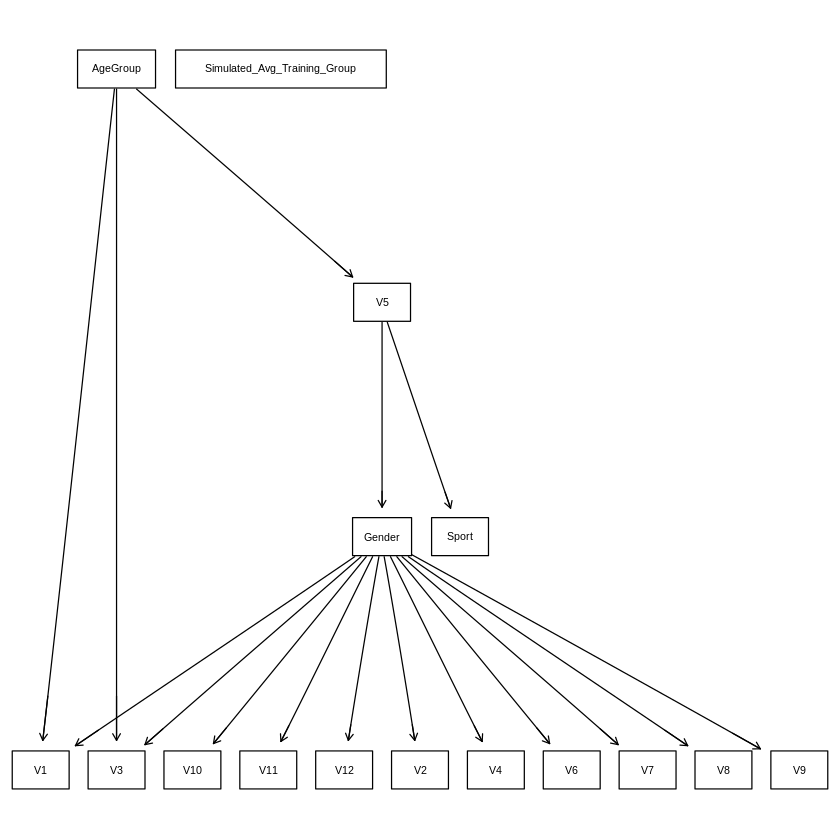

In [ ]:
graphviz.plot(fitted_bn)

AgeGroup and Simulated_Average_Training_Group are separate root nodes.
V5 is a mediator variable that influences AgeGroup and Simulated_Avg_Training_Group, which in turn affect Gender and Sport.
Gender influences the remaining ECG characteristics (V1, V2, V3, V4, V6, V7, V8, V9, V10, V11, V12), and some are also affected by AgeGroup.

The structure suggests that AgeGroup and Simulated_Avg_Training_Group may have a direct effect on one of the ECG characteristics (V5). This ECG characteristic (V5) then has downstream consequences on Gender and Sport, influencing all other ECG values.

**Inference**

The inference proposes a model in which age and training influence ECG readings both directly and indirectly via their effects on gender and sport. In practice, this could imply that age and training intensity have both universal and specific effects on ECG readings, manifesting differently in males and females and across different sports disciplines.

Specific age groups or training intensities are linked to ECG readings indicating increased cardiovascular risk or athletic performance.
Gender-specific pathways (mediated by V5) to various ECG readings reflect gender-specific cardiovascular responses or athletic performance characteristics.

Different sports have distinct ECG profiles that are influenced by underlying characteristics such as age and training intensity, presumably as a result of sport-specific physiological requirements.
The actual nature of the inferences and subsequent study approaches would be determined by the variables' details (particularly the nature of the ECG features) and domain-specific information.

**Conclusion**

*Age and Training*: Age group and  average training intensity are key determinants in influencing ECG outcomes, demonstrating that both intrinsic (age) and extrinsic (training) elements are crucial for cardiovascular health and performance.

*Gender and Sport Mediation*: The characteristic V5 is not only directly affected by age and training, but it also acts as a mediator between these parameters and the variables gender and sport. This shows that therapies or training adjustments affecting V5 may have varying consequences depending on an individual's gender and sport.

*Impact on Other ECG features*: Gender and sport have a significant influence on a variety of other ECG features (V1, V2, V3, V4, V6, V7, V8, V9, V10, V11, V12), implying a complex interplay between physiological and demographic factors. This complexity suggests that personalised approaches to sports training and healthcare may be advantageous.

Potential applications include tailoring athletic training programmes or healthcare advice to individual age and training levels, which could improve cardiovascular results and athletic performance.



                       *************************End of Analysis 3 ********************************

# CASUAL INFERENCE

**ECG Data Analysis Suggests Causal Inference:**

The Bayesian network analysis reveals a causal relationship in which age and training intensity have a direct impact on the ECG characteristic V5. This attribute appears to influence other ECG parameters via the gender and sport discipline pathways.

*Simplified interpretation:*

The study suggests that the age and intensity with which we train may have a direct impact on a specific feature of our heart's electrical activity (V5). This element therefore appears to have a knock-on impact, influencing other heart activity metrics, possibly differently for men and women and across sports. While we notice these correlations in the data, verifying that one factor causes the other would necessitate a more thorough investigation. For the time being, this knowledge could lead to better, more personalised training recommendations that take into account a person's age and gender, resulting in healthier hearts and improved athletic performance.


                         *****************************End of Analysis 4************************

                     **Cardiac Rhythms in Motion: Unraveling the ECG Patterns of Athletes Across Genders and other Disciplines**

**Abstract:**

This study looks into the multiple effects of age, training intensity, gender, and sport type on electrocardiogram (ECG) characteristics in a diverse group of athletes. Using data from the PhysioNet Norwegian Athlete ECG dataset, this study uses statistical methods to determine the impact of these factors on cardiac electrophysiology. Significant findings using comprehensive Welch Two Sample t-tests and ANOVA indicate the link between age and training intensity with ECG features, as well as gender-specific changes in ECG patterns. Furthermore, the effect of different sports disciplines on ECG features is investigated, providing insights into sport-specific cardiac adaptations. The findings seek to improve preventative sports medicine practices and athlete training programmes, resulting in better health outcomes and performance.


**Introduction:**

The human heart, a living and active organ, reacts intriguingly to the demands of athletic exercise. Investigating the delicate subtleties of how various elements influence heart function yields insights that are not only scientifically interesting, but also critical for athlete health and performance optimisation.An electrocardiogram (ECG) is a basic test that can reveal important information about the heart's condition. ECGs can identify adaptations or anomalies caused by rigorous physical exercise in athletes. Understanding these changes is crucial for improving performance and avoiding potential cardiac problems.Previous research has identified baseline variability in ECG readings among athletes, emphasising the effect of strenuous physical activity on heart function. There is a large corpus of research on gender-specific cardiac adaptations and the impact of various sports on heart shape and function.

**Data Preparation**

The dataset for this study was obtained from PhysioNet's Norwegian Athlete ECG dataset, which is part of a bigger database designed to aid scientific research. The dataset for this observational study was created by sports cardiology experts, with the goal of providing thorough insights into Norwegian players' ECG characteristics.The file types were compatible with , each of the 28.dat files has a 12 x 5000 array, where 12 represents the number of leads and 5000 represents the number of samples within each lead.

Participants who volunteered their ECGs to this study were informed and provided written consent before data collection began; they also agreed to have their ECGs shared in an open database. The study protocol and permission form were approved by the Norwegian Centre for Research Data (application ID: 389013) and the University of Oslo. The ethical concerns were approved by the Regional Committees for Medical and Health Research Ethics (application ID: 51205).

 This study presents a dataset of electrocardiograms from 28 competitive Norwegian endurance athletes. The electrocardiograms are typical 12-lead resting ECGs that were recorded for 10 seconds while the athletes were lying supine on a bench. The electrocardiograms were then evaluated by both an algorithm and a trained cardiologist.


<p float="left">
  <img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9829117/bin/sings2-3214719.jpg" alt="ECG Lead Placement" width="300" height="350" />
   
  <img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9829117/bin/sings3-3214719.jpg" alt="Full Body ECG" width="250" height="400" />
</p>


The figure(i) shows how the precordial leads were placed on the test subjects

The  figure(ii) shows how the limb leads where placed on the the subjects in this study.

**Questions of interest:**

*1.Do differences exist between male and female athletes concerning ECG parameters?*

*2.Does the type of sport an athlete is engaged in influence their ECG patterns?*

*3.How do age and training intensity impact ECG readings in athletes?*

By delving into these issues, the study hopes to improve our understanding of cardiac electrophysiology in the context of sports medicine and athletic training.


**Exploratory Data Analysis**

The EDA used several visualisation techniques, such as showing the distribution of ECG data across multiple leads, to better comprehend the variability and detect any obvious patterns or outliers. Descriptive statistics summarised the central tendencies and dispersions for each lead. The dataset's multidimensionality was addressed by creating a correlation matrix, which was then visualised with heatmaps to reveal the correlations between distinct ECG leads. Gender differences were investigated using grouped histograms, and the possible impact of athletes' sports disciplines on their ECG parameters was assessed using box plots for each ECG lead.

This EDA laid a solid foundation for inferential statistical analysis, ensuring that any conclusions drawn were based on a thorough understanding of the dataset's underlying structure and properties.

<p float="left">   
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAADAFBMVEUAAAABAQECAgIDAwME%0ABAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUW%0AFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJyco%0AKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6%0AOjo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tM%0ATExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1e%0AXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29w%0AcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGC%0AgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OU%0AlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWm%0Apqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4%0AuLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnK%0AysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc%0A3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u%0A7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////i%0AsF19AAAACXBIWXMAABJ0AAASdAHeZh94AAAgAElEQVR4nO2de4AcVZ3vi7e8dL3q3jWY1cUX%0AaBSxYRcWRXko6yMZEALkQQBdWAJylcfeRMKuPJwEBYzAiiuKIqsGjOGChDWCgPKKkYeRhYEG%0AAjFMCMkk8+jpd3f1uVVd1VWnzq+qu6pO1VR19/fzx1T3mVOnf7/61Wemqru6jsIAANIoSQcA%0AQC8AkQCIAIgEQARAJAAiACIBEAEQCYAIgEgARED8Ii1Svtfhl0uUG8Ku78KfDt1t742B1ghP%0A0NhAzxK9SH9SdPb+uxN/XGg+v+qdP3V2uPUu+3Hzl54iNXuS9TswQznqgm18KAa/brZsveyw%0At+6+3+FXmx3Ytis//te77fXeeWv8j0/CByAekfY55ZRTPnfgTsp+97p2+JsvCQ2eIpGePigr%0Ab6zZoew90OIpveEneym7HfKpD+yuvPk3zQ637KXsnvn0oW9WlDPLfl8gTFCg54lDpHc3lxvP%0AUnb7jcvvNyh+RaI9fTCmvJOE0mKFsvOSCW259f8ou+hi/Zey65U5bVm78x3KeT7HDxUU6Hni%0AE4mxbynvKLbOI1Ye9ebd3v5P/83Yifpx1hHsEuWu7057U+sc6bsPHLnv3kfcp/U7T/mxvupa%0A5XOtnsb61e8css8e7z5vs/bwUuWuZ45/2x4H/dx+Tfu3A83juBfFUJrk/so6pVmknM3Y6L7K%0Az8znLx3zdev/mDb+Y5/Y562n5xrL37/ngUsbWlPjB4ft84YDLs27hs/U7x6y9z5H/57xaYI+%0AI06RGh9RbjVFukl527/82xf/1063stVnKIct/wW7TLlwrzlntUQ6a49/unBgp11/5xDJ7Nns%0Aon5GOeAr//YZ5e0bGbtCuexNn77gc4pyf+slud/+aqny5uXLx8VQmtyoHNJ6WPqL9uPbypFu%0ACVyhfO2vTjnvHcppi6afs2B3PQU2X3n7RZccpnwk5xY+O0n5wLnz9tE72mmCPiNOkdhVynxT%0ApA8pL2nPX933MO2PdvPYaKnyJv24zxRpZ/0E/mrtLz0vktnTFPFw/STmUuVkxpYpu/+X9vhi%0A5fTW6/C/bXNod6JyrSPSWe6HlMuUPR5k7C+77HbADsZ+qHyesduVjHYE2Piystgt/BXKZ+qM%0APb/X3pN8mqC/iFWkX+l/8ps72/SdtugNFdbaE5cpzZ3NFKn5uPSGnXZ4iXSE0jxcmth996K2%0A6hH643XK4a3X4X/rFGnvE02u054erDjf/ZihPOiWwDLlOH3xEeW72s/XlQMZO9ZYcWy3t7uF%0A/2nlYf3x8os28GmC/iJWkR5QDjZ3tnOVA27eYjS29sQL9CemSBc3f/MR5TEPkRpvUIyjtQ8p%0Aj2urXqQ/fEH5iPkyjt86RbKYpz19j7LWEem7tO46b2r2WNZqXqYs0hdHNv0oKu9ibB8l3/zN%0AwcpfXMLfWym2VuXSBP1FrCKtVI4xd7bqv+ymKB/4vy8zW6Sleg9TJOOQ62jlHg+RcsruzOzy%0Aa23Vq/WHLyoHmS/j+G2bQ7uPKs53AQ4y/0MNHHPMMe/nRWqO/wnlOe1nSRuuaPv4GA0/r7zB%0AGpFLE/QXsYr0r/qbyuan/6/958C+yu632yI191ZTpO80ux+jeeAu0qSymzHiJ5U1VCTHb9uI%0ANEe5whHpKYYNTW5oI1JJ2enrJi/T8IvKLg17TCtN0F/EKVJlP+1fDHcZTel7u/5V2VWkS5u/%0A/4iyjn1Z+ZH+8A7hHGkvZazZ5YPKk1Qkx2/biHSz8u7We9yNK57Tn79fbf2unUjasd82axAa%0A/r7KiGMDGGmC/iJOkc5XZjTMnW3ja82WI5UhV5E+pT8u77nzBLvYOMz7miDSkcpqvXnHrnuW%0AXUTif9tGpOJfK//XfPgN5R+1Pf7tyuWt3y1qJ9KnlV82f7ODuYl0lLJCf7z0mEf5NEF/EZ9I%0Ar85V9tIvH9B3tvXK0fo7Wbl37LKd3a0cz0SRdn6U6f8UjtE/6/mEJt/QW3WRjJ7NLj9R/lEf%0A4CLln5mLSPxv213ZcPdOypn6ewFbzlXeqO/q9+2iLNyq/2L9XGUP6x09KtLtygz9X9JDu57E%0AXMK/RcnkGXvlzXuN8mmC/iIOkfT3nGd+ZGdlP10PY2ebq+x/3r+f+07lK4y9tNNuXzzHsScu%0AUs564+mXn7rLHn9gbOsblcMvOHWfq5XPtHo2uzQGlBn/eskxyvu2u4nE/9Yp0l6fa7FEb/jl%0AG5WdD/rUjN2V6U83O/z6LcrOB3/m4/spysH2G3pUJO3sar8Lv37ibvuucwtf/bzyznNO21f5%0AgSNN0F/EdfX3zm875gbjXWFjZ/vuP751lzd9/Ef6aflVb93jo4498avKygeP3GfvTzQ/jvmf%0Ao/fa5x/uHFE+2eppnGPVvvPRvfY44Gv6uRAVif+tx9vf+n87je1XHPbWXd985A9LZo/cNUf/%0A793e/IEv3cO9X+AikvqDw/fd9R0L9AYaPqtd++E99z7yAeZME/QV+GIfABEAkQCIAIgEQARA%0AJAAiACIBEAEQCYAIgEgARABEAiACIBIAEQCRAIgAiARABEAkACIAIgEQARAJgAiIXKRX04VE%0AJmNJx+7kNRRFYzTp2J3Yt4yKXKRsupDIZGvSsTvZgKJovJ507E7s+0VBJE8gUlxIZAKREkIi%0AE4gUFxKZQKSEkMgEIsWFRCYQKSEkMoFIcSGRCURKCIlMIFJcSGQCkRJCIhOIFBcSmUCkhJDI%0ABCLFhUQmEMknnz+puRiasSib/e0x06UzlchEQiSXLJ5c8KH3f+H3EpkkJJJbQWQLI5GJhEgu%0AmTx22gff85m7JDJJr0g/mP6ovrh5+sPZ/5xxRreK5JLFScf99wOnHTEUfsyERHJJRbowEplI%0AiOSSyVHHrX5gwYF/Dj9mekUa+vCl+uKE2dnsDQ/d3K0i0Swe3u8e7b/S9J+HHzMhkVwKIl0Y%0AiUwkRKKZPHHqvdnsQ9Mk/iWlV6TsJQc/l80+8o6f6o+7ViSaxQ//7nnt5xH/Fn7IpM6R3ArS%0AlSJ57Fp3TF8bfsgUi7R2+q1ayoc878w2NBKZyIhEsrjmw/rDz50ffsikRHIrSHeK5LprPXH4%0AhRJDplik7JxTss8dfEXWkW14JDKRetdOzOKag/SH3SiSW0G6UyS3TO479JznJUZMs0i3TV97%0A6zsfd2QrgUQmUiKJWfzoXc1Du38PP2JiIrkUpEtFopmsOGCZVCZpFil72BVzzzAedbFIYhaP%0A7ferbPaP038RfsDkPkeiBelSkUgmv3zfrVLjpVukpR979x36cu0jy6c/8sh6ucEkMpETScxi%0Azif/+/4TjpY4jEhOJDEV6cJIZCInkpDJ04cseUSjJ9/+1nhq/483lwdP0xmUG0wiEzmRxCye%0AOnPGgadIvD+UoEhiKtKFkchETiQhkxXNxbSrwg+YapEiRSITXCIUFxKZ4BKhhJDIBCLFhUQm%0AECkhJDKBSHEhkQlESgiJTCBSXEhkApESQiITiBQXEplApISQyAQixYVEJhApISQygUhxIZEJ%0AREoIiUwgUlxIZAKREkIiE4gUFxKZ9I9IYzaF/JjIeL1M2sbKOdKUqxdpvyptKtRdXqPCPZHI%0AhEZQmRBbJusFH2EW6pNi00SF9CrXx8nwXAwT0RTFIFeiydVo3DS5Oo27RMo3UXcZnktOIhMa%0AUYVutSSKErlIIzaFyRGR7axK2kYqY6RpnBVpP5U25VmOtO2ocU8kMqHRV0fFlglW8BFmgU2I%0ATaN0O5TZDjJ8iUsrmqIYjJdIU61BmvJ50sRqpKk8LraMMZfht3ODRFmUGt1qjMYdtigVWpQc%0At2uOWoFBJE8gEkSCSC0kMoFIEAkitZDIBCJBJIjUQiIT+jZGjbzZkGf0tFolLSU61gQ9ta8y%0AOjz31sx4NEUxty9Egkg8cYpUroo0amJLndVpL9JSZ2TFGu2l0l511X5ciaYo5vaFSGkXqWhT%0AqxYJTKVt9TJpKrMa7degTVVWIW0l/iUkMsGhHURKUKScTaWUE5lkddKWqxVIU4FVaL8GbSoz%0Al9fgX0IiE4gEkbr10G6OQToO7fyK1IrZO8w0ijRHDLt7RRIzgUgQSRweInUsCkSyg4VIOhAp%0AVFEgkh0sRNKBSKGKApHsYCGSDkQKVRSIZAcLkXSSF0lsg0gQqYVEJhAJIkGkFhKZQCSIBJFa%0ASGQCkaZCpE1Xzp1zyXPa1r729LmXb/VeehYFItnBQiSdGEWqidRVc1PbTQ1WE9tUlazIGqSp%0AUSejM7oivx4f2enfHn5t+alFduWilzdffZ7qufQsCkSyg4VIOjGKtF1komxuarup1tguthXy%0AZEVWI03lCbFF+49EetV3cIPYjN9RZGx45oaRWRu0LX78eq+ld1Egkh0sRNLpz0M7jdyNC6uP%0AndjQHn35dq+l9qM8pLGZfPukPmFEzX+3hd5uI8LvthS477ak9Z4NEEkYvg9EUr8w82vb2Zoz%0A9MdLbvJaaj9eymisdMnOiFpi84THOuSESN5ApKn5j/Tq08vOnlxzpv5QE8djqf3YNqixriSi%0AmkepdkuV1UivBmmpsYrYVFZJrzori01VfnQrC4jkCUSaqre/1VNW/8E4hFvptfQuCs6R7GAh%0Akk5fivTUWWXGGvNW75j1ImMTA894Lb2LApHsYCGSTiIi2e4kI9LkaVdt2nLTiVvYsq++PHzZ%0AhQ3PpWdRIJIdLETS6UuR2Mavzz754vWMFZYvmLd01HvpWRSIZAcLkXT6UyTpokAkO9ipEmn4%0AogF9cf5MjdkhrkaBSBBJQqRgux8faliRxIJ6boxgIj20YHkzkzPvHmnul4GvRoFIECm8SAF3%0APz7UlIl0/7a1zUxOetyINPDVKH0lknsRIFJokQLufnyoKROJsWYm1ZnXf+WLS4dZm6tRPGoG%0AkSCSzDlSoN2PDzWdIo2f9u1s9rLT8m2uRnlFvxrlNp+1NYL12Tk8aucunpBtBJESE8nH7nfn%0A4ODgcv4ijCq54qLExKswjK3geNKi82UepSqjr+G40MMlkybF2fe2uRpl83yNNT6/MGAEy31J%0AgKynMrqiy9cR3L7tYD+uht75IFKaRGrSfvdbov0ZPzbolnH8PXdWN+hQnbEzYef+PPjVKDi0%0Ag0jRiNR+99s8NDSU5S9UpzMQjjPxSnVjKzietOh8KfxY0WUuxIk698Qlk4031BgrzX4g+NUo%0AEAkiSYvkd/fjQ/VzjuTYCqS6HTZGsHOk0ZF7B0ZGSrm5y7cMLz2zHPxqFIgEkcKLFHD340NN%0AmUhf0j8Jm3kX23DpKfOvfD3E1SgQCSKFFyng7seHmjKRpGuWIpFCf0puAJF67hIhiNQiiEjh%0APyU36F2RfO87EIkndSK5Rh69SOE/JTeASBDJQb+KFP5TcgNRJJftDpF0IJKJRCZdIJKPT8nX%0ArVq16p5JkWK1jUhGF8cTC1YnY9WKYkuBVUkvNc8NEmVRIBKfuHMrQKTW8B1EatL+U/LFmUzm%0AOJfs2ojk6CCxAeMAIhlAJJMIRWr/KTn+IzWBSG03Rr+LFOJTcgOcI0EkB/0qUvhPyQ0gEkRy%0A0K8ihf+U3AAiQSQH/SpS+KIYQCSI5AAiBS2KQVuR2hUhaZEK4yL1nBGo+XSO45mFStYrs7zY%0AlKuRXlU2ITYVytwaVmAQyROIlEKRygS14ha22KtB1quzqthUUenorCI2VevcEyswiORJLCK1%0AUoNIURWldWgXdN/BoR0PRApaFAOIBJEcQKSgRTGASBDJAUQKWhQDiASRHECkoEUxgEg9IJIz%0AVYjUAiKFKgpEMoBILSBSqKJAJIM2IonbBCJFUBQDiASRHMQpUrUhwkiL3mREaT53PHFZcU6r%0AAx2LuQ/foh5NUQwgUupFqtqo9SqBNVrfhDEbXJ4IWOs26HB15vIafD+JTPAfCSIlKNKoTakw%0AKjLGaqNmqmaLyxMBa2WVDDdaYHn6GnXuiUQmEAki4dCuhUQmEAkiQaQWEplAJIgEkVpIZAKR%0AIBJEaiGRCUSCSBCphUQmEAkiQaQWEpn0kEjbRSbKfkUSVmQ1MlZ5QmzRRCK96ju4QaIsCkQy%0AgEgtYhTJZU5NvyIJKzKXKTtdJwQlvfhBoiwKRDKASC1waBeqKBDJIEApu06k1hOIBJECw4cK%0AkbxEcqs2RApVFIhkAJFaQKRQRYFIBhCpBUQKVRSIZACRWvSnSDuunn/y4qz3LLjCbLgQyQAi%0AQSRnUS5YtOG1a+aVPGfBFWbDhUgGEAkiOYqSW7qJsW0zX/CaBVecDRciGUAkiESL8tzAqNcs%0AuNxsuOUhjc1jIvUJt7DFXipZr8TyYtNEjfSqsgmxqVDm1rBygEieQKQpEil37o+Z1yy43Gy4%0AL2U0Vrpk5xa2xMYKgnXICZG8iVikjjtpv4r06tk3NpjXLLjcbLjbBjXWlURU18sGxV4Nsl6N%0AVcSmskp61VlZbKrWuCdWFhDJE4g0JSKtn3u39tNrFlxuNlyPouAcyWAqRRq+qDmDceh3WiFS%0A9CI9O+cJfeE1C644G243ixRs9+NDTZlIDy1Y3swk9DutEClykSpnrdBbSp6z4Aqz4XaxSAF3%0APz7UlIl0/7bmVODh32mFSJGLtL45Ge7M1Z6z4Aqz4XaxSAF3Pz7UlInEWDMTH++0etQMIuES%0AIZlzpEC7Hx9qOkXy8U7r6ws1ftv2zpP2DSqNKL3vd6n3qrne/NI5lqr3clJT7ceV0DsfREqT%0ASD52v+/Onz9/IfdFSJV+T1L/hqWZqtnQuZT2unQ4lZGvZ7b7MqaRSed3Wl/RP7K4zWdtjSh9%0APnHg8wUM1M5dPCH7B0RKTqTOu98Sbe87tvNwzr2ocykDbGZfmfh4p1Wd0NhB7jtQHRNbcqyw%0A3YjSbHCJf/v2Ast5/IanwkbJ8GX7scxNY8n+AZESE8nvG/18qOk8tAv/TqvvcyQh/hjOkUK/%0AlWoAkRITye/ux4cqZO2aaoBSyoo0OnLvgNQ7rekRKfxbqQYQaepFCrj78aGmTKQvNd9pvSv8%0AO63pESn8W6kGEGnqRQq4+/Ghpkwk6ZqlR6Twb6UaQKRuvkTINdUApYRIHH7fSv3ZokWLBssi%0A1Xrn7W4grMgaZCy1KrZUWJ30alS4QaIsCkRya2y7TSASh9+3UhdnMpnjXLLrvN0NJDZgHECk%0AEYjUodohRPLxVuqO4eHh18hkbDnftywWVmQ1MlYlJ7ZMsDLpVR+Lafa3vhfJN202Rr+LFOKt%0AVAP/50hCpDhHgkhBCSZSu/ijFyn8W6kGEAkiOehXkcK/lWoAkSCSg34VKXxRDCASRHIAkYIW%0AxQAiQSQHECloUQwgEkRyAJGCFsUAIkEkBxApaFEMIBJEcgCRghbFACJBJAcQKWhRDCASRHIA%0AkYIWxSCkSG5hQ6QmEMkTiEQidQt7akUqjIvUc24Bi71Usl6Z5cWmXI30qrIJsalQ5tawAoNI%0AnsQvkjNBiOQD8vWMslpxC5h8i4OsV2f06x8qHZ1VxKYq/x0RKzCI5AlEIiEKBTHjxqEdg0ht%0AgEgkRKEgZtwQiUGkNkAkEqJQEDPuNIokRgqRIFIrrWiKYgCRIJKDOEVyO68lJ56s1vG7puVy%0ATT+vbdch2HmtVFEMIFLqRarbNNS6g2C1s7DWZ3WCylTa2OAeS2RC32mt5chboaw03in+8fGS%0A/k5ruw7mO610+Ir9eKJzxJ6Q/QMipV4kPtTu/o+EQzsSolAQM26IxCBSGyASCVEoiBk3RGIQ%0AqQ0QiYQoFMSMGyIxiNSGHhIpJ1J0m66pDeZqjictqgVx9DyrkldUJ+3HkRYFIvmlzcaASP4o%0AipQDvvNjruZ40qJeJqOzGnlFtWQ/jrQoEMkvbTYGRApcFAMc2vWhSNZGgUgRFMUAIkEkBxAp%0AaFEMIBJEctANIvnIrAlEClUUiBQQiBRJUQwgEkRyAJGCFsUAInWlSOH3McdGgUgRFMWgT0Sy%0Ao4dI3NaASBEUxQAiQSQHiYoUSVpzIJJcUSBSQCBSJEUxgEgQyQFECloUA4gEkRxApKBFMegv%0AkVzDhkg8ECloUQxSJNLwRQPNrX3t6XMv3+q99CwKRAoIRIqkKAbpEemhBcubIl256OXNV5+n%0Aei49iwKRAgKRIimKQXpEun9bc372kVkbtC1+/HqvpXdRIFJAohPpfH0i49khjiIgEv+khew5%0AUlOkx07Up2D/8u1eS+1HeUhj85hIfcJnDsJ6JZYXh5qokdGrbEJsKpS5Naws/Ivkc/fjtl1a%0ARTrzbmO/DHwUAZH4Jy0iEWnNGfrDJTd5LbUfL2U0Vrpk5zMHie3nibWzBBDJ5+7Hbbu0inTS%0A40akgY8iIBL/pEU0Ip2pP9TE8VhqP7YNaqwriagdbyxoIqxXYxVxqLJKRq+zsthUrXFPrCz8%0Ai+Rz9+O2XbQiOUtqEkak6szrv/LFpcOeRxOtfhCJhOhWgmhE+oOx8Vd6Lb2L0m3nSH53Pz7U%0AdIo0ftq3s9nLTsu3OYoYv0Xjz3mRetHxNKqUzOFqrCC+YLnGPXGrSvDjbQMpkYRKRCLSjlkv%0AMjYx8IzXsndE8rH7LdGOYY91WzdY0drjN94OFGff2+Yo4hX9cPy2TmNMbUqqW2Pw422D9Ig0%0AOnLvwMhIiS376svDl13Y8FyadL9ITdrvft+dP3/+wpqNqpoPghWtPTUHKqvXCA3usWcq5/68%0AzVFE4T6NF8gtpep5x9OoUjKHq7FJ8QWL/G2t3LIIfrxtEFQkN1pjyYn0Jf1/6sy7WGH5gnlL%0Atf3Sa9lbIrXf/cSapfTQbuMNml6l2Q8EP4pI3TlSiONtg/SIFJDuF8nv7seHmk6RcnOXbxle%0AemY5+FFE6kTycbx9+VFHHXVigyIfdmskRgdntI05fh2a7hfJ7+7Hh5pOkdiGS0+Zf+XrIY4i%0AUidSk/bH29+cNWvWGXQWjwhE8pp0RJ8jpCE2RTVFSPeL5Hf340NNqUiha5ZOkYIdbxvg0K5/%0ALxFy3Rx9LlKI420DiNT3Ijm3Sp+LFOJ42wAiQSTHVuk9kRxNHQ/tgh9vG0AkiOTYKv0uUvCi%0AGEAkiOTYKhApaFEMIBJEcmyVnhDJzAgihSpKX4gkX60OWwUiBS2KAUSCSI6tApGCFsUAIkEk%0Ax1ZJRqR4MoJIoYoCkaKoIkQKWhQDiASRHFsFIgUtigFEgkiOrQKRghYl8nftIVITiOQJROoQ%0AsAlE0oFInkCkDgGbQCQdiORJkiKZQKTORYFIUVQRIgUtCkQygUj8VukhkdyASJ2LApGiqCJE%0ACloUiGQCkfitApGCFqXLRSqMi9T93hZNWK/M8uJQuRoZvcomxKZCmVvDCgwieQKR2pOISGWC%0AWvEZr9m/9aTOquJQFZWOzipiU7XOPbECi1ykUZtSIaqaUcyXKLD8qMhYnXsikUlxUqReMJbx%0ApSVQqnKvLpFK74gkf2jXepL2Q7uqjVqPqmYU8yXqrF4lNLjHEpmUiiKq2RRfWgKVmv3iBYlU%0AIBINPu0ica+IQztZojq0c0xLElVw1swndHoUVifzozS46VEiLQpEksJ8CYjkC8fJclTBWefj%0A5KR9klXoewLcSXukRYFIEQCRAhcFh3Zm8BCJ3xw9LpKZpZFWNEWJ/Iu9EKkJRPIEIvkLDiLp%0AQCRPIJK/4CCSDkTyBCL5Cw4i6XS3SNZW4YFI7YoCkcywIVKbjWPscRCpTVEgkhk2RGqzcYw9%0ADiK1KQpEMsOGSG02jrHHQaQ2RYFIZtgQqRMQqV1R4vp+Lw9EigDuFSFSNBgvCpHciwKR4gIi%0AtSsKRPIMGyI5gUjtitJLIkUcNkRyApHaFSXW6M1XgEgRwL0iRIoG40UhEilKZAG3tEifSPIp%0AhidOkRJJyHhxiESKElnALS0gkgsQSSwKRPIKGCK1ASKJRUlGJPM3ECkgPSpS8pl0g0gmLiI5%0AUklbUdIh0uS1p8+9fKv1NPn9ziR4zYRMulkk16KkJpW0FSUdIl256OXNV5+nOmsWVYoSBK+Z%0AkEk3i+RalNSkkraipEKkkVkbtPSOX++sWVQpShC4ZmImXSySe1FSk0pKi+ItkmcmEYr02IkN%0A7eeXb9d+bB4aGsqONYk4xTAYgYTLpKJlMjQ8xpF8JkFuYsWlMqxl8sJYulIJl0lZL8rmdGUy%0AYQUqLdKaM/SfS27Sf2QymWON1iRTNJHJ5BUtk8xtaUnFiEP1CLtDKou1TI5LSyZSRXlJL8rK%0AtKQiFkVepDOtTO8cHBxczt1cs1Yl99ssMZW2qeRWnaUKq9F+DdpUZfQ1yvxLhMtku5bJ4Foa%0AaFlscYuThllj9GakdDvUGR2ev2NpuFRWaZlcR16rQm+FqjLSVKPJudTP351W5YuyTS/KOjow%0A2WrVeItS5Ue3ApUW6Q/G/96Vrefc8WWBfhKzndHD0JHKGGkaZ0XaT6VNUd78RMzE+xIhmwlW%0A8BGmvyv2y/S8NuwNItsUxWDc5RPTBmnK50kTq5GmWL/Y17koNbrVGI07bFGm7s2GHbNeZGxi%0A4BmXmnWZSGImXSxSm6IYdI1InYvSKyKxZV99efiyCxsuNesykcRMulikNkUx6BqROhelZ0Qq%0ALF8wb6k9IB9ql4kkZNLNInkXxaB7ROpYlJ4RSYAPtctEEuhmkbyLYtA9InUsCkSyg4VIOhAp%0AVFEgkh0sRNKBSKGK0qsicfO3Fuj8rqObXqNt5QnSNLLpddqvRpu2btpG55CtRjOHbIGMXBmn%0AcW71EebWTSNi03iF9NqyaYfYNFni1oimKAa5EmnavIk0uRRw02bSVMqJLds3bSG9qmP2Y4lM%0AaERhi/J66KIUuTWswCIXqT3FzEJf/f6U+Y6vfisyv5YJR5rfZ2720euHmYd89FqUeV02HBnm%0AHu6n16ELfHR6MfMNyWCkeCBzi49e38886qPXxRmf/z8hkhQQyQ2IFDsQyRuIFBEQyQYiTTkQ%0AyY20ilRf9bCvfttXPe2r30urNsmEI81rq5730ev5VVt89Fq3qiAbjgz33+mn1x0P+ug0sepJ%0AuVjk2Lwq66PX0Co/f7fWrpAmlAIAACAASURBVPJ5ie0UiwRAbwKRAIgAiARABMQt0o6r55+8%0AOGvfDMZr6cS9NeRgSefjHlXyufROKmnIJG6RLli04bVr5pWsm8F4LZ24t4YcLOl83KNKPpfe%0ASSUNmcQsUm7pJsa2zXyhdTMYr6VzLffWkIMlnY97VMnn0juppCKTqThHem5gtHUzGK+lcwX3%0A1pCDRU+wENpElXwuvZNK0plMgUi5c39s3QzGa+lcw7015GCREzAE76iSz6V3Ukk8k/hEenhg%0AYGBIW7569o0N62YwXkvnqu6tLNxgURE2H8+oksuld1JJTybxiVTYuHFjmbH1c+9m9s1gvJbO%0AVd1bWbjBks7HK6oEc+mdVNKTSdyHds/OeUJftG4G47V0ruTeGnKwpPPxiCr5XHonlTRkErNI%0AlbNW6F8kLFk3g/FaOnFvDTlY0vm4RpV8Lr2TSioyiVmk9TObrLZuBuO1dOLeGnKwpPNxjSr5%0AXHonlVRkgkuEAIgAiARABEAkACIAIgEQARAJgAiASABEAEQCIAIgEgARAJEAiACIBEAEQCQA%0AIgAiARABEAmACIhcpGy6kMhka9KxO9mAomi8nnTsTl62AoNInkCkuJDIBCIlhEQmECkuJDKB%0ASAkhkQlEiguJTCBSQkhkApHiQiITiJQQEplApLiQyAQiJYREJhApLiQygUgJIZEJRIoLiUwg%0AUkJIZAKR4kIiE4jkk8+f1FwMzViUfey0D77nM3dJjieRiaRIXCb3nvT+9332DslMEhSJS0Xj%0Aumk3S44nkYmkSFwmH5umsb9kJukV6QfTH9UXN09/OHvUcasfWHDgn+XGk8hEUiQ7k2c/dMZv%0AHzjjfX+SGy9BkbiiZLNrZ/xd94rEZXLQskceeeQxyUzSK9LQhy/VFyfMzj5x6r3Z7EPTJP8l%0ASWQiKZKdyborNId+O+0eufESFMlORWPOV2Z0r0hcJvvfKpmFTnpFyl5y8HPZ7CPv+Knx7I7p%0Aa+WGk8hE9hzJkckT5xz2jNxwSZ4jcan8IPPnLhbJzuSZaf/8iYNPvV9yuBSLtHa69pfikkOe%0Abz554vALJYeTyERWJC6ToXdO++yjksMlKZKdypMzfpbtZpGsTNbNOOOuO0+Y8aTccCkWKTvn%0AlOxzB1/RfHjfoec8LzmaRCbS79rxmfxizqGSNUv0XTsrlS9+MdvVIvFFyWb/tP9yudHSLNJt%0A09fe+s7H9UcrDlgmPZpEJtIi2ZloDL33KrnREhWplcrPZjzR5SI5ipI9/Gtyo6VZpOxhV8w9%0AQ1/+8n0RnA5KZCL/OZKZyU8P+XM2+/yB35QbLNnPkcxU5r/rgAMO2O89p8oNJpGJ/OdIZiZr%0Azno2m12//w1yg6VapKUfe7f+mcvThyx5RKNr3/62M3lyxpzfPHj+3z0oN1iyIpmpPKGX5APL%0A/yg3mEQm8iKZmTx+wBkP/vbUj0juXqkW6an9P64vVkxrInlAJJGJvEhmJtk1x+//nmNXSA6W%0ArEitVHS6+tDOyuSez7/3Ayf9TnKwVIsUKRKZ4BKhuJDIBJcIJYREJhApLiQygUgJIZEJRIoL%0AiUwgUkJIZAKR4kIiE4iUEBKZQKS4kMgEIiWERCYQKS4kMoFICSGRCUSKC4lMIFJCSGQCkeJC%0AIpP+ESkvUiyTpkqVNJVKpKlaIU3lothSqLoMX7AfS2TCvzwNJV+qFkhbgQaTL9Nk80WarVu6%0A+RKXb7HLi8I9jqgo5sCkDMUqjZuuV6rSuGnYZVplvnh2USIXaURkvEyaarRXPk+aWI00lcbF%0AllFWosPv4AYJzyQ3pEpeZKTISDAjYxXar8q2k7bJAu3XqNO20oT9eEekRXHZag3S5K8oZbId%0AxtyKwm2FiIpiDrxDbJlgNG5awAKbEJtGq6RXhZHhc0VuDSswiOQJRIJIEMkaJDwQCSJBJGuQ%0A8EAkiASRrEHCA5EgEkSyBgkPRIJIEMkaJDwQCSJBJGuQ8EAkiASRrEHCA5EgUppFmtNE7NUt%0AIs3hIa/c7yKZ26WrRXLWFiK1BgkPRIJIEMkahGPTlXPnXPKcVoxrT597+VbvpUvNIJJJ5CLt%0AuHr+yYuzoYpiDtwtIgXc/UjAqRGpdvq3h19bfmqRXbno5c1Xn6d6Ll1qBpFMIhfpgkUbXrtm%0AXilMUcyBu0SkoLsfCTg1Io3fUWRseOaGkVkbtIIcv95r6VYziGQStUi5pZsY2zbzhTBFMQfu%0AEpGC7n4k4NSI1KzbjQurj53Y0B59+XavpfZDndDYsd1GbT1wiLRdZLxCmrZX2Q7Sli/Sfo06%0AbSvn7MejLDy0KGkRqclzA6M+ilIe0tg8JlKfEFvyrEh6qaSlxPJi00RN+9HKwaDKyPCFMreG%0AlYOvcySfu59HzdIjkvqFmV/bztacoT9ecpPXUvvxSkbjNrdN4RDJz7aLDLVzF09oUdIkUu7c%0AH/spykt6UVZKbAV/BKqtXRQfIvne/a6dNWvWaXURteF8bsQp9mo0xJY6o00NNWgvZyqvPr3s%0A7Mk1Z5qReyy1H68v1Pht1abReuAQqSpSU0lTtcFoW71O21iDtqk1+3HFX2ldSbVIr559Y4P5%0AKMq2QY11JRG1LLZUWY30apCWGquITWVV+2HmYDbVGR2eH93Kws9/JL+7X/pF0v4qnLL6D8b/%0A0JVey1bXHjpHIntRpU53SNqrRndIppKmur1DmtulzOjwDW6HdMS2fu7d2s8wRTEN7ZJzpCYB%0Adj8ScGoO7Z46q8xYY97qHbNeZGxi4BmvpVvNulykcZF8hTTVaa9SiTSxOmmq5q2H5naZZC7D%0AT3CDcDw75wl9EaYotNoG6RQp6O5HAk6NSJOnXbVpy00nbmHLvvry8GUXNjyXLjXrcpHIwKk5%0AtKuctaKZaJiimAN3iUhBdz8ScGpEYhu/Pvvki9czVli+YN7SUe+lS80gkknUIq2f2WR1mKKY%0AA3eJSEF3PxJwekQKCETCJUK4RMgaJDwQCSJBJGuQ8EAkiASRrEHCA5EgEkSyBgkPRIJIEMka%0AJDwQCSJBJGuQ8EAkiASRrEHCA5EgEkSyBgkPRIJIEMkaJDwQCSJBJGuQ8EAkiASRrEHCk2aR%0AAt4yhAwMkSCSkHt/ihTwliFkYIgEkYTc+1KkoLcMIQNDJIgk5N6XIjXxd8sQj6JApA4imRWG%0ASK1BwpNykXzeMuSHCxcuXOzn5hIu95ZwubWEy50luBtLOLaOMDw/SDRFodU2gEhOIFI7kfze%0AMmRxJpM5TmIrBMKxdWJ5hTJBrYgtVVYjvRqkpc6qYlNF1X44ciirjA5f555YgUEkT1Itku9b%0AhhQnJiYmyQ3zJsqkqdYgTYUCaWI1evO9CeuhY+sIw3N395MoCrkX3VgtnvvamQepLve1y4e/%0Ar10QyM4AkWIQKeAtQ8jAkZ8jzaEIw+McKRgkYIgUvUhBbxlCBoZIEEnIvS9FCnrLEDIwRIJI%0AQu59KZJ8USASRHLmDpFCFQUiQSRn7vGJVODuE6oK9xI1ILcTnaySpvEamyBtRXoL0/GGStsq%0AXAwTnSMOUBSIlHaRyM6QF3Yu933Q391xK3mxJRfg7rgBcdy5Wri7tYGfW2q73VPbeR/21kvQ%0A+7zzt9UW7pgdDLIXQaTUi9Rx53LfBwPfr93E7X7tqtf92oOBQzuIhEM7a5DwQCSIBJGsQcID%0AkSASRLIGCQ9EgkgQyRokPBAJIrmlApECApEgEkSyBgkPRIJIEMkaJDwQCSJBJGuQ8EAkiASR%0ArEHCA5GmRKThiwb0xfn65eyzO95YDCJZQKSpF6lBoE1uvVzWc1lR/+Gy93m/IB/aQwuWN0U6%0A824jxw43FoNIFhAJ/5E47t+2tinSSY8bkXa4sRhEsoBIEMlBU6TqzOu/8sWlw6zNjcWqwxoj%0AoyL1MbFlkhVJL5W0lNik2DRe0364ieTolS9xa1hZQCRPINIUijR+2rez2ctOy7e5sdhLGY2V%0AElvBH24ieXa2DjkTE0nc2BCpv0VqUpx9b5sbi72+SOMReqOtOG/HZeLoVUvV7bggkghEYuzc%0An7e5sRgpijlwf58jQSSR/hZp4w01xkqzH+h0YzGIZAGRIBLH6Mi9A1qiubnLtwwvPbPc6cZi%0AEMkCIkEkji81byx2F9tw6Snzr3y9443FIJIFRIJI0RTFHLjvRGobIUSCSEGLYg4MkSASD0QK%0AWhRzYIgEkXggUtCimANDJIjEA5GCFsUcuFtEkp5AOzUiBcwEIkGkKEWSnkA7NSIFzCTVIgX7%0AFg8ZGCJNuUjyE2inRaSgmaRZpIDf4iEDT4VIzo3U9yI1kZpAOy0iBcikcJ/GCzmbRuuBI/qc%0ASL5GmnJ1NknaSmXar6HStmqRe8KnEfBbPLQoECkJkXxOoH3n4ODgcu97f7tFONX3/vaZySv6%0AFfu3uW0KR/R+qx8JqvOp32/xNCF7EURKQiS/E2gv0fa+Y72HcYsw9AYNh99Mcqs0np20abQe%0AOKKfFCnUSNOk9h+JUK7QtoZK26ol7okzFb/f4pmiWc29RYr2dbpZJN8TaG8eGhrKktmjJyvm%0AA7cIrV5FOhE1q5OmyqTYkmMV0qvOTUQdLhNSs7SdI/n/Fs8N8+fP/3JNpK6SpgYjTSrtxRp0%0Axbr2w1ukVi9+kPB0sUjSE2in5hwpYCbdIpKPb/GQgXFoF6tImSFj+csD7Tb5CbTTIlLQTLpA%0AJL/f4iEDQyQXkTrmYOBDJMV4D6h2+e52m/wE2mkRKWgmaRYp4Ld4yMAQKUaRFJuPhs+UBJwa%0AkWRqljaRAn6LhwwMkXiRvIMPJdL665SBL+n887+/Gj5TEjBE6tNLhGIRidzDpKzK3/yko0jO%0A4Tvf/OS4FyRSNKE16w2ROv6h0oFIcYtUoFNv58SWAqMze9Mp48vMmtm7o0jO4cv8XOAtcPW3%0AJxAphSJ1w6EdY1tPn7azcZIUPlMSMESCSCN9JtLsXY85vXmW9KXwmZKAIRJEGukzkd5yp0SK%0AJiTgHhaJbOb+EElIGyLpOETaa5tEiiYkYIgEkUb6TKSPPyiRogkJGCJBpJE+E+mJv39MIkcD%0AEjBEgkgjqRPJEVzkIh0xXdnrnU3CZ0pSgEgQaaTPRPr4MS3CZ0pSgEgQaSStIvnEsWpyt+Py%0AEyFEgkhBi2IODJEgEk+XiuR3J+wrkd7SYt/wmZIUIFLyInl/bZn7XjHt5fG1ZTNto6HjTtga%0Aftzja8vhi0KrbZC8SANN/n7PGeeFz5SkAJGSF4lc+uy4gtm8Ppr2qtGrqFnDulg62JXT/OXX%0AERWFVtsgeZFMthy5OnymJAWIlLxIZOB+PLQLFrZHhUcCnSM9ngmfKUkBIkGkkT4Vacue4TMl%0AKUAkiDTSnyI1Bt8RPlOSAkSCSCNtRDLvYh5iZgNz4BSKdFCTGW9VLo6yZhCJtEEki9ZdzEPM%0AbGAOnFqRDj76ukqUNYNIpA0iWZh3MQ8zs4E5cApFigKSAkSCSCPtzpGaIvmY2UCd0NixXaQ2%0AKrbkWIH0UrdvN+Mxnvs0yLGOyWTJfmx/JCaItH31TT9ck2MS0Jp1q0ilok2j2CYJu1u5XiSo%0AjLZVq7St0aBttYr9uBBpUdImko+ZDV7SZzZYyUJjxuN44hPPMe2ZDRwiqRftpt+wYe9vhY+W%0A1UXURpsI7V4qWZE1SFPDXy/+1+EpcFOqqLk2SdjdClM1rUtAukCkzjMbbF6o8WBVpEFa6qzu%0A1suMx3ju0yDHOq3hVfuxfQ7kEOlbygk3//fq7x+n/CTKmnX+8Nu7ZgI4tIuqKGkTKczMBubA%0AKTxHOvBCY3l2tHda9RMnROpvkcLMbGAOnEKR9rjfWN4zZR/IWnFCpD4VybyLeZiZDcyBUyjS%0A3ncbyzv3ibJmPS+SnQVE8twJvURq3cU8xMwG5sApFOljRzVPnkqf/mSUNYNIpA0iRVEUc+AU%0AinTPTn97zpVXnDVt5/vCZ0pSgEhxiBTswhoyMEQKhGMoPx/I/r8D9Le/P3SPRKYkBYgUg0gB%0AL6whA0OkQDiG8ndlw+Y/Pv66RJ4QiRCLSAEvrCEDQ6RAOIbyI9KW67Uf27hjguCQFCBSfFNf%0A+riw5un77rvv9+ST3kLV5YNj0lSmnxuzeq712bTR0HGztIaP5qPl7hDp+b/R57zcqPzNhvCZ%0AkhQgUnwi+biwZnEmkzlOYiu4EGwnjPa1u0Ok49/zR30x9J4vhM+UpACRYhSp84U1v7vllltu%0Az4uUaqRJZaSpUiFNTM3ng+2EreEL3CDRFIVW2yB5kd72I2P5/Sm7i5AVJ0QKI5LfC2vIwFGc%0AIwXbCfvqHGnPnxrLn+0VPlOSAkSKTyS/F9aQgSFSmBwMfIj0j8c1r5bOHXpE+ExJChApBpEC%0AXlhDBoZIYXIw8CHSmp32P++yfz/zbTuvCZ8pSQEixSBSwAtryMAQKUwOBn7e/r43o38g+2F8%0AIKuTZpGkiwKRQuRg4O8D2e1PPyv1BVmIJAKRjOH7TCRpSAoQCSKNQKTAkBQgEkQagUiBISlA%0ApP4Wydw4ECkgJAWIBJGiE6lEUMtiS5XVSK9GqWRGYjwPFr1zeH50KzCI5AlESqFIBfEq2lyd%0A3KSpyOjFto2g19o6cA5fsR9PWoFBJE8gUgpFwqFdhzinRKTw92uHSCbdL1Ko6HlCiyT7rebU%0AiCRxv3aIZAKRQosk/a3m1Igkcb92iGQCkUKLJP2t5tSI5P9rpaRmEMkEIkmcI/nd/V5at27d%0Ak+Mi+c73WdZ6lUpkRVYnTZW82JJjFdKrnuMGoZn4+Frp1kUaD/EzFXf+a6DPOlxVyezFZZVO%0Aclyu0bmQm9Mci9Sr0UxhTPYriBQseh5JkXzsfksymcyxLut3jFNiwwbD79dKX9EnPrgtWBJx%0AZ6F27uIJmebCZdoMl1kzXCbNYGqx3cQcnhRVbnIPiUx6QKTOu99vrr/++h+41Mz3xqY1E6c5%0AKYstJeayS3jWzO/XSmvDGttGbdTRzuFr3Saqo4QaGyNthSLt16jTtvKk/XiMhWdSpFglTSrt%0AVS6TJlafnAyzK06qeW4QiUy6XqTw32r2cVTkEm5850hh7teOcyQTHNrJihT+W82pEUnifu0Q%0AyQQihRZJ+lvNqRFJ4n7tEMkEIoUWSfpbzakRSaJmEMkEIqX5EiG3cCHSCERqXxQz7s4ihQlY%0ALK0NRAoIRIJIdmltIFJAIBJEsktrA5ECApEgkl1aG4gUEIg0lSKdr7+lNTvQd1vMuCFS23Ah%0A0khfiXTm3UaOAb7bYsYNkToEDZH6SaSTHjciDfDdFjPuKRDJKrAORAoIRJpCkaozr//KF5cO%0Ae37JwK0oZtwQqW24EGmkn0QaP+3b2exlp+XbfLngJf2S/JUu63YkTMAuuIxsX5IPkTzpBpF8%0AnqKTgVMnUpPi7HvbfLng1fka99VEGqSlzlRnQ5iAXWgNz41etWKHSJ50g0g+T9HJwOkUiZ37%0A805fLsChXdBwIdKID5F8nqKTgVMn0sYbaoyVZj8Q5LstZtwQqW24EGmks0h+T9HJwKkTKTd3%0A+ZbhpWeWg3y3xYwbIrUNFyKNdBbJxyn6qsHBwevIHXwrdXrrX3o74Bq99S9Tg97u16Ckut3n%0Al2PDpafMv/L1QN9todU2gEh8uBBpxOe7du1P0RdnMpnjJLaCC2F2wqheGyIFDRcijfh9+7vt%0AKfrw0NDQC2MikxXSVGekqVgkTaw+NhZmJxyrj3ODRFMUWm0DiMSHC5FGOovk9xSdDBzyHCnc%0ADtjcOF190apVYB2IFJAuEMnvKToZGCKFycEAIgWkC0Tye4pOBoZIYXIwgEgB6QaRQhcFIoXI%0AwaBbRLKihkgQqW1RzLghUoeou00k5+a2gEjNrQKRAkJrBpFIhBApiqKYcfeoSGRGharve387%0AcJ2ewTE7Q5MKoxM7NCqRTOFQ4a4fZv6vICZXJzNyeXJNVWkbo5cx19S624XGwYFIUTC1IoWZ%0A1sUNmWldJrymdQnE5HYbdbvvwLcLVNkOsWl7vkCatjfqtK2Usx+Pdo7YE4gUBVMrEq0ZDu1I%0AhDi0i6IoZtwQqUPUEAkitS2KGfeUiWQCkQISUiQrfhOI1NwcECkgtGYQiUTYdSKFKqFjc0Ck%0AgNCaQSQSIUSKoihm3BCp/ZaHSBCJUmo70alBhQlz30pH76BS4+dnbQGRPIFIKRSpSGa1refF%0AlhKrOBuko3dQ4ubfzVuBQSRPIhHJ+awFRIqiKGbcOLRrv+UhUnQi0Vu/0UsrXK7AsC/ACFVC%0AHsft5yIqCq22AUTigUgj0YlELpmYKJOmWoM0FfKtR6FKyLO9zl3fEVFRaLUNIBJF3LF6UKRW%0ADxzaBS2KGTdE8oEwFkSKqigQKTQQKSAQCSK5AZECApF0kSSK59gcECkgtGZdLpJc5O55QCTJ%0AovBxQyQfCGNBpKiKApFCA5ECApEgkhsQKSByIrXNphtEijDvORApONFmIGwiiBRBUXQgknRC%0ATSCSDyBS9ERVFI9qG0Akr3DtHQsiyRdFByJFkwlE8gFEip6oiuJRbQNbpFhy4DOBSD6IWyTh%0Ad+kRKcKM3beAfFE8qm3QpSK1m4k+2qjjFknIZGpFErsY+YYVqV1RdNxFijDVtltAvige1TbQ%0ARZqiTKIUqd1M9NFGHbdIQibRixQgUzPfsCK1K4pO94jkXhSXascfvEsmEYrUdib6qGP3JZIj%0AU4lMulikKSxKmPTki+IQKcFMIhSp7Uz0iaToyFQik0RE8s4kiEg9X5S0ZBKhSNxM9N846qij%0ATmjwJJmpEUG4TP6iZXLUHcnnwGdSD5fK5VomJ/ZEUV7Wi3JXujKxiyIvkj0T/bWzZs06rS6i%0ANkhTg9Em2ou5rKgG7RUuk1e1TGb9in8V8iJaEjQYl1zdknXtx9xeg3uJIHc64FL5ppbJGX4C%0AiLAoqlsvfpBQmfxFL8o9vl7eZTeh69Fe/rYK38suirRI3Ez0Tcgx7HiZHtbSXuTuuFN/zwYx%0AE+f3kQhFRoJJzYx9nYsS7pbFrkUpk+0w5laUcJcItSuKOXDnD2RH3ApYYBNi02iV9KowMnxM%0A19p1nom+W0QSM+likToXpVtEalcUc+AeEanzTPTdIpKYSReL1Lko3SJSu6KYA/eKSB1nou8a%0AkYRMulmkjkXpGpHaFMUcuFdEEiChdI9IAt0sUseidI1IbYpiDgyReCASRApaFHNgiMQDkSBS%0A0KKYA0MkHogEkYIWxRy4R0Xyw8XH++n1hQt8dHp11nWSwYTl5llDvvpdOqvsq9+cc2Wikeer%0AJ/rpdfzFPjptnPUfksFIsXbWKh+9fj7rSR+9ls7y+QcsEZEWHOqn12HzfHR6OXO5ZDBhWZ5Z%0A37mTxjmZkq9+n/S1I8fH3MP99Dp0gY9OL2a+IRmMFA9kbvHR6/uZR330ujjj8/8nRAoLRPIE%0AIk0REMkFiBQV/SPSN32dDpy/zEenLQtvlQwmLKsWbvDV7zsLK776XZTUXwSTpef76XXuN310%0A2rzwZ5LBSLF+4W989Fq98Fkfvb6/cMLfiyYiEgC9BkQCIAIgEgARMDUi7bh6/smLs/YtYbyW%0AHC5N4QZKMgnvgJJMJHwI6StKajKZGpEuWLThtWvmlaxbwngtOVyawg2UZBJeaSSbSPgQ0leU%0A1GQyJSLllm5ibNvMF1q3hPFacqu4NIUbKMkkvNJINpHwIaSvKOnJZOrOkZ4bGG3dEsZryfV2%0AaQo3UJJJtE0j2URChZDSoqQikykTKXfuj61bwngtue4uTeEGipTAr90uoCQTCRdCOosSJoDo%0AM4lbpIcHBgb0iztfPfvGhnVLGK8lt55Lk0HQgZJMok0aySRi0hNFSVkmcYtU2LhxY5mx9XPv%0AZvYtYbyW3HouTU0CD5RkEt5pJJSIZD6pKkrKMpmaQ7tn5zyhL1q3hPFacmu4NIUbKMkkPNNI%0ANpHQIaSwKKnJZEpEqpy1Qv8WVMm6JYzXksOlKdxASSbhkUayiUiEkLqipCeTKRFp/cwmq61b%0AwngtOVyawg2UZBKeASWZiEQIqStKejLBJUIARABEAiACIBIAEQCRAIgAiARABEAkACIAIgEQ%0AARAJgAiASABEAEQCIAIgEgARAJEAiACIBEAERC5SNl1IZLI16did+LtBcq8X5fWkY3fyshUY%0ARPIEIsWFRCYQKSEkMoFIcSGRCURKCIlMIFJcSGQCkRJCIhOIFBcSmUCkhJDIBCLFhUQmECkh%0AJDKBSHEhkQlESgiJTCBSXEhkApESQiITiBQXEplAJJ98/qTmYmjGomz2W5m/PeIWyfEkMpEU%0Ayc7kF9OaXCU3XoIicUW578QD3/tPv5QcTyITSZG4TB489QPvPnWdZCbpFekH0x/VFzdPfzh7%0A3YyfPDR4yFNy40lkIimSnckzj2j88t2/kRsvQZHsVJ4/5Kyn/rzo3Y/LjSeRiaRIXFEOPem3%0Aaz7/WbnhUizS0Icv1RcnzM5mD7leciwdiUwkReIy0Zn5NclMEhTJTmXdtDuy2bXT7pQbTyIT%0ASZHsTO6cpin18LQ1cuOlV6TsJQc/l80+8o6fZh+ddv3H9j/6DsnhJDKRPUeyMtH53keflRwu%0AyXMkO5VPnfnE+ksy/yM3nEQmsudIVia/mPaE5tX06+SGS7FIa6ffqqV7yPPan4zP3vfE+e+T%0APIqVyERWJCsTjaG//47kaImKZKfy2BHTps24W3I4iUxkRbIy+dOB5z777OLpV8oNl2KRsnNO%0AyT538BVZTaSfazvg+yT/ZEhkIv2uXSsTje99eEh2tETftWul8uyRZ6176usHrpUbTSIT6Xft%0ArKLcfuj09y4+dKncaGkW6bbpa2995+P68euvtGdH/LvcaBKZSIvUykTjhPNlB0tWpFYqP91v%0AvfbsYMndTyITaZG4ojz57LN/e7PcaGkWKXvYFXPPyOpvUS7LZp9+z/fkBpPIRP5zJDMTrWTT%0Afy49WLKfI5mp/Nc0/V3UGV0skrV7/af2b/WW6X+UGyzVIi392LubbzF8/cCfPfzPM/4sN5hE%0AJvIitTLJrpj2kPRgugoOUAAAFlBJREFUyYpkpvLUjLOefPrydz0gN5hEJvIitYpy5CmPrPzQ%0AOZKDpVqkp/b/eHM59K8z/vYz90oOJpGJvEitTLL/sZ/se3ZJi9RKZc0JB77v07dLDiaRibxI%0ArUwe+Oz+H/g/smVJtUiRIpEJLhGKC4lMcIlQQkhkApHiQiITiJQQEplApLiQyAQiJYREJhAp%0ALiQygUgJIZEJRIoLiUwgUkJIZAKR4kIiE4iUEBKZQKS4kMgEIiWERCYQKS4kMukfkV5NFxKZ%0AjCUdu5PXUBSN0aRjd7LFCixykUZsCpMjIttZlbSNVMZI0zgr0n4qbcqzHGnbUeOeSGRCo6+O%0Aii0TrOAjzAKbEJtG6XYosx1k+BKXVjRFMRgvkaZagzTl86SJ1UhTeVxsGWMuw2/nBomyKDW6%0A1RiNO2xRKrQoOW7XHLUCg0ieQCSIBJFaSGQCkSASRGohkQlEgkgQqYVEJhAJIkGkFhKZQCSI%0ABJFaSGQCkSASRGohkQlEgkgQqYVEJhAJIqVMpDkGIxDJgq+ZuXV6QCSz0F0qkrWXckAkE4lM%0AIBJESlCkvE21bD4wt6/+kNXzhHqRNJVYlfZr0KYKK5O2gso9kcgEIkGkBEWatKmUzQfm9tUe%0AaSJNEmoF0lRkVdqvQZvKrETa8ir3RCYTsu0hEkTCoV1gIBJEgkgtJDKBSBAJIrWQyAQiQSSI%0A1EIiE4gEkSBSC4lMIBJEgkgtJDKBSBAJIrWQyAQiQSSI1EIikzSLtOnKuXMueU6L8drT516+%0A1XtJi2LQtSLlx0RqE2JLnhVJL5W0lMhYZvAOqowOX7YfT1iBQSRPUixS7fRvD7+2/NQiu3LR%0Ay5uvPk/1XNKiGHStSOWqSKMmttRZnfYiLSoTVzSCF3uRFeuq/bhiBQaRPKk2RBhpiaTJ2DoN%0A1r5XnQtt/I4iY8MzN4zM2qAJf/x6r6VLUczt260i4dCu+0RK8X8kndyNC6uPnajpx758u9dS%0A+zE8NDT0AjmumayQpjojTUV6iMTqpKkyKRwczckxl+HHuUGiLApEsoOFSIFFUr8w82vb2Zoz%0A9MdLbvJaaj8WZzKZ4yS2QiDMQsf4ChAJIjmQ/o/06tPLzp5cc6b+UBPHY6n9WDU4OHhdSaRS%0AJ00qI021GmliKmmqV6yHZqHLzGV4fpAoiwKR7GAhUpi3v9VTVv/BOIRb6bV0KYoBzpEgkoM+%0AFemps8qMNeat3jHrRcYmBp7xWroUxQAiQSQHfSrS5GlXbdpy04lb2LKvvjx82YUNzyUtigFE%0AgkgO+lQktvHrs0++eD1jheUL5i0d9V7SohhAJIjkoF9FCl8UA4gEkRxApKBFMYBIEMkBRApa%0AFAOINPUihb8+EiKZ+BJpjksdIVLnonSLSBLXR0IkE4gEkWSuj4RIJhAJIjXxeX3k5qGhoSx3%0AnWKp4LyWUXs0zmrkcsaxao40TbIy7Ue/UzJWZAXSNsFfVxlpzSASRJIQyff1kUsymcyxbiOY%0A21di+yUBRIJI0f5H8nt95J2Dg4PL+Wseq85rGT0ueiypFdJUYfR6yVKDNlVZlbSVY7s+EiJB%0AJLm3v8NdH4lzJJM+EMmRA0RyQeL6SIhkApEgksz1kRDJBCJBJJnrIyGSCUSCSIHhQ4VIBhAJ%0AIgWGDxUiGUAkiBQYPlSIZACRIFJg+FAhkgFEgkiB4UOFSAYQCSIFhg8VIhlAJIgUGD5UQSS3%0AXaUZLESCSKGLApHsYCFS/4q04+r5Jy/O+v7eKERKgUjSNYNI0Yt0waINr10zr+T3e6MQKQUi%0ASdesa0WqidRV0tSgvVTaizXoinXthyOHOnMZnh/EJrd0E2PbZr7g93uj8YvkrANEMom0Zl0r%0A0naRiTJpqjVIUyFPmliNNJUntB/ifyTSq76DG0TguYFRH98b9SgKRLKYynMkqZp1rUgkovQc%0A2mnkzv2xn++NTqzSeG5SRM2LLSVWIb0apKXCikKLIwezrcbo8FX7cd5Kos9E8lmz8Vs0/pwX%0AqRfFFq1mpFeDtFRYSWwq1u3Hjq3j6FWucU+iKYq5fVMk0qtn39hgPr43+lJGYyWLD0cO/lax%0AzgP6TCS/NXtFr9ltUW8aL/wVUPX8TWfo9k2PSOvn3q399PG90cn7NF7MidQnxZYiK5NeDdKi%0A/UcSWhw5mG01Roev2I8nrTT6SiTfNSvoNXuB1iwfrmZlUrNcvt6+gObwVe5JNEUxt29qRHp2%0AzhP6wu/3RnGOlAKRpGuGc6TIRaqctUJvKfn93ihESl4k+ZpBpMhFWj+zyWq/3xuFSMmLJF8z%0AiNQHlwhBpBa4RKhdUQwgEkRyAJGCFsUAIqVepIYLTpHIr93WcRvItV+HNolMkhHJUUaI1Lko%0AvSoSHyr+IxlAJIgUGD5UiGQAkSBSYPhQIZKBl0guBkGkoEWBSBYQCSKFLwpEsoBIECl8USCS%0ABUSCSOGLApEsIBJECl8UiGQBkSBS+KJAJAuIBJHCFwUiWUAkiBS+KBDJAiJBpPBFgUgWEAki%0AhS8KRLKASIFFCnivSxIRRIJIDvpVpID3uiQRQSSI5KBPRQp6r0sSEUTqAZGITxAp8H8kHX/3%0Aunz6vvvu+z25r1GhSprqjN79iN4iidVJU7Ug3gkpz1yGj+Z+SFMmklkHiGQikUnKRfJ5r8vF%0AmUzmOImt4BNH9DG+DkSCSA6kRfJ7r8t1q1atuofcr7dYJU0qI03lMmliddJUK4q3+y0wl+G5%0AW/9GWhSIZAGRgovk+16XYlEMcI4EkRz0q0gB73VJIoJIUy9S+I8sCpMuoUGkJnIiBb3XJYkI%0AIk29SOE/soBIJpGLFPRelyQiiDTlIkl8ZAGRTHCJEEQyCDA9Fx8qRDKASBCpic+PLFYsWrTo%0AirJNveYSmoXdT62WRaqsTtrKDdpUY3TdCt8v0ppBJIgkI5LfjyyWZDKZYx1rthNJYmtODZNk%0AHtTqqNiSYwXSS6VzsbKc2DRaFSdeddAanpuLdbRzxJ6QvahrRaq0neXZnGnaZS5ol5mmWV1o%0AcamD2xTV/ETWVSswHyL5/shix/Dw8GujNsVCO5HsftWJUZEcK5G2UZU2FVietI3VuSfR1kzc%0A9KFrVqs33CvXKmC7mgWnd0Si5a6Niy2TrOhj3ymxSaHFbSetMjJ8nts1x63AOosU/iMLnCOZ%0A4NAOh3YyH1lAJBOIBJFkPrKASCYQCSIFhg8VIhlAJIgUGD5UiGQAkSBSYPhQIZIBREq3SG3q%0AAJFMJDKBSGFFEgvcHB4iBYMPFSIZQCSIFBg+VIhkAJEgUmD4UCGSAUSCSIHhQ4VIBhAJIgWG%0ADxUiGUAkiBQYPlSIZACRIFJg+FAhkgFEgkiB4UOFSAYQCSIFhg8VIhlAJIgUGD5UiGTg67Iu%0AiBSuKLGK5JYKRApID4nUINAmt14u67msqP9wycH7BSMtCkSygEhxi0Qiwn8kiOQAIgUtikF0%0AIvnc+yBSUPhQIZIBRIJIgeFDhUgGEAkiBYYPFSIZQCSIFJi8TbXcLji7X72YFymxKmnLN2hT%0AhZVJW0HlnkhkApEgUoIicZO0VdqKxE35VqAzyrnM+TbZoE1lViJteZWfYU4iE7LtIRJEwqFd%0AYCCSnEjOVCBSQPhQIZIBRIJIgeFDhUgGEAkiBYYPNW0iDV800CyGv0k8IdKUiCRbFIhkMVUi%0APbRgebNmPifxhEhTIZJ0USCSxVSJdP+2tXrN/E7iCZGmQiTpokAki6k7R2rWzO8knhBpas6R%0AJIsCkSymWCQfk3iOXq/xRFFELYktFVYlvRqkpcoqQkunypndyjV7lUI0RTG3b9pE8lGUlzIa%0AKyW2gicdczBwWdM65OxLkTpP4vmKXrPbot40HFI1Cw7dvqkTqXNRNi/UeLAq0iAtdVb30Utl%0AtdZDnyK1hlftQSpWFn0oko9JPCtDGsNjIrUJsSXPSqSXSlpKLC+0dKpZa/iKvcq4uKXDFcXc%0AvmkTyUdRmiRzaOfIBId2Zs38TuKJc6QpFCl8USCSxVSJNDpy70CASTwhUnuRgu1+XiJJFwUi%0AWUyVSF9qTuJ5l99JPCHSVIgkXRSIZIFLhLw2Th+IJF0UKZF85uDIJG0i2dFBJK+aQaTORYFI%0AVnQQyatm3iIFu0KNRASRIJKDfhUp4BVqJCKIBJEc9KtIAa9QIxFBJIjkoF9FCniFGokIIkEk%0AB70qkkknkXxcofa7W2655XZ6c5kaaVIZaapUSBOz7yzjM4fW8IWY7kjTPSKFPq+FSCbxidT5%0ACrXFmUzmOImt4I3PHKJ90S4WKfx5LUQyiU0kH1eovbhu3bqnxkXyFdJUZ6SpVCJNrG499JlD%0Aa/gJbpAoi9I1IoU/r4VIJrGJ5PcKNRIRzpGSOEfye167Y3h4+LVRm2LBR3Rav+rEqEiOlUjb%0AqEqbCixP2sbq3JNIa5YekQJeoUYigkiJieTjvHaJdjh+rGNNH9FJbNSYSbNIAa9QIxFBpORE%0A6nxee+fg4ODykk3NzzemtH5qpSRSYTXSVmrQpiqrkrayyj2JtGbpESkgJCKIFEIkE0mR/H7z%0Aig8V50gGEAki6YQ9r4VIJhAJIsmc10KkJs4dytHWCYjUuShdI1L481qI1MSxQwWrGUTqXJSu%0AESkgfKgQSSdMsUwgUueiQCRrO0MkLyBS56JAJGs7QyQvIFLnokAkaztDJC8gUueiBBWpFRVE%0A4oFIQYtiAJEgkgOIFLQoBhAJIjmASEGLYgCRIJIDiBS0KAYQCSI5gEhBi2IAkSCSA4gUtCgG%0AEAkiOYBIQYtiAJEgkoM4RaLfva2Niy2TrNjxi7xhimUyWea++BtNUczt260iFSdF6nmxpcQq%0ApFfDemRu2cmKPlaYopSq9rD2DZEgkidlOu1bTWzxMzlcmGKZuE8OJ1UUc/t2q0hk8tHA85Ea%0AURWLNX0+0jBFqXDzkRatwCCSJzi0S6FIKTi049PCoZ0PIJKHSGEygUhB4YKHSE3CFwsi+SgK%0ARLICgkheQKTORYFIVkA9K1L4MplEJRJ5Z3GyQprqtFexQJpYLdzbkKP1MW6QKIsCkayAIJIX%0AUYlE3lmsqaSpQXvV6VuSrBHubUjHe5mRFgUiWQFpIjmiG4FIJji061yUcCJJYwwWo0h1m4bq%0AI6Bmv7r9xEBljTqB0SaVqbSRX1UiE4gEkdok1AT/kXwAkSBSm4SapFUkqw0iNYFInYsCkayA%0AIJIXEKlzUSBSuyAhUhOI1LkoEKldkBCpCUTqXBSI1C5IiNQEInUuim+RpKvhTKgJRPIBRIJI%0AbRJqApF8AJEgUpuEmkAkH0CkCEWyKht5USBSuyAhUhOI1LkoEKldkBCpCUTqXBSI1C5IiNQE%0AInUuCkRqFyREagKROhcFIrULEiI1SY1IVmEgkiOT2EWSDRIiNYFInYsCkdoFCZGapE0kaWIo%0ACkTyGatjY5BSQyT/ReGASNFkApF8AJEgUqdMIJIPUiASvx0gkntRfIgUVfQ0E4jkAwmRIklf%0A2A4Qyb0oPSPS5LWnz718q/U0+tD5PZSUOkqRhExCiRRl4s4NEEgk16JwdI9IHYvSMyJduejl%0AzVefpzprFn3II/GLJGTiVyRHlFEm7twAgURyLQpH94jUriger9CdIo3M2qCld/x6Z82iD3kk%0AdpHETLxFijI73xsgiEjuRXHsVu33RXPrJi9S26JEFVX4TCIU6bETG9rPL9/urFkskXcSyS1T%0AiUxSVrMgIrkXJTWp9E5RIhRpzRn6zyU3aT9WLFq06IpykyRTNDECCZfJVi2TRQ+VOZLPJGQq%0AP9MyGSynK5VwmbyuF+WRdGVipyIv0plWpksymcyxsuMlB5fJK1ommdsSjkdA7dzFgktlsZbJ%0AcfFENBVwmbykF2VlwvEI2EWRFukPxv9ePcEdw8PDr7WfzGBMn81ApDpBmnKsRPuJk7NqFFxm%0Aeh2r87MnhMqkpmUyvI2MHG4OWW1DsEmxaZxuhwqjw4ecQ7ZNUQxyZdLkMhtFwX02CjHunNgy%0AwVyGDzcbBZdJVS/KSNuBDfwVpeSrKFValDy3a45bgUqLtGPWi4xNDDzTes4dwhbo6fp2VqUn%0AOimZjULMJKr5kcyJD5yM0u1QZvSN3JBXNrQpikEUU19acY+LLWPMZfhw92zoXJSgt+Nq4a8o%0AFVqUuGY1X/bVl4cvu7DhUrMuE0nMpItFalMUg64RqXNRekakwvIF85baA/KhdplIQibdLJJ3%0AUQy6R6SORekZkQT4ULtMJIFuFsm7KAbdI1LHokAkO1iIpAORQhUFItnBQiQdiBSqKBDJDhYi%0A6UCkUEXpVZHaUxn8ma9+mwZ/66vfHwef6dwpRl4YfMRHr0cGX/TRa9XghGw4MvzwKj+9Bn/k%0Ao9PWwXskg5EiO/iYj16/H9zgo9fKwUl/LzrFIhUzC331+1PmO776rcj8WiYcaX6fudlHrx9m%0AHvLRa1HmddlwZJh7uJ9ehy7w0enFzDckg5HigcwtPnp9P/Ooj14XZ3z+/4RIUkAkNyBS7EAk%0AbyBSREAkG4g05UAkN9IqEgC9CUQCIAIgEgARAJEAiIC4Rdpx9fyTF2ftuyp5LZ24t4YcLOl8%0A3KNKPpfeSSUNmcQt0gWLNrx2zbySdVclr6UT99aQgyWdj3tUyefSO6mkIZOYRcot3cTYtpkv%0AtO6q5LV0ruXeGnKwpPNxjyr5XHonlVRkMhXnSM8NjLbuquS1dK7g3hpysOgJFkKbqJLPpXdS%0ASTqTKRApd+6PrbsqeS2da7i3hhwscgKG4B1V8rn0TiqJZxKfSA8PDAwMactXz76xYd1VyWvp%0AXNW9lYUbLCrC5uMZVXK59E4q6ckkPpEKGzduLDO2fu7dzL6rktfSuap7Kws3WNL5eEWVYC69%0Ak0p6Mon70O7ZOU/oi9ZdlbyWzpXcW0MOlnQ+HlEln0vvpJKGTGIWqXLWCv2LhCXrrkpeSyfu%0ArSEHSzof16iSz6V3UklFJjGLtH5mk9XWXZW8lk7cW0MOlnQ+rlEln0vvpJKKTHCJEAARAJEA%0AiACIBEAEQCQAIgAiARABEAmACIBIAEQARAIgAiBST3DE+5OOoN+BSD0BREoaiNQTQKSkgUhd%0AxxFvqemLf3h7na04dM99MyuYIdJBB+nNA2/Rfvzu2H33PNjPPWBBVECkruO7yr3az7/sdCG7%0ATTlh9ep/UlaLIv12lyPvvvcc5ZqEA+0rIFLXMbLr2drPq5U/saVHVxib2HWeKNLB7yloj2bt%0AW0o20L4CInUfn/lrlbFDP9h6+o6PCyJtVb5S0vhP5Y/Jxdh3QKTu47+UB9krylXaP6N/m/HG%0AXXZRjhBE+pNickfSkfYREKn7mNzrPPbNnTYxduQulzz09P9MoyJ9cW0TmclaQTAgUhdyyjR2%0AyCcZe1E5S3tSe4Mp0sEz9N/9w1vYDuX0ZOPrRyBSF3KX8v+UmxkbUi7XnlyvHGaIdPRbG4xt%0A3fMtjP39m8a0X/xkSS3pQPsIiNSFVP/X/m+Y0BbT97vrkYs++cl9H8jrIn1HWfb6U0d9UBPp%0Ad7t9+Ce/uXS3M5KOs5+ASN3I2cpsffH44Xv973+ZuPutb87qIlUu3G+Pg+4+b1/tFw9/at/d%0A3vct/EOaQiASABEAkQCIAIgEQARAJAAiACIBEAEQCYAIgEgARABEAiACIBIAEQCRAIgAiARA%0ABEAkACLg/wOVZq8fkniX9wAAAABJRU5ErkJggg==" alt="ECG Lead Placement" width="300" height="350" />
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdaXxTZd7/8StJm+4LLYWySUuhFBCBQZyyKKsoiyAKyrAIIwpVARmHrSMO%0ADIp4O4ygDIKIwrAIgxuyuI2Ky0gLDCggyk4rIFtb2qZ7muT/4Pwnd+82qWma5krO+bwf8Gp+%0ATdNv07zSL2e5js5mswkAAAD4P73sAAAAAPAMih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDY%0AAQAAqATFDgAAQCUodu6bP3++Tqdbs2ZNg36JdzRQsGoPu2DBAp1O9/e//92z36XmN0LteLoA%0AQK1UW+wWLVqk+zXR0dH1+RaNGjVq3bp1REREg36Je77//vtqP2x4eHibNm1Gjx69YcOGkpKS%0A+gfbtGnTzp07a79Pw/281b67155Yu6tXr/7lL3/p3bt3kyZNjEZjbGxsjx495s+fn5WV5bUM%0A1bj+mvf+0wUA8A6dWq88sW3btm3bttlvXr58+cCBA3Fxcb169bIPw8LCtmzZIiNdg/v++++7%0AdesWHh4+bNgwZVJUVHTu3LkTJ07YbLYWLVqsX7/+zjvvrM+3aNas2bBhw9atW+f6lyxYsGDJ%0AkiUrV66cPn16fb61e9/dg9auXTtr1qzS0lKj0di5c+fY2NiCgoIjR46UlZUFBAQsXrw4PT3d%0A+6k0/poHAAghhE0b3n//fSHEwIEDZQfxku+++04IkZSUVG2elZX16KOPCiECAwM/+eQTtx//%0A7NmzQogpU6bU6auefvppIcTKlSvd/r71+e6esnbtWiFEQEDAc889V1hYaJ+XlJQsX748ODhY%0ACLF48WIp2arS2mseAGCz2VS7K9Z1Tz/9tE6n27lz56uvvtqiRQv7/tnCwsL09PQOHTqEhIQE%0ABQW1a9duzpw5hYWF9i+sdqDSM888ozzO8ePHR40a1aRJk+Dg4K5du27durU+XyKE+Pnnn8eN%0AGxcXFxcaGtqjR4/33nsvLy9Pp9P99re/resP27p167Vr17744otms3nKlCmlpaUOgwkh3nnn%0AnQEDBsTExBiNxubNmw8ZMuSjjz5SPjV69OikpCQhxBtvvKHT6fr06ePsaXR4LJder9+7d2/f%0Avn0jIyPDw8P79Onz2Wef2T87ffp0nU63YcOGql+SmZmp0+mGDx/u7LvX/EZms/nll1/u0aNH%0AREREcHBw27Ztp0+f/ssvv9jv4OKTX83Vq1effPJJIcTWrVuffvrpqnszQ0JCZs2a9cEHH+j1%0A+kWLFp08eVII0a9fP51Ot2vXrmqPs3v3bp1ON3DgQOWmzWZbt25dz549IyIiQkJCOnTo8Mwz%0AzxQXF9vv7+xV6h5nr8OMjIx+/fpFRETExcVNnjzZZDLZbLYVK1akpKSEhoZ27Nhx6dKltirb%0A+H81NgDAyyh2wmg0CiG++uqrOXPm9O3b94EHHhBCmM3m4cOHv/DCC2FhYdOnT3/ssccMBsOy%0AZcsGDRpksVhqeZzvvvuud+/eJSUlEyZMGDRo0JEjR8aNG/fFF1+4/SW5ubl9+vTZunVr+/bt%0A586d26VLl/Hjx69evVoIoWwccsPs2bO7du168eLFd955x+EdXn/99TFjxvzwww8PPPDA/Pnz%0AhwwZcuDAgWHDhm3atEkI8fvf/37y5MlCiNTU1OXLlytFx+HT6ND3338/ZMiQ0NDQRx99dNCg%0AQfv27RsyZMhXX33lYniH370aq9U6cuTIWbNmFRUVTZkyZe7cucnJyatWrbr11luzs7OV+7jx%0A+xJCrF27trS0dNiwYaNHj3Z4h8GDB48dO9Zqta5cuVIIMW7cOCHEu+++W+1u27dvF0JMnDhR%0AufnQQw89+uij2dnZ06ZNe+qpp6Kjo5977rk+ffqYTKaqaV15et2gPHhmZubQoUPj4+MnTZoU%0AHBz8j3/844knnkhPT3/ppZf69+8/ZsyYs2fP/ulPf9q8ebP9C381NgDA2+RuMPSaWnZLPf/8%0A80KIqKioqrsmlb/EqamplZWVyqS8vDwlJUUIsXPnTmUyb948IcTq1auVm0uXLhVCGI3GTZs2%0A2R9n9uzZQohJkya5/SXK7ssxY8bY7/Dtt9+GhIQIIfr27evs53W2K9buhRdeEEJMmDDBYbDO%0AnTsLIc6cOWO//4ULFyIiIlJTU5Wbb7/9tvi/O0MdPo3VHlb5WfR6/QcffGC/z1//+lchRO/e%0AvZWbTzzxhBBi/fr1VdNmZGQIIYYNG+bsu1f7Rsre0p49e5aVldnvs2DBAiHEAw88oNx05cmv%0AqW/fvkKIql9S0549e4QQycnJNpstLy/PaDQ2atSooqLCfoeysrKoqKiQkBBlT+4///lPIUT3%0A7t3tO3atVqtyGOL8+fOVicOnt3a1vOYdvg6DgoL27t2rTLKzsw0GQ2BgYEpKSm5urjJUjmgc%0APny4ctOV2AAAL2OLndDpdEKIDh06DB482D78zW9+8957761cudJgMCgTo9E4cuRIIcTRo0dr%0AebQePXpMmDDBfnPMmDFCiFOnTrn9JcpevDlz5tjv0KtXr7Fjx7r40znTsWNHIcTPP//s8LP5%0A+fk6nS4sLMw+admyZU5OjlKwHHL4NDp02223jRgxwn5z+vTpwcHB+/bty8vLq9OPUIt//OMf%0AQohnnnkmKCjIPpwzZ47RaNyxY4d9B7So++/r3LlzQoibb765lu/etWtX5Z42m61Ro0Z33XXX%0AjRs3qm4F/PjjjwsKCkaOHKnsyX399deFEEuXLrXv2NXpdM8++2xgYKDyg4i6PL1u69evX79+%0A/ZSPb7rpps6dO5vN5hkzZsTExChDZVe4coCji7EBAF5Gsfv/evbsWfVmQkLCqFGjbr31ViGE%0AyWS6cuXKlStXQkNDhRBVa0FNqampVW82atSoPl9itVpPnDih1+uVrmBnP9fVbeHh4UIIZ7vM%0A7rnnHpvN1r9//zfffPPKlSvKUNlhV7tqT6NDylFxdsHBwSkpKTabTTkorf5sNtuhQ4eEEFXP%0ABhVCREZGtm/fvqKi4vjx4/ZhXX9fyjOmPHvOREZGCiEqKyuVx1H2xlbd611tP2xmZmbNtNHR%0A0TfffPPly5erlm9Xnl63VXuNKT/FLbfcUm1if3Jcjw0A8JoA2QF8RVxcXLXJjh07li1bdujQ%0AobKyMtcfJz4+vupNZUOLrdY1ZWr5kqKiooqKiqioqMDAwKr3ad26teuRHMrNzRVC2DfGVLNi%0AxQqLxfLmm29OmTJFCNGxY8fhw4enpaUlJibW/rA1n8aamjVrVm2ixLhx44YryX9VUVFRWVmZ%0A0WiMiopyGC8nJ8c+qevvKyoqKj8/Pz8/v5YAymeNRqPyP4ERI0aEh4fv2LFjzZo1BoOhrKxs%0A165dTZo0Uba9lZaWFhUVCedl8dKlSzfddFPV/A2kcePGVW8qT0XVYdUnp06xAQBeQ7H7/6o1%0Ap7Vr106bNi0iIiItLe22226LiorS6/U7dux47bXXvJlK+SOq/EGtquakrg4cOCCEUI4arCkw%0AMHDNmjULFy7cuXPnRx999MUXX7z44osrVqzYtGlT7YftV3saHbLv3bZTfhy93jPbj2spZ1ar%0AVdTv2UtJScnOzj58+LCyNdeh77//XlR5bkNDQ0eOHLlly5avvvpqwIABH374oclk+v3vfx8Q%0AEGAPo9Pp/vznPzt8tKrV05Wn1zvqFBsA4DUUO8cWL14shNi9e/cdd9xhH9ZyhFkDCQ8PNxgM%0AJpPJYrFU7UMXLlyoz8NWVFS89dZbQoihQ4fWcrdmzZpNmzZt2rRpZWVlGzZsmDFjxrRp00aO%0AHFn1wDU3VN1gpqi6+dBhLbt8+bLrjx8eHh4aGlpSUpKfn19tWZDr16+L+m33Gjx48CeffLJh%0Aw4apU6c6u4+yYMrdd99tn4wbN27Lli3vvvvugAEDlDM/7Pthg4ODo6KiCgoKnnjiiQbdIOdZ%0AfhobAFSPY+wcKC8vv3TpUnh4eNVWZ7PZPv74Yy8nMRgMiYmJFovlxIkTVef1TDJ79uxLly7d%0AfPPNQ4YMcXiH7Ozsql0qODg4LS2tV69e+fn5ytkD9bF///6qN8vLy0+ePKnX65VNXMoaLtV2%0Ayx48eLBO30LZnPbtt99WHebl5Z08eTIkJKRTp07uJRdCPPzww5GRkRkZGc623e7du3fbtm1G%0Ao7Hq1TUGDx7cuHHjXbt2lZaW7tq1KyUlpeoGP2U9wq+//rraQ3nwbJKG4KexAUDdKHYOBAUF%0AxcTEFBUV2TeM2Wy2xYsXK8eD1358lcfdddddQghlUTTFgQMHlO1tbrh48eL48eNXrlwZGhq6%0AceNGhzsljxw5kpCQMGHChIqKCvvQZDKdO3fOYDA0adJE/Ld+KVva6urzzz/ft2+f/ebrr79e%0AWlrav39/5dj8Nm3aiP+uKaPc4aefflJOwLT71e+uHBr4/PPPV/0Rnn/++crKyvHjx9dni2N0%0AdLRS6R5//PEFCxZUPfukvLx89erVw4cPt1qty5cvb9Wqlf1TAQEBY8aMuXDhwvLly4uLi6ue%0Ah2tPu2jRImWDouKbb75p2rSpcpaub/LT2ACgbuyKdWzy5MkvvfTSwIEDJ02aJITYvXv3jRs3%0A/vGPf9x1113btm1r1arV+PHjvZNk9uzZmzdvfu2117Kzs2+77bbs7Oz33ntvwYIFylJktbty%0A5Yp9Hd2KiooLFy4cPXrUarW2aNFi+/bt3bp1c/hVXbp0GTdu3FtvvdWhQ4chQ4bExsbm5OTs%0A2bPn4sWLTz75ZGxsrBCiQ4cOOp1uz549U6ZMMRqNyoLJv6qyslIIMWXKlCFDhowaNapNmzY/%0A/fTT22+/HRQUtGTJEuU+999///z587/66qvevXunpqZevnx59+7dCxcunDNnjnKEnCvffeLE%0Aie+9994HH3zQvXv3IUOGBAYG7t+///PPP09OTlYW8KuPsWPHWiyWtLS0JUuW/PWvf+3WrZty%0Ardjvv/++uLg4ODh49erVaWlp1b5q3Lhxq1evfuGFF3Q6XbUXzwMPPLBjx46tW7d269btwQcf%0AjIiI+OGHH3bu3BkSElJ1mRtf46exAUDdKHaOLVmyJCQkZNu2bc8++2yTJk3uueeexYsXx8bG%0ATp48+e23316xYkXtR6d5UEJCwpdffjl37txvv/1237593bp1++CDD+Li4ubNm/erJwEUFxfb%0Ar3mg1+tjY2P79+9/7733TpkyRVni2JlNmzb17t17y5Yt//znP2/cuBEeHn7LLbcsXLhQueSD%0AECIpKWnp0qXLli3bsmWL63s2y8vLhRCDBw8eN27cwoUL3333XZvN1qdPn+eee85+ebQmTZp8%0A++23Tz75ZGZm5rFjxzp16rR58+bevXvPmTPHvtDGr353nU73zjvvrFq1auPGjatWrbJYLImJ%0Aienp6XPnzq3nxbgU48ePHzx48OrVqz/++OPTp08fPnw4IiKiU6dOgwcPfvzxx2ue9iuE6N27%0Ad0JCQlZW1u23356QkFDts5s3bx4wYMCbb76pbL+Mj4//3e9+l56e7uzsFh/hp7EBQMV0ta/E%0AAd+0f//+1NTUYcOG7d69W3YWAADgKzjGztddvXr1ww8/rHa5C+WKYb+6qhwAANAUip2v+9e/%0A/jVs2LDHHnvMbDYrk4KCgr/97W/iv5d4AgAAULAr1tdVVFQMHDjw3//+d6dOnYYOHVpSUvLB%0ABx9cvHhx1KhR7733nux0AADAh1Ds/IDJZFq+fPn27duzs7MtFkv79u3Hjx8/a9Ys5dIFAAAA%0ACoodAACASnCMHQAAgEpQ7AAAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABAJSh2AAAAKkGx%0AAwAAUAmKHWQqLCwsKiqSnQKol5KSkoKCAqvVKjsI4L6KioqCgoKKigrZQVBfFDvIZDabzWaz%0A7BRAvVgsFl7G8HdWq9VsNvP/ExWg2AEAAKgExQ4AAEAlKHYAAAAqQbEDAABQCYodAACASlDs%0AAAAAVIJiBwAAoBIUOwAAAJWg2AEAAKgExQ4AAEAlKHYAAAAqQbEDAABQCYodAACASlDsAAAA%0AVIJiBwAAoBIUOwAAAJWg2AEAAKgExQ4AAEAlKHYAAAAqQbEDAABQCYodAACASlDsAAAAVIJi%0ABwAAoBIUOwAAAJWg2AEAAKgExQ4AAEAlKHYAAAAqQbEDAABQiQDZAQAAgExlZWU7d+48ffp0%0AcnLyiBEjgoKCZCeC+yh2AABo17Fjx+69995z584pN5OSknbs2HHzzTfLTQW3sSsWAACNMpvN%0ADz74oL3VCSHOnj374IMPms1mialQHxQ7AAA0KiMj46effqo2/PHHHzMzM6XkQf1R7AAA0Kic%0AnByH82vXrnk5CTyFYgcAgEa1a9fO4bx9+/ZeTgJPodgBAKBRnTt3vv/++6sNR48ezckT/oti%0ABwCAdq1bt27y5Ml6vV4IodfrH3744XXr1skOBfdR7AAA0K7c3NwjR45YrVYhhNVqPXLkSG5u%0AruxQcB/FDgAAjbJYLGPHjv3uu+/sk0OHDo0dO9ZisUhMhfqg2AEAoFEHDhz4z3/+U2148ODB%0AAwcOSMmD+qPYAQCgUb/88kud5vB9FDsAADQqMTHR4bxNmzZeTgJPodgBAKBR3bp1u/POO6sN%0ABw8e3LVrVyl5UH8UOwAANEqn023atGn48OH2yYgRIzZt2qTT6SSmQn0EyA4AAACkadq06fPP%0APx8dHX3y5MmUlJR58+Y1adJEdii4T2ez2WRngHbl5ubq9fpGjRrJDgK4z2QylZeXx8TEKEu8%0AAv5l+/btEydOrKioUG4ajcYtW7aMHj1abiq4jWIHmSh2UAGKHfxXfn5+QkJCQUFB1WF0dHRW%0AVlZUVJSsVKgP3oYAANCojIyMaq1OCJGfn79v3z4peVB/FDsAADTKvgfWxTl8H8UOAACNuvXW%0AWwMCqp9GGRgY2KNHDyl5UH8UOwAANKpFixYLFy6sNly0aFHz5s2l5EH9sdwJAADa9fTTTycm%0AJq5cufL8+fNt2rSZMWPG7373O9mh4D7OioVMnBULFeCsWKhAWVlZUVFReHh4cHCw7CyoF96G%0AAAAAVIJiBwAAoBIcYwcAgKYdPHhw1apVZ86cadeu3fTp07t37y47EdzHMXaQiWPsoAIcYwe/%0AtmnTpoceeqjqZPPmzePHj5eVB/XkjWJ36dKl5cuXnzlzZseOHfbhzJkzs7Ky7DeDg4O3b98u%0AhCgqKlq7du3Ro0fNZnP79u3T0tKUqxE7m8OvUeygAhQ7+K+8vLzWrVsXFRVVHUZERGRnZ/PO%0A7KcafFfsN998s27dum7dup05c6bqvKioaOrUqampqcpN+xviihUrioqKFi5cGBQU9NZbby1e%0AvPiVV17R6/XO5g2dHwAAtcrMzKzW6oQQJpMpIyNj6NChUiKhnhq8GJnN5mXLltkLnJ3JZIqP%0Aj2/8XzExMUKInJycgwcPTp06NTExsXnz5mlpaZcuXTp27JizeUOHBwBAxSorK+s0h+9r8C12%0AAwYMEEKcPXu26tBsNpeXl2dkZGzevNlkMrVt2/ahhx5q0aLF6dOnAwMDExMTlbuFh4e3bNny%0A5MmTJSUlDuddunRp6PwAAKhVjx49jEZjtSvDGo3G2267TVYk1JOcs2JLSkqio6MrKysff/xx%0AIcTWrVvT09NXr15dWFgYERGh0+ns94yKiiooKIiKinI4d/b4ZrO5rKysQX8EeITNZrNarSaT%0ASXYQwH3Kto3i4mLZQYA6Cw8Pf+aZZ5555pmqw4ULF4aFhfHO7LN0Ol14eLizz8opdlFRURs3%0AbrTfnDt37qRJk/bt2yeEqNreqnI2d8hisZSXl9czJLzDZrPxy4IK8DKGn0pLS2vVqtX69euz%0AsrISEhIefvjhoUOH8nr2ZQaDoZbP+sQ6diEhIXFxcTk5OW3atCksLLTZbPYaV1BQ0KhRo+jo%0AaIdzZw8YFBQUGBjojeion/z8fL1eHxkZKTsI4L7i4uKKioqoqChO54KfmjBhwpgxY0pKSkJD%0AQ4OCgmTHwa+ofVOXnGKXnZ29a9eutLS0gIAAIURZWdn169fj4+PbtWtnNpvPnj3btm1bIURh%0AYeGFCxc6dOjQrFkzh3Nnj6/T6Wrvs/Ap/LLg15Q3WYPBQLGD/1JevXq9njdkf9fgxe7GjRsW%0Ai0XZVZ+TkyOECA8Pj4mJycjIqKysHDt2rMVi2bhxY3h4eK9evYKCgnr27Llq1aqZM2cajcZ1%0A69YlJSV17NhRp9M5nDd0eAAAAD/S4AsUP/LII9euXas2GTFixLlz59avX6+cBtu+fftHH320%0AadOmQoiSkpK1a9d+9913FoulU6dOaWlpyi5XZ3P4NRYohgqwQDH83c6dO1euXJmVlZWYmDhz%0A5szhw4fLTgT3cUkxyESxgwpQ7ODXXnrppT/+8Y9VJ8uXL581a5asPKgnih1kothBBSh28F9X%0Arlxp3bp1tXXsgoKCsrOzld1o8Du8DQEAoFEHDhyo1uqEEOXl5fv375eSB/VHsQMAQKOcnQPL%0AubH+i2IHAIBG9ezZU1l3rKqAgICePXtKyYP6o9gBAKBRV69eVa6JV1VlZeXVq1el5EH9UewA%0AANCon376qU5z+D6KHQAAGuVsUYKYmBgvJ4GnUOwAANCoXr16NWnSpNqwadOmHGPnvyh2AABo%0AVHFxsXLNz6pMJlNJSYmUPKg/ih0AABqVmZlZWlpabVhSUpKRkSElD+qPYgcAgEbVPCW29jl8%0AH8UOAACN6tGjh9ForDY0Go233XablDyoP4odAAAa1axZs+eee67a8Pnnn4+Pj5eSB/VXfb1p%0AAACgHXPmzGnbtu3f//73s2fPJiUlzZgx495775UdCu7T2Ww22RmgXbm5uXq93tlCSoBfMJlM%0A5eXlMTExej37QOCvysrKioqKwsPDg4ODZWdBvfA2BAAAoBIUOwAAAJWg2AEAAKgExQ4AAE07%0AcuTI6NGj+/btO2bMmGPHjsmOg3qh2AEAoF0vv/xyt27d9uzZ8+OPP+7evbtLly6vvPKK7FBw%0AH2fFQibOioUKcFYs/FdOTk58fLzFYqk6NBgMV65cady4saxUqA/ehgAA0Kj169dXa3VCCIvF%0AsmHDBhlx4AEUOwAANCo3N9fhPCcnx8tJ4CkUOwAANKpXr14O53369PFyEngKxQ4AAI0KDAx0%0AODcYDF5OAk+h2AEAoFFffvllnebwfRQ7AAA06ty5c3Waw/dR7AAA0Kjr1687nDs7qQK+j2IH%0AAIBGOVvLtuYaKPAXFDsAADQqMTHR4TwpKcnLSeApFDsAADTq1ltvdTj/zW9+4+Uk8BSKHQAA%0AGnX8+PE6zeH7KHYAAGjU4cOH6zSH76PYAQCgUXl5eQ7nN27c8HISeArFDgAAjWrcuLHDeVxc%0AnJeTwFModgAAaNRNN93kcN6qVSsvJ4GnUOwAANAoZ1vsYmNjvZwEnkKxAwBAo5KTkx3OU1JS%0AvJwEnkKxAwBAo6Kjox3Oo6KivJwEnkKxAwBAo7788kuH871793o3CDyGYgcAgEZFRETUaQ7f%0AR7EDAECj7r33XofzUaNGeTkJPIViBwCARvXv379p06bVhs2aNevXr5+MOPAAih0AABqVm5t7%0A7dq1asMrV67k5uZKyYP6o9gBAKBRq1evttls1YY2m23NmjVS8qD+KHYAAGjUp59+6nD+ySef%0AeDkJPIViBwCARl29erVOc/g+ih0AABpVcz9s7XP4PoodAAAaVVlZWac5fB/FDgAAjSouLnY4%0ALykp8XISeArFDgAAjXK2y9VqtXo5CTyFYgcAgEZFR0c7nDdq1MjLSeApFDsAADQqMTGxTnP4%0APoodAAAalZWV5XB+/vx57waBx1DsAADQqKKiojrN4fsodgDgvoKCgi+++OL9998/ceKE7CxA%0AnTk7SYKTJ/xXgOwAAOCvdu/ePWXKFPs11CdOnPjGG28EBgbKTQW4ztlyJ87m8H1ssQMAd5w/%0Af37cuHH2VieE2LRp08KFCyVGAuqqvLy8TnP4PoodALhj48aNJpOp2vDVV1/lWkzwI0FBQXWa%0Aw/dR7ADAHZcvX645LCgoYB8W/Eh4eHid5vB9FDsAcEdCQkLNYVxcHH8R4Uf0esc1wNkcvo/f%0AHAC4Y/LkyU2aNKk2nDdvnpQwgHtqHk5Q+xy+j2IHAO6Ij4/fsWNHSkqKctNoNM6fP/+pp56S%0AmwqoE7PZXKc5fJ+O43whUW5url6v56KE8F+VlZWHDh26fv16z549Y2NjZccB6sZgMDhcsk6v%0A11ssFu/nQf2xjh0AuC8gIKBjx47l5eX8/wSAL2BXLAAAgEpQ7AAAAFSCYgeZcnNzCwoKZKcA%0AAI1ydpw9x9/7L4od5Pjoo4/at2/fvn37xMTE7t27Z2RkyE4EAIDf46xYSHDgwIG+ffuWlZXZ%0AJ5GRkYcPH05KSpKYCnCPyWQqLy+PiYlhTVf4Hb1e77AG6HQ6h2fLwvfxNgQJFi1aVLXVCSEK%0ACwtfeOEFWXkAAFAHih0kOHHiRM3hTz/95P0kAKBlXFJMffjNQQKHK36xuCsAeBnFTn34zUGC%0AiRMnujgEAACuo9hBgpkzZ44fP77qZPbs2aNHj5aVBwC0ydkZEpw54b8odpBAr9cPHDgwMjJS%0Audm0adPbb79dbiQA0CBnBY4VM/wXy51Agk8//fSuu+6qOgkJCdm3b1/Xrl1lRQLcxnIn8F8s%0Ad6I+vA1Bgporm5SWlr700ktSwgAAoBoUO0hw/vz5msOzZ896PwkAAGpCsYME8fHxNYfNmzf3%0AfhIAANSEYgcJ0tLSag6nTZvm/SQAAKgJxQ4STJo0ae7cuUajUbkZEhLy0ksvDRo0SG4qAAD8%0AHWfFQppz5859/vnngYGBgwcPZj8s/BdnxcJ/cVas+gTIDgDtatOmTVRUlF6vd3iFMQAAUFf8%0A/xIAAEAlKHaQw2q1Ll26dMSIEaNGjVq9erXsOAAAqAHH2EGCsrKyxMTEK1eu2CcdO3b84Ycf%0AdDqdxFSAezjGDv6LY+zUh7chSHD//fdXbXVCiB9//HHGjBmy8gAAoA4UO0iwd/b0ryUAACAA%0ASURBVO/emsO3337b+0mA+jCZTOnp6bfeemunTp2GDRt24MAB2YkAaB27YiGBwWCouZE/ODi4%0AtLRUSh7ADRaLpX///t988419Ehwc/Nlnn/Xu3VtiKqBO2BWrPmyxgwQOD0UKCGDxHfiTLVu2%0AVG11QoiysrInnnhCVh4AEBQ7SBEbG1tzmJSU5P0kgNv2799fc3jkyBE2PAOQiGIHCfr27Vtz%0AOHDgQO8nAdwWFBRUcxgQEMC2ZwASUewgQbdu3WoOf/vb33o/CeC2oUOH1hwOHjw4MDDQ+2EA%0AQMHJE5AgOTn59OnT1YZ9+/b98ssvZcQB3JSSknLy5En7TZ1Ot3///h49ekiMBNQJJ0+oD1vs%0AIMHPP/9cc3j8+HHvJwHctmPHjqqtTghhs9kefvhhWXkAQLDFDlIEBgZWVlZWG4aFhRUVFUnJ%0AA7jhjjvuqHZWrMJsNnOYHfwFW+zUhy12kMBgMNQcBgcHez8J4LZr1645nN+4ccPLSQDAjmIH%0ACYxGY81heHi495MAbjOZTA7njRs39nISALCj2EECi8VSc2g2m72fBHCbTqdzOL9+/bqXkwCA%0AHcUOEpSVldUc5uXleT8J4DZnCxFHRER4OQkA2FHsIIHDY3IrKiq8nwRwW1hYmMN5eXm5l5MA%0AgB3FDhI43Ifl8IwKwGdFRkY6nHMaEACJKHaQIDQ0tOawadOm3k8CuK158+YO586OvQMAL6DY%0AQQKHByFxLiH8i7PlTgA/4mzNRdZi9F8UO0jg8DyJCxcueD8J4DaHF1ARHC0Kv/L55587nO/d%0Au9fLSeAp6rzyhNVqZclsXxYUFFTzF2Q0GouLi6XkAdzQtGlTh/9Fyc7OdraXFvBBLVq0qLb5%0AuWnTphcvXpSVB79Kp9PVclS6Ore1VlZWOluJAL7AYe02m80UO/iRyMhIh8UuMjKSVzL8yKlT%0Ap1588cUXXnjBarXq9fpnnnnmD3/4A69hX6bX62tZVkmdxc5oNDq8tgF8XFRUlOwIgKt69+6d%0AlZVVc240Gh2eHgT4rCVLlrRq1eqxxx5buXLl448/LjsO6oVj7OArOJcQ/sXh0eV6vZ7/VQKQ%0AiGIHCRweHBASEuL9JIDbTp06VXOo7MzyfhgAUPAGBAlYoBgqcPbsWYfz/Px8LycBADuKHSSw%0AWCw1hxyrC/9SWFjocO7w5Q0A3kGxgwQOF9nhzyH8S2VlpcM5u2IBSMQbEAB4krMteQDgBRQ7%0A+ArOioV/cbYKenx8vJeTAIAdxQ4A3OHssj3nz5/3chIAsKPYwVeo8up20KBGjRrJjgBAuyh2%0AAOBJYWFhsiMA0C6KHQC4w9k25uPHj3s5CQDYUewAwJOaNm0qOwIA7aLYAYA7nK1XFx0d7eUk%0AAGBHsQMAdzhb7oRLigGQiGIHAJ5kMplkRwCgXRQ7APCk8PBw2REAaBfFDgA8qby8XHYEANpF%0AsQMATyopKZEdAYB2UewAwJOaNWsmOwIA7aLYAYAnWSwW2REAaBfFDgA86cSJE7IjANAuih0A%0AeBK7YgFIRLEDAHfodDqH89atW3s5CQDYUewAwB02m83h/NSpU15OAgB2FDsA8CQuKQZAIood%0AAHhSUVGR7AgAtItiBwCexALFACSi2AGAJyUlJcmOAEC7KHYA4Em5ubmyIwDQLoodAHjS5cuX%0AZUcAoF0UOwAAAJWg2AGAJ7FAMQCJKHYA4Ek5OTmyIwDQLoodAHhS48aNZUcAoF0UOwDwpMLC%0AQtkRAGgXxQ4APKm0tFR2BADaRbEDAE9iuRMAElHsAMCTIiMjZUcAoF0UOwDwpNDQUNkRAGgX%0AxQ4APOmXX36RHQGAdlHsAMCTiouLZUcAoF0UOwDwpM6dO8uOAEC7KHYA4Ennzp2THQGAdlHs%0AAMCTWKAYgEQUOwDwJJPJJDsCAO2i2AGAJ8XGxsqOAEC7KHYA4En5+fmyIwDQLoodAHhSYGCg%0A7AgAtItiBwCelJOTIzsCAO2i2AGAJxUUFMiOAEC7KHYA4ElceQKARBQ7SNC0adOaw8GDB3s/%0ACeBxNptNdgQA2kWxgwRXrlyJiIioOklISPjkk09k5QE8iHXsAEgUIDsANEpZnT80NDQmJubi%0AxYuy4wAeo9PpZEcAoF1ssYNMgYGBYWFhslMAnhQcHCw7AgDtotgBgCctXLhQdgQA2kWxAwB3%0AGAwGh/Pbb7/dy0kAwI5iBwDuqKioqDns1KmT95MAgB3FDgDcodfrr1+/rtf/77vomDFjfvjh%0AB4mRAIBiBwBuaty4scViue+++4QQ58+f3759u+xEALSOYgcAAKASFDsAAACVoNgBAACoBMUO%0AAABAJSh2AAAAKkGxAwAAUAmKHQAAgEpQ7AAAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABA%0AJSh2AAAAKkGxAwAAUAmKHQAAgEpQ7AAAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABAJSh2%0AAAAAKkGxAwAAUAmKHQAAgEpQ7AAAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABAJSh2AAAA%0AKkGxAwAAUAmKHQAAgEpQ7AAAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABAJSh2AAAAKkGx%0AAwAAUAmKHQAAgEpQ7AAAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABAJSh2AAAAKkGxAwAA%0AUIkAL3yPS5cuLV++/MyZMzt27LAPi4qK1q5de/ToUbPZ3L59+7S0tCZNmrgxBwAAgKLBt9h9%0A8803f/rTn1q2bFltvmLFimvXri1cuPCvf/1raGjo4sWLrVarG3MAAAAoGrzYmc3mZcuWpaam%0AVh3m5OQcPHhw6tSpiYmJzZs3T0tLu3Tp0rFjx+o6b+jwAAAAfqTBi92AAQPi4uKqDU+fPh0Y%0AGJiYmKjcDA8Pb9my5cmTJ+s6b+jwAAAAfsQbx9jVVFhYGBERodPp7JOoqKiCgoKoqKg6zZ09%0AvtlsLi8vb6Dw8LiioiLZEQD3KYeFlJaW8kqG/6qsrFT+5WXs+/R6fWhoqLPPyil2QoiqLa0+%0Ac4csFktZWZk7sSADvyz4NZvNJoQoLy/nlQz/ZbFYBH89/YTBYPC5YhcdHV1YWGiz2ex1raCg%0AoFGjRnWdO3t8o9EYHR3d0D8FPIVfFvyaXq8XQkRERPBKhv8yGo2Cv55+ovZNXXKKXbt27cxm%0A89mzZ9u2bSuEKCwsvHDhQocOHZo1a1anubPH1+v1ylst/EJAgLQtx0D9KW+yBoOBVzL8l/Iy%0A1ul0vIz9XYO3nxs3buTk5JhMJiFETk5OTk5OWVlZTExMz549V61adf78eWWVu6SkpI4dO9Z1%0A3tDhAQAA/EiDF/M5c+Zcu3ZN+fjhhx8WQjzyyCMjRoyYOXPm2rVrFy1aZLFYOnXqtGDBAuW/%0AC3WdAwAAQNHgxW7dunUO56GhobNmzar/HAAAAAoORAMAAFAJih0AAIBKUOwAAABUgmIHAACg%0AEhQ7AAAAlaDYAQAAqATFDgAAQCUodgAAACpBsQMAAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7%0AAAAAlaDYAQAAqATFDgAAQCUodgAAACpBsQMAAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7AAAA%0AlaDYAQAAqATFDgAAQCUodgAAACpBsQMAAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDY%0AAQAAqATFDgAAQCUodgAAACoRIDsAAABy5OTknDlzRnYKn3D+/Hnl38zMTNlZfELbtm0bN24s%0AO4U7KHYAAI368MMPJ02aJDuFD1m2bNmyZctkp/AJGzZs8NPXBsUOAKBpbXr0adauo+wU8BVX%0ATv909uA3slO4j2IHANC0zgPvSX3gYdkp4Csy317v18WOkycAAABUgmIHAACgEuyKlWD8+PEF%0ABQWyU/iEkpKSS5cuDR8+XHYQn5CYmLhy5UrZKQAAfoxiJ8Gnn36ak5MjO4WvqKys3LNnj+wU%0APqFz586yIwAA/BvFTo5GzVs9sfkz2SngQ/5nSBfZEermqaee+uCDD2Sn8AlXr14VQvTt2zcg%0AgHdUIYTYv3+/ny4ABqgAb0Ny6HT6sOgY2SkA9129evXcuXOhUY10Op3sLLIFBoVFB+UWFsnO%0AIV9ZcZHFXFFZWSk7CKBdFDsA7nt806exLRNkp4Cv2PTUQz9++ZHsFICmcVYsAACASlDsAAAA%0AVIJiBwAAoBIUOwAAAJWg2AEAAKgExQ4AAEAlXFruxGg0Go1Gh5/S6XQRERFdu3adPXv2gAED%0APJoNAAAAdeDSFrupU6d26tSpuLg4MTHx7rvvHjJkSJs2bYqLi7t27TpixIiOHTvu27dv0KBB%0AH374YUPHBQAAgDMubbEbOXLk+++//9VXX91xxx324f79+x988MEVK1bceuut+fn5Q4YMWbJk%0AydChQxssKgAAAGrj0ha7efPmLV68uGqrE0L89re/TU9Pnzt3rhAiOjr6D3/4w5EjRxokIwAA%0AAFzgUrH78ccfb7rppprzhISEgwcPKh8HBQXp9ZyKAQAAII1LVSwuLu7NN9+02WzV5jt27AgJ%0ACRFCVFZWvvbaaykpKZ4PCAAAANe4dIzdlClT/vKXvxw/fnzQoEHNmjXT6/VXr179/PPPDx8+%0APGPGDCHEAw888NFHH23durWB0wIAAMApl4rdn//8Z6PR+Morryxfvtw+jI6Ofuqpp5YuXSqE%0AuOOOO0aPHj127NiGigkAAIBf41Kx0+v1f/rTn9LT069cuXL16tXy8vLY2NjExESDwaDcYdas%0AWQ0ZEgAAAL/OpWKn0Ol0zZo1a9asWcOlAQAAgNtcOnni2rVrkydPbtGihcFg0NXQ0BEBAADg%0ACpe22E2fPv3999/v27fvnXfeGRBQh418AAAA8BqXWtoXX3zxzjvvjBw5sqHTAAAAwG0u7Yot%0ALS3t1atXQ0cBAABAfbhU7Lp37378+PGGjgIAAID6cKnYLV++fN68eRkZGQ2dBgAAAG5z6Ri7%0AJ5988vLly7169QoNDY2Li6v22aysLM/nAgAAQB25ukBxcnJycnJyQ6cBAACA21wqdl9//XVD%0A5wAAAEA9uXSMHQAAAHxfbVvsUlJSJk2alJ6enpKSUsvdTpw44elUAAAAqLPail10dHRISIjy%0AgbfyAAAAwE21FbvMzMxqHwAAAMBncYwdAACASrh0Vuy1a9fmzp37r3/968qVK1artdpnbTZb%0AAwRTufzLF5cM6iA7BXxIZUW57AjuOPefb3OyzshOAV9RlHtddgRA61wqdtOnT3///ff79u17%0A5513BgS49CWohc1ms1otRXk5soPAp+hkB3DHe4tnyY4AAPhfLrW0L7744p133hk5cmRDpwEA%0AAIDbXCp2paWlvXr1augo2qHT6YyhYR373i07CHzI0U93yI4AAPB7LhW77t27Hz9+vF+/fg0c%0ARkPCGzV+cMka2SngQ45/sUd2BHeMeXZVZOOmslPAV3y25sXsIwdkpwA0zaVit3z58scff3zF%0AihU9e/Zs6EAA/EjrLrfFtkyQnQK+IuOfb8iOAGidS8XuySefvHz5cq9evUJDQ+Pi4qp9Nisr%0Ay/O5AAAAUEcuFTu9Xp+cnJycnNzQaQAAAOA2l4rd119/3dA5AAAAUE9ceQIAAEAlattil5KS%0AMmnSpPT09JSUlFruduLECU+nAgDAS/IuZf989KDsFPAVeZeyZUeol9qKXXR0dEhIiPKBt/IA%0AAOBV32x69ZtNr8pOAXhGbcUuMzOz2gfVFBUVXb582fOhAAAAUHf1OsZu//79qampnooCAACA%0A+nDprFghxJ49e7Zu3frzzz9brVZlYrFYjh8/HhQU1GDZAABocD3uHd+u5wDZKeArTmfuPfj+%0AZtkp3OdSsdu2bdvvfve7gICA+Pj4ixcvNm/ePC8vr6ysrH///rNnz27oiAAANJzmKbd0vnOE%0A7BTwFcX5ubIj1ItLu2KXLVt299135+XlXbhwwWAwfPLJJyaT6ZVXXrHZbLfffntDRwQAAIAr%0AXCp2p06dmj59ekREhHLTZrMFBATMmDGja9eu6enpDRkPAAAArnKp2JnNZoPBoHwcFhaWn5+v%0AfHz//fe///77DRUNAAAAdeFSsevQocMbb7xRUVEhhGjVqtUnn3yizPPy8goKChowHQAAAFzm%0A0skTTz311MSJE2/cuPHZZ5/dd999zz///LVr11q2bLl27douXbo0dEQAAAC4wqViN2HChICA%0AgKysLCHE/PnzMzMzX3/9dSFEq1atXn755QbNBwAAABe5uo7d2LFjlQ9CQ0M//fTTM2fOmM3m%0Atm3bBgYGNlg2AAAA1IFLx9j16tXrww8/rDpp27Zthw4daHUAAAC+w6Vid+HChRMnTjR0FAAA%0AANSHS8Vu1apV69at27Fjh9lsbuhAAAAAcI9Lx9gtW7YsICBg1KhRRqOxcePG1fbAKidVAAAA%0AQC6Xip3Vao2Lixs4cGBDpwEAAIDbXCp2//73vxs6BwAAAOqptmPsUlNT33nnHa9FAQAAQH3U%0AVuz2799/5coVr0UBAABAfbh0ViwAAAB8H8UOAABAJX7l5Ikvv/yysrKy9vvMmjXLc3k8w2az%0AWa1W2SmAurHZbBaLRXYKV9lsNtkR4KMsFou/vJL5SwFnrFarz76MdTqdXu90w9yvFLt33333%0A3Xffrf0+PljsKioqSktLZadwir+IcMhqtZpMJtkpXMVy5XCmuLjYX17JZWVlsiPAR5WVlfns%0Ay1iv10dGRjr77K8Uu5kzZ44aNcrTkRpcUFBQUFCQ7BRO6XQ6mh1qMhgM0dHRslO4ymg0CiF+%0A+eloUc412VngK0oKbgghIiMj/eWVHBoaKjsCfFRoaKi/vIyr+ZVi165du379+nklibaUFOZ/%0AsvI52SngQyy/dsyDb3pr3hTZEQAA/8ulBYrhcWWmgi/Xvyw7BeC+YcOGxcfHy07hE3bt2nX6%0A9OlHHnmklp0jmhIWFiY7AqBdFDsJduzYUVFRITuFTxg+fHhMTMzGjRtlB/EJ4eHhsiPUwbhx%0A48aNGyc7hU/Iyso6ffr0008/nZCQIDsLAK2rrdhNmzbt5ptv9loU7ejdu7fsCL4iICAgNDS0%0Af//+soMAAKAGtRW7NWvWeC0HAAAA6okFigEAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABA%0AJSh2AAAAKkGxAwAAUAmKHQAAgEpQ7AAAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABAJSh2%0AAAAAKkGxAwAAUAmKHQAAgEpQ7AAAAFSCYgcAAKASFDsAAACVoNgBAACoBMUOAABAJSh2AAAA%0AKhEgOwAAADL9fOxQYHCo7BTwFReOHZIdoV4odgAATftuz/bv9myXnQLwDIodAECjUlNTV69e%0ALTuFT/j666+3bt06duzYvn37ys7iE3r27Ck7gpsodgAAjUpOTk5OTpadwlds3br19ttvT0tL%0Akx0E9cLJEwAAACpBsQMAAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDYAQAAqATFDgAA%0AQCUodgAAACpBsQMAAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDYAQAAqATFDgAAQCUo%0AdgAAACpBsQMAAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDYAQAAqATFDgAAQCUodgAA%0AACpBsQMAAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDYAQAAqATFDgAAQCUodgAAACpB%0AsQMAAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDYAQAAqATFDgAAQCUodgAAACpBsQMA%0AAFAJih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDYAQAAqATFDgAAQCUodgAAACpBsQMAAFAJ%0Aih0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDYAQAAqATFDgAAQCUodgAAACpBsQMAAFAJih0A%0AAIBKUOwAAABUgmIHAACgEhQ7AAAAlaDYAQAAqATFDgAAQCUodgAAACpBsQMAAFAJih0AAIBK%0AUOwAAABUgmIHAPVy/fp1IYTFYpEdBABEgOwAAOCvevbsmZmZqXzctm1bnU5ntVrlRgKgcWyx%0AAwB3vPHGG/ZWp7DZbHo9b6oAZOI9CADc8eijj9Yc2mw27ycBADuKHQC4w1mH++Mf/+jlJABg%0AR7GDNJGRkYWFhadOnWrevLnsLIDH7N+/X3YEANpFsYME169f1+l0JpNJuXn58mWdTic3EuAp%0ABoNBdgQA2iXtrNiZM2dmZWXZbwYHB2/fvl0IUVRUtHbt2qNHj5rN5vbt26elpTVp0qSWOfxR%0A06ZNaw71ej1nFAIAUB/Sil1RUdHUqVNTU1OVm/ZTyVasWFFUVLRw4cKgoKC33npr8eLFr7zy%0Ail6vdzaXlR/14fDgJI46hzr85je/kR0BgHZJK0Ymkyk+Pr7xf8XExAghcnJyDh48OHXq1MTE%0AxObNm6elpV26dOnYsWPO5rLCA4Azv/zyi+wIALRLzhY7s9lcXl6ekZGxefNmk8nUtm3bhx56%0AqEWLFqdPnw4MDExMTFTuFh4e3rJly5MnT5aUlDicd+nSRUp+AHAmKSlJdgQA2iWn2JWUlERH%0AR1dWVj7++ONCiK1bt6anp69evbqwsDAiIqLqcfRRUVEFBQVRUVEO584ev7Kysry8vEF/BDSE%0A4uJi2RGA+rJarbyS4XcqKyuVf3n1+j69Xh8SEuLss3KKXVRU1MaNG+03586dO2nSpH379gkh%0AnJ0dWaezJisrK0tLS+sZEt7Hbw0qUFJSwisZfke52LHFYuHV6/sMBoPPFbtqQkJC4uLicnJy%0A2rRpU1hYaLPZ7DWuoKCgUaNG0dHRDufOHtBoNEZFRXkjOjyK3xpU4MSJE7yS4XcCAwOVf3n1%0A+js5xS47O3vXrl1paWkBAQFCiLKysuvXr8fHx7dr185sNp89e7Zt27ZCiMLCwgsXLnTo0KFZ%0As2YO584eX6/Xc8KsP1LeWQC/1qZNG17J8DvKH029Xs+r19/JKXYxMTEZGRmVlZVjx461WCwb%0AN24MDw/v1atXUFBQz549V61aNXPmTKPRuG7duqSkpI4dO+p0OodzKeEBoBb2lbcBwPvkFLuI%0AiIhnn312/fr1s2bNCgwMbN++/dKlS4OCgoQQM2fOXLt27aJFiywWS6dOnRYsWKDsfnU2BwCf%0Acuedd8qOAEC7pB1j16ZNm2effbbmPDQ0dNasWa7PAcCnnD9/XnYEANrFgWgA4EkRERGyIwDQ%0ALoodAHhSXl6e7AgAtItiBwCepFwgEQCkoNgBgCfl5OTIjgBAuyh2AOBJFy5ckB0BgHZR7ADA%0Ak3r27Ck7AgDtotgBgCcpS3ICgBQUOwDwpFtuuUV2BADaRbEDAE+6dOmS7AgAtItiBwCexALF%0AACSi2AGAJx06dEh2BADaRbEDAE8KDQ2VHQGAdlHsAMCT4uPjZUcAoF0UOwDwpLKyMtkRAGgX%0AxQ4APIldsQAkotgBgCe1bNlSdgQA2kWxAwBP0ut5XwUgDW9AAOBJN910k+wIALSLYgcA7tDp%0AdA7nRUVFXk4CAHYUOwBwh81mczi3Wq1eTgIAdhQ7APAkttgBkIhiBwCelJ+fLzsCAO2i2AGA%0AJ7Vu3Vp2BADaRbEDAHc4O3kiODjYy0kAwI5iBwDucHbyhNls9nISALCj2AGAO5xtsSsuLvZy%0AEgCwo9gBgDsCAwMdzhMSErwbBAD+F8UOANwREhLicG4wGLycBADsKHbwFc52bAG+qaSkxOG8%0AsLDQy0kAwI5iBwkcXiU9KCjI+0kAt1VWVjqcU+wASESxgwRJSUk1h3369PF+EsDjwsPDZUcA%0AoF0UO0hw+fLlmsMzZ854PwngNmfLnXBJMQASUewggcO/fFlZWV4PArjP2VGhznbRAoAXUOwA%0AwJM4WhSARBQ7AHCHs+VO4uLivJwEAOwodgDgjkaNGjmcs8UOgEQUOwBwh7OTJG7cuOHlJABg%0AR7EDAHc4Oys2ICDAy0kAwI5iBwDucLZeXXBwsJeTAIAdxQ4A3OHsmrBcKxaARBQ7AHCHs/Xq%0ATCaTl5MAgB3FDgDc4WxXbGhoqJeTAIAdxQ4A3HH33XfXHBoMBqPR6P0wAKCg2AGAOx588MGa%0Aw1GjRnFWLACJKHYA4I7OnTuHhYVVG/bt21dKGABQUOwAwB1Lly4tLi6uNpw7d66UMACgoNgB%0AgDveeuutmsPS0lLOigUgEcUOANxRUlLicO7sUmMA4AUUO0ig0+lqDgMDA72fBHBbQkKCw3mT%0AJk28GwQA/hfFDhI4LHas1w//smTJkprDjh078koGIBHFDhJYrdaaw/Lycu8nAdx2+fLlmkNn%0A+2cBwDsodvAVNptNdgSgDl577bWaw6ysrIqKCu+HAQAFxQ4A3OHs7NfCwkIvJwEAO4odALij%0AQ4cONYcBAQGxsbHeDwMACoodfIVez6sR/uR//ud/al497Pe//73Dc4MAwDv4UwoJHJ42GBoa%0A6v0kgNsSExPfe++9yMhI++T+++9/9dVXJUYCAC5WDV/h8FRZwJfdc889r7766uuvv37jxo0+%0Affr85S9/qbkNDwC8ifcgSOCww3EuIfzOI4888sYbbygfHz16dNu2bf/5z38SExPlpgKgZeyK%0Aha/gGDv4l48//tje6hR5eXkTJkyQlQcABMUOUsTHx9ccdurUyftJALetWrWq5jAjI8NsNns/%0ADAAoKHaQIDk5ueawa9eu3k8CuO3nn3+uObTZbFx8AoBEFDtIcPjw4ZrDzz77zPtJALc53PAs%0AhAgODvZyEgCwo9hBAoeXhS0uLvZ+EsBtU6dOrTns0qVLUFCQ98MAgELHBTrhfdHR0QUFBdWG%0AiYmJ586dk5IHcM/gwYP/9a9/2W8ajcbDhw9ztCj8zqlTp1JTU2/cuBETE5OZmdmuXTvZieA+%0AtthBAodL87NeP/xLaWnpL7/8UnVSUVFx5swZWXkA9wwaNKh9+/Y3btwQ06g0JAAAFw9JREFU%0AQuTl5SUnJ999992yQ8F9bLGDBEFBQTVXrYuJicnNzZWSB3DDq6+++sQTT1QbJiUl0e3gRy5d%0AutSyZUuH8+bNm3s/D+qPLXaQwOHGOdaxg385duxYzeHZs2c5WhR+JCUlxeG8ffv2Xk4CT+FP%0AKSRwuNzJbbfd5v0kgNsc/v8kICCAs2LhR5z9P4T/n/gvih0kqLmya1BQ0N/+9jcpYQD3OLwy%0Anl6vZ9szAIl4A4IEt99++9tvv21fBiwpKenDDz90tkcA8CMVFRVs6gAgUYDsANCo0aNH33//%0A/d99911gYGDnzp1lxwHqzOEh57GxsWFhYd4PAwAKtthBjvPnz0+cOPG+++4bNWrUY489dvXq%0AVdmJgLqZPHlyo0aNqg1nzZrFwj0AJGK5E0hw8eLFLl265OXl2SeJiYnfffddVFSUxFRAXX3x%0AxRcPP/xwdna2cvOJJ554+eWXDQaD3FSA6/R6vcMaoNPpHB5FCt9HsYMEEyZM2LJlS7XhvHnz%0AXnjhBSl5ALeVlZXt27fv6tWrvXv3vummm2THAeqGYqc+HGMHCfbv319zmJGR4f0kQD0FBwf3%0A6NGjvLw8JiZGdhYA4Bg7yGA0GmsOuXQ6AAD1RLGDBEOGDKk5HDp0qPeTAACgJhxjBwmKi4tT%0AU1N/+OEH+6R///6ffvppQADHBsD/mEwmZVcsSxPD73CMnfpQ7CBHWVnZmjVr9u7dGxAQMHTo%0A0MmTJ3MuIfyR1Wr98ccfr1271qNHj4iICNlxgLqh2KkPxQ4y5ebm6vX6mouBAX7h0KFDU6ZM%0AOXLkiBAiNDQ0PT396aefZh07+BGKnfpQ7CATxQ7+6/r16126dLl8+XLV4cqVK6dPny4rElBX%0AFDv14YgQAHDH+vXrq7U6IcRzzz0nJQwAKCh2AOCOc+fO1RxevXq1qKjI+2EAQEGxAwB3NG3a%0AtOYwMjIyLCzM+2EAQEGxAwB3TJgwoWaHe/TRRzl5AoBEFDsAcEe7du02bNhQ9dSf++67b8mS%0AJRIjAQBnxUImzoqFv8vLy/voo49ycnL69OnTvXt32XGAuuGsWPWh2EEmih1UgCtPwH9R7NSH%0AtyEAAACVoNgBAACoBMUOAABAJSh2AAAAKkGxAwAAUAmKHQAAgEpQ7AAAAFSCYgcAAKASFDsA%0AAACVoNgBAACoBMUOAABAJSh2AABolLMLHHPhY//Fbw4AAI2i2KkPvzkAADSqsrKyTnP4Pood%0AAACASlDsAADA/6HT6WRHgJsodgAA4P+w2WyyI8BNFDsAAACVCJAdoEHwXw3/wu8LKmCz2Xgl%0AQ014PfuyWvaVq7PYVfy/9u49tqn6/+P46XUXtm6tgzE22IVbBw5lmAlqQB2o4aZEuUzwhlyK%0ASkxAI14xRlS8gZdFmFyCmjkJzmviTEDUOTAiDBiggyoi28BlG64do11vvz+ab39ztOjooac9%0A5/n4b++W5nWyk7MX55x+TlfXuXPnpE6Bf+fz+TweT3t7u9RBgIvn9XoFQbDb7VIHAXpNrVZ7%0APJ6gc47MUUutVhsMhlCvqqjkkFBra6tarTYajVIHAS6e3W53Op0mk4mlvxBzUlNTgxa41NTU%0AM2fORD4PwsdhCAAAhfKfbz5f0NN4iAkUOwAAFIqrdvJDsQMAQKFCnZnjyROxi2IHAIBC8axY%0A+eE3BwCAQrlcrqBzztjFLoodAAAKFarAhSp8iH4UOwAAFIpLsfLDbw4AAIWKj48POk9ISIhw%0AEoiFYgcAgELpdLpezRH9KHYAAChUnz59gs4TExMjnARiodgBAKBQodaxC/VECkQ/ih0AAApl%0As9mCzoM+QBYxgWIHAIBC8Ugx+aHYAQCgUHl5eb2aI/pR7AAAUKhZs2YFnc+cOTPCSSAWih0A%0AAAp15ZVXBp0XFhZGOAnEQrEDAEChKioqgs7Ly8sjnARiodgBAKBQdXV1vZoj+lHsAABQqFDr%0A1fFt2dhFsQMAQKFCPRM21DNkEf0odgAAKJRerw86j4uLi3ASiIViBwCAQpnN5qDz/Pz8CCeB%0AWCh2AAAoVEZGRq/miH4UOwAAFOqXX34JOj98+HCEk0AsFDsAABQqJycn6JxHisUuih0AAAql%0A0WiCzlUqVYSTQCwUOwAAFMpqtfZqjuhHsQMAQKFCrVcXan07RD+KHQAACsUlV/mh2AEAoFC1%0AtbVB5/v3749wEoiFYgcAgEIlJycHnSclJUU4CcRCsQMAQKFKSkqCzufNmxfhJBCLyufzSZ0B%0AytXa2qpWq41Go9RBgItnt9udTqfJZFKr+a8yYozP59NqtV6vt/tQo9G4XC5uv4tRHIYAAFCo%0Affv29Wh1giB4PJ59+/ZJkgfho9gBAKBQoR4pVl9fH+EkEAvFDgAAhQr17ddQ35ZF9KPYAQCg%0AUNxIJz8UOwAAFCo9PT3ovH///hFOArFQ7AAAUKicnJyg8+zs7MgGgWgodgAAKFRbW1uv5oh+%0AFDsAABRq9+7dvZoj+lHsAABQqHPnzgWdOxyOCCeBWCh2AAAoVEFBQdD5qFGjIpwEYqHYAQCg%0AUMOHDw86Hzp0aISTQCwUOwAAFCrUo7pNJlOEk0AsFDsAABTKbrcHnbe3t0c4CcRCsQMAQKEa%0AGhqCzpuamiKcBGKh2AEAoFCpqalB5ykpKRFOArFQ7AAAUKi8vLyg88GDB0c4CcRCsQMAQKGu%0Avvrq8x8Lm5GRUVRUJEkehI9iBwCAQjU0NJw+fbrH8K+//gp17x2iH8UOAACF2r59+/lDr9cb%0AdI6YQLEDAEChTp48GXTOGbvYRbEDAEChQj06LNSjxhD9KHYAAChUcXFxYmJij2GfPn2Ki4sl%0AyYPwUewAAFColJSU80/aXXHFFaxjF7sodgAAKNShQ4d+/PHHHsNdu3YdOnRIkjwIH8UOAACF%0AOnr0aNB5fX19hJNALBQ7AAAUKi0tLei8b9++EU4CsVDsAABQqLFjx5rN5h7D/Pz8cePGSZIH%0A4aPYAQCgUHq9vqKiIicnJzDJycmpqKjQ6XTShUJYKHYAACiX0WjMyMgI/JiZmWk0GiXMgzBR%0A7AAAUCiv13vnnXfu3r07MKmpqbnzzju9Xq+EqRAOih0AAAq1Z8+empqaHsMffvjh559/liQP%0AwkexAwBAoUI9EzbUM2QR/Sh2AAAo1KBBg4LOs7OzI5wEYqHYAQCgUIWFhed/AVav148ePVqS%0APAgfxQ4AAIXatm2by+XqMezq6qqsrJQkD8JHsQMAQKF++umnoPPzHyCLWEGxAwBAoXw+n9QR%0AIDKKHQAAClVUVNSrOaIfxQ4AAIUqKCjo1RzRj2IHAIBCjRw5cs6cOT2GJSUlI0aMkCQPwkex%0AAwBAucrKyiwWi3/RE51O98ADD6xfv17qULh4Km6chIRaW1vVajUPnEZMs9vtTqfTZDKp1fxX%0AGbHKZrP9+uuvZrPZYDBInQVh4TAEAIDS6fX6vLw8vV4vdRCEi2IHAAAgExQ7AAAAmaDYAQAA%0AyATFDgAAQCYodgAAADJBsQMAAJAJrdQBAACAlDo6OrZu3Xrs2LFhw4bNnDkzKSlJ6kS4eCxQ%0ADCmxQDFkgAWKEdP27t07ffr0pqYm/4+ZmZmff/55YWGhtKlw0TgMAQCgUE6nc86cOYFWJwhC%0AY2Pj7Nmzu7q6JEyFcFDsAABQqN27d1ut1h5Dq9W6a9cuSfIgfBQ7AAAUqq2trVdzRD+KHQAA%0ACmU2m4PO8/PzI5wEYqHYAQCgUCNGjJg7d26P4V133UWxi10UOwAAlGvdunVLly6Ni4sTBCEu%0ALu7hhx9+5513pA6Fi8dyJ5ASy51ABljuBDLQ0dFhtVqHDBnCInaxjsMQAABKp9Vqs7KytFoe%0AWxDzKHYAAAAyQbEDAACQCYodAACATFDsAAAAZIJiBwAAIBMUOwAAAJmg2AEAAMgExQ4AAEAm%0AKHYAAAAyQbEDAACQCYodAACATFDsAAAAZIJiBwAAIBMUOwAAAJnQSh3gv+ro6CgrKzt48KDL%0A5Ro+fLjFYunXr5/UoQAAAKJIzJyxW7t2bXNz88qVK1955ZXExMTnnnvO6/VKHQoAACCKxEax%0Aa2lp2bNnz6JFi3JzcwcMGGCxWBobG+vq6qTOBQAAEEVio9gdO3ZMp9Pl5ub6f0xKSsrKyqqv%0Ar5c2FQAAQFSJjXvsbDZbcnKySqUKTFJSUtrb20O93+12u1yuiERDWHw+n8/nO3funNRBgIvn%0A8XgEQXA4HN2PUUBs8f/RdLlcPp9P6iz4FyqVKj4+PtSrsVHsBEHo1RHT7XafPXv20oWBiLxe%0AL78syEBnZ6fUEYBwOZ1Op9MpdQr8C41GE/PFLjU11Waz+Xy+QL1rb283Go2h3q/X61NSUiKV%0ADhfPZrOpVKrk5GSpgwAXr7Oz0+VyGQwGztghdnV1dZ07dy4hIUGv10udBWGJjWI3dOhQl8v1%0A22+/DRkyRBAEm8128uTJ/Pz8UO9Xq9VqdWzcPgiVSqXT6aROAVw8/9FGq9Vy2EHs8t9RoNFo%0AOCDHutg4DJlMpnHjxpWWlh4/fryxsXHNmjWDBw8eMWKE1LkAAACiiCpWbpPs7OwsKyurra31%0AeDwjR460WCwXuBSLWNHa2qpWq/lVIqbZ7Xan02kymThjh9jlcDg6OjqSkpIucPMWYkLMFDvI%0AEsUOMkCxgwxQ7GSDwxAAAIBMUOwAAABkgmIHAAAgE7Gx3Ankqk+fPiz9hVgXHx+v0+nYkxHT%0AdDpdUlISa53IAF+eAAAAkAkuxQIAAMgExQ4AAEAmKHYAAAAyQbEDAACQCYodAACATFDsAAAA%0AZIJiBwAAIBMsUAzxtbW1bdq06cCBA11dXXl5effdd9+wYcMEQejo6CgrKzt48KDL5Ro+fLjF%0AYunXr5//nzQ2Nq5Zs8ZqtX766af+SV1d3ZNPPtnjkxcvXjxlypRIbgsUS5TdWBCEhoaGzZs3%0A19fXu93u3Nzcu+66a8SIEdJsEhRJrD359OnTmzdvPnLkiNPpHDNmjMViSUlJkWaTcEEsUAzx%0ALVu2TK/XL1q0KCEhoby8vLa2dsOGDfHx8c8//3xHR8fixYvj4uLKy8v/+OOPN998U61WV1dX%0Ab9iwYfTo0d9++23gOOJyudrb2wOf2dzc/Oyzz7722msDBw6UaLOgLKLsxj6fb/HixaNGjZo/%0Af75Go9m2bdtnn322cePG5ORkabcOyiHWAXnp0qVZWVn33Xef2+3esGGDx+N54YUXpN00BMWl%0AWIjMbrf37dv3wQcfzMvLy8jIuPvuu20228mTJ1taWvbs2bNo0aLc3NwBAwZYLJbGxsa6ujpB%0AEFwu16uvvjp27Njun6PT6dK6+fDDD2fMmEGrQ2SItRvbbLbTp09PnDgxMTExLi5u8uTJDofj%0A1KlTEm0WFEesPfn48eNNTU1LlizJzMzMzs5++OGHDx06dOLECYk2CxdCsYPIkpOTH3/88UAD%0Aa21tVavVaWlpx44d0+l0ubm5/nlSUlJWVlZ9fb0gCDfeeGPfvn0v8JnV1dWnTp2aOXPmpQ4P%0A+Im1G6ekpJjN5qqqKrvd7nA4qqqq0tPTc3JyIrgpUDSx9mSXyyUIgl6v9/9oNBo1Go3Vao3Q%0AZqA3KHa4hOx2+1tvvXXbbbcZjUabzZacnNz9QekpKSndL7aG4vV6y8vL58yZo9VySygkEOZu%0AvGLFCqvVOnfu3FmzZlVVVa1YsSLw1xGIpHD25Ly8PIPBUF5e7na73W73Rx995P/ASORGL1Hs%0AcKk0NDQ88sgjl19++T333OOfdD+I/Hc1NTUOh+OGG24QNR3wn4S5G7vd7ueee85sNr///vsV%0AFRXTpk1buXLlmTNnLk1YIKQw9+SEhIQVK1bs27dv5syZ8+bNEwShX79+Go3mkmRFeDgFgkvi%0AwIEDL7/8cklJydSpU/2T1NRUm83m8/kCR5P29naj0fivH7Vz585rrrmGIwgiL/zduK6u7vjx%0A4y+99FJ8fLwgCHfcccdXX331ww8/TJs2LQL5AT9RDsiXX375+vXrz549GxcXJwjCtm3bLnwL%0ADaTCGTuI78iRI6tXr162bFngICIIwtChQ10u12+//eb/0X8Db35+/oU/6uzZs7W1tUVFRZcw%0ALhCMKLuxz+fz+Xxerzcwcbvdly4zcD5R9mSPx1NdXX3mzJk+ffpotdra2lqfz8fCPdGJYgeR%0AdXV1rV27dvr06dnZ2S3/43A4TCbTuHHjSktLjx8/7l8kafDgwf7jwpkzZ1paWvy3awTe7/80%0Aq9Xq8XgyMjKk3CQoj1i7sdlsNhqNmzZt6ujo6OrqqqysPHv27FVXXSX19kEpxNqTNRrNxx9/%0AvG7dupaWlsOHD5eWlt50000Gg0Hq7UMQrGMHkR04cODpp5/uMfQvLNzZ2VlWVlZbW+vxeEaO%0AHGmxWPxn/hcsWNDc3Nz9/QsWLJg+fbogCN9+++2aNWs+/vhjvjmBSBJxNz5x4sSWLVuOHj3q%0A8XgGDRo0b968goKCyG0JlE3EPbmpqam0tPTo0aPx8fETJky49957OSxHJ4odAACATHApFgAA%0AQCYodgAAADJBsQMAAJAJih0AAIBMUOwAAABkgmIHAAAgExQ7AAAAmaDYAcD/+/rrr1Uq1ZIl%0AS85/acuWLSqVauXKlZFPBQD/EQsUA8A/zJs378MPP6ypqRk7dmxg2NbWZjab09LS9u/fr9fr%0AJYwHABdAsQOAf2hpaTGbzZmZmXv37g08NGnhwoUbN26srq6+9tprpY0HABfApVgA+Ie0tLTX%0AX3/94MGDa9eu9U927969cePGJUuWBFrdd999N2nSJIPBkJiYWFhYuGnTpu6fUFFRUVRUlJiY%0AaDAYrrrqqoqKisBL11133fjx47/88suBAwdec801EdsoAArBGTsACOKmm27atWvXkSNHBgwY%0AMGbMmLa2tsOHDxsMBkEQduzYcfPNN1977bWPPvpoXFxcZWXlunXrXn311eXLlwuC8NFHH82Z%0AM2fGjBn333+/IAhvv/12VVXVl19+OWXKFEEQiouLW1paurq6li5dmp2d7R8CgFgodgAQxO+/%0A/15QUFBcXDx+/PhHH330888/nzZtmv+lwsJCu91+4MCBxMRE/+TWW2/duXNnc3NzfHz8iy++%0AuH379q+++sp/K57NZrvssstmz579wQcfCIIwceLEHTt2VFZWzpgxQ6pNAyBjXIoFgCDy8vKe%0AffbZL7744oknnpg1a1ag1TU3N9fW1k6ZMkWtVjv+Z/LkyXa7va6uThCExx9/fMeOHYEvWBgM%0Ahv79+//555+BT9br9VOnTo38FgFQAoodAAS3bNmyoUOHCoLw5ptvBoZNTU2CILzxxhsJ3Vgs%0AFkEQGhoaBEGw2WzPPPNMQUFBSkqKVqvVarUNDQ1erzfwCWlpaTqdLtIbA0AZtFIHAIAopdFo%0ABgwY0NTUlJ6e3uOl+fPnL1y4sMdwyJAhgiBMmzatpqbmscceu+WWW1JTU1Uq1c0339z9bbQ6%0AAJcOxQ4AemHQoEGCIHg8nu6r3AVYrdbvv/9+4cKFq1at8k/cbndbW1tubm5EUwJQKi7FAkAv%0AmEymoqKiTz/99O+//w4M33vvvaeeesrtdrtcLkEQsrKyAi+98847DofD4/FIkBWA8nDGDgB6%0A5+WXX540adKECROWL1/ev3//6urq1atXz507V6vVDhkyZODAgWVlZVdeeeVll132ySef7N27%0A9/rrr9+7d+/OnTuLioqkzg5A5jhjBwC9M2HChG+++SY9Pf2hhx6aOnXq1q1bV61a9e677wqC%0AoNPpKisrBw0aVFJScvvtt3d0dHz22WfLly+Pi4u7/fbbGxsbpc4OQOZYxw4AAEAmOGMHAAAg%0AExQ7AAAAmaDYAQAAyATFDgAAQCYodgAAADJBsQMAAJAJih0AAIBMUOwAAABkgmIHAAAgExQ7%0AAAAAmaDYAQAAyMT/ATM0g5HXPHkyAAAAAElFTkSuQmCC" alt="Full Body ECG" width="350" height="400" />

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAMAAADKOT/pAAAC91BMVEUAAAABAQECAgIDAwME%0ABAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUW%0AFhYXFxcYGBgZGRkaGhobGxscHBwdHR0fHx8gICAhISEiIiIjIyMkJCQmJiYnJycoKCgpKSkq%0AKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8%0APDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1O%0ATk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19g%0AYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFy%0AcnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OE%0AhISFhYWGhoaHh4eHzuuIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OVlZWW%0AlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6ep%0Aqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7%0Au7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzN%0Azc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f%0A39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx%0A8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///83qv1+AAAACXBI%0AWXMAABJ0AAASdAHeZh94AAAgAElEQVR4nO3deZhdVZ3u8Q0hATIQB+gWG20V24HRgRYQB7Bt%0AvVoJEkBIJAERB4KXUZlsA9Kd2A1iuCJqBL1oX6FRWwTbyKBe7GYQlVwaRMREhECEk6pUqlJV%0AGWv/cc+u6d2bldqc31lnpdau+n6fx5xKPPXW2bvWh1RiJElKRN4lY/0CiMZDQCJqQUAiakFA%0AImpBQCJqQUAiakFAImpB4wjSA2+ePO3xsX4RNEFrPaQHkpHObPl4Wfsl7zz72ZHvbdgjeccO%0A/fA0oQsBadrsoa5t+XhJG5M9tuS++7XklcnvduTHpwldCEivavlmI61LXp7/7kEzbk7OGpMX%0AQhOxwJAuSm7+8ktnpmn/198yfbfXfGZD9mN/PP5Fux943Z+TN6TpwuSb2Y/ck7wvLTznM8nN%0ADx29164Hfif7b7d9+U3Tph/5f9P08OTWgdGfJYcP72++6k3Td33VwqfSdPbAF5OPDf8Xdycn%0Abd37hX2D3/nTiXvu/qbvtSeHFD9KetM7Xzh57/f8R8tvAU28AkO6JDln6omnpemHkr3Pvegt%0AyUFdadq+T/LOyz7+kk9kGgqQcs/5XHLJzHef/b4kubP+48cmrzt93vTkW+m1yZyB0U8kXx2a%0A3/be5DVn/sN7k70fT3+4OHnh0qWdwx/4pOSO9NPJ9QNvr31ZcviiU3f7x+RtxY+yLNnrY//w%0A4Rft9K2W3wOacAWGtDiZ+ZP6w43JG+sHt/+M5II0/WxybP1H1vxl8vYipPxzliRTvl3/8fOS%0ABWl6Q/LerWn6u6nTurumTllb/9Gtf7HruqH5ZcmhG9PsJ7Djn/Ol3drd/ro//V1y6MB3Lk6O%0Aq3/7X7tnHzH/UfZP/lD/8SdnvKXl94AmXIEhLUkGTum7ktuyh3WT907TA5P/zN5e9FxI+ecs%0AGfzi7b5MwruTX2RvLz13Zf2nmS/V37p9QOJAhycDX5etnzKltwjp8uTS+reHJf8v+84ByS+z%0Ah1Oyj5j/KC/baU329qaW3wKaeAX97e9b6iLOzn5sejLwa5L04ORP26YkPdmbP34upNxz6u92%0Abvbm75OD0nRa0js8/dPs11XpacnNQ9/v3y0Z/Fpu/+T+AqT+V+38p/rDtcnp9W+3Tdl5c/aD%0A380+Yv6jnJ685ro1Lb9+mpCFgDT174e6ry5icf2HemXr7vXJrgNPu/85kPLPqb/bFdmPP5Yc%0AmG5IdhuZ7n9F8mC65cV7bh76flcyZfCNI5MfFyD9OHl39tA9bY86m/XJzJGPWPgomz82OUle%0A9+lVLb8FNPEK/qVdJqIv2WnRUKs6hyDd8xxI+efkIfUmk/pH5hYl59SRfHL4u93J5ME33pEs%0AL0CaNcJlWZp2Ji8Y+MFf1T9i4aOk6dNfnT0jmXJjy+8BTbh2CKR0ZjLyRw627jL4pdr3M0hn%0AJN8YfPt9hefkIaUzktrIj/9xp7/qP6n+ZdxwU5PB33Z4ffLrPKQnJr1gwUDHJm+sf8RJk7Zm%0AP/rv2UfMf5SB+r6yyws2el4y0Y6B9O7kuwPfba//57X1L6rqnZ0d6/OSK7O3L8wg5Z+Th/TO%0A5Ibs7cVH/Veafec/pr9W828b/F+W2nfZfWMe0sWDvzKr95pM3b7JQ9nbH8s+Yv6jPP700Mhv%0AW3bxNFHbMZBuTPbLfiK4a5djMzzH1L9W+8MLsmN9TfL2+tu/3XPwt7/1nDyk/528sf4LnT++%0AcGpH/UeuT14x8Kuuoa5PDst+z+3c5CP53/7e/JLk4aE3r0hOzb6A/Fj9zftmDP7298hHWZEc%0Amb1z1z6T1rb8JtBEa8dASk9M/uqcRXMmz7iv/uuSvZK/PW/ezIXZsX5mj+TQs0+YfkXy3uJz%0A8pC2vT95+cdPmpF8PfuRnhnJzk9ovn92st+nLjoqefXaPKQbk7cOP+HZKdM60z/OTN7z2QUz%0A/iX7iPmPMjd55cLPnv7yHfxna2lctoMgbfv6oTN22Wf+I9nbv5v9gt32v3bFwLH+7yOnTv/b%0AH9QG/qB27jl5SOmWKw/Yfdrbfjo4eGpyZP6DbbnqDVN3fc2F2a+UBOkdQ3+iIeu45Or6S/q7%0AGXu8/af//dyPsu3Lh+05aeYR3+hPiTwbs/8/0gMDkMwtTr7d7Ee8d+APIhGFqGKQNr9sT/tv%0Asf35RwN/wOEryRlNfESiRqoYpLOSz9nf6dvJYZvTtHPfZHkTH5GokaoE6ZHz35oc2Pv8z3tu%0Am96avP5TC/dJPmB/V6LGqhKkO3eefuKzz/80t65LXz9994Ou2PL8zyRqrnH0Lz8hGruARNSC%0AgETUgoBE1IKARNSCgETUgoBE1IKARNSCgETUgsYK0oZO7//zQo//RG/nNv+Jrb4Tff4TGzu9%0A/9jGxs7Nz/+k8jZ1ev+rzTb7T2zp9P5XB2zp7LO+y1hB6qx5K1hf81bQVfM+wt017yO8oeZ9%0AhHtq3uevt+Z9/vpq5vP33DbWmvjDlMU21Xp8JzbXNljfBUieAUkBaccHJAUkBSRjQFJAUkAy%0ABiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYk%0ABSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUk%0ABSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUuMY0hOXzT3x%0AokfqJ+bKBXMvfWb0R1tAUkBS4xfSlgVfXP300hN608vOX/XUFQu3jfpoC0gKSGr8Qur8fv3K%0AVretrM1aWT81R68Y7dH4cYGkgKTGL6Ssrms+sfnuOdnJP+PG0R6NHxdICkhqPEPadkzbhWvT%0A5Sdnb1+8bLTHoSf3b2is9lp3g88ctY4oJtbVuqKYWO870dmKiU7fifWtmFjnO9HV6ITUN/Iz%0A0pMPLvlo9/JThuCM8jisrjb++rxHY/3aKWgdJkh1Hh+89d7BL+FuGu1x+KmbG2tdbVODzyyZ%0A2Og70dnQhA+kRl5FV63X8zrqEz2+E93+ExtqG3wnemrdvhO9ta4dN9E4pN+cVv/SuX/ere2z%0AHqv/smT2Q6M9NgRSVenXSD6QGnkV/BpJjd9fI3Wf9M9PrFk2Z0265KxVqy85p3/UR1tAUkBS%0A4xdS+vii444/b0X9c7V0/rzFHaM/2gKSApIax5DCBCQFJAUkY0BSQFJAMgYkBSQFJGNAUkBS%0AQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAy%0ABiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYk%0ABSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUk%0ABSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUk%0AY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNA%0AUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJA%0AUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJA%0AMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIG%0AJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQF%0AJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQF%0AJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRj%0AQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BS%0AQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAaqr+vsTpqvQ0+c9TWtWKip4Fn+UBq5FV0%0A1jZ4Xkff+lq370RXKya6fCe6a+sjmNhQ62zsifpnT8sh9Y7kc/56G6ij1tPI08paV9vQwLNC%0AX0hnrdvzOloxsb7W5TvRVVsfwUR3rXOHTehn4IBf2vmcv0b2+dJO8aWdGh9f2uUCEpDMAckN%0ASEAyByQ3IAHJHJDcgAQkc0ByAxKQzAHJDUhAMgckNyAByRyQ3IAEJHNAcgMSkMwByQ1IQDIH%0AJDcgAckckNyABCRzQHIDEpDMAckNSEAyByQ3IAHJHJDcgAQkc0ByAxKQzAHJDUhAMgckNyAB%0AyRyQ3IAEJHNAcgMSkMwByQ1IQDIHJDcgAckckNyABCRzQHIDEpDMAckNSEAyByQ3IAHJHJDc%0AgAQkc0ByAxKQzAHJDUhAMgckNyAByRyQ3IAEJHNAcgMSkMwByQ1IQDIHJDcgAckckNyABCRz%0AQHIDEpDMAckNSEAyByQ3IAHJHJDcgAQkc0ByAxKQzAHJDUhAMgckNyAByRyQ3IAEJHNAcgMS%0AkMwByQ1IQDIHJDcgAckckNyABCRzQHIDEpDMAckNSEAyByQ3IAHJHJDcgAQkc0ByAxKQzAHJ%0ADUhAMgckNyAByRyQ3IAEJHNAcgMSkMwByQ1IQDIHJDcgAckckNyABCRzQHIDEpDMAckNSEAy%0AByQ3IAHJHJDcgAQkc0ByAxKQzAHJDUhAMgckNyAByRyQ3IAEJHNAcgMSkMwByQ1IQDIHJDcg%0AAckckNyABCRzQHIDEpDMAckNSEAyByQ3IAHJHJDcgAQkc0ByAxKQzAHJDUhAMgckNyAByRyQ%0A3IAEJHNAcgMSkMwByQ1IQDIHJDcgAckckNyABCRzQHIDEpDMAckNSEAyByQ3IAHJHJDcgAQk%0Ac0ByAxKQzAHJDUhAMgckNyAByRyQ3IAEJHNAcgMSkMwByQ1IQDIHJDcgAckckNyABCRzQHID%0AEpDMAckNSEAyByQ3IAHJHJDcgAQkc0ByAxKQzAHJDUhAMgckNyAByRyQ3IAEJHNAcgMSkMwB%0AyQ1IQDIHJDcgAcncOIbUfsWHjr/g0TTtvnLB3EufGf3RCUhAMjeOIZ19/sqnvzCvL73s/FVP%0AXbFw26iPTkACkrnxC6lr8RNp+mzb72uzVtZ/9jl6xWiP7nsCCUjmxi+kgR6Z3XH3nP76G2fc%0AONrj8FO3jORz/rY0UGdtUyNPK2t9QxOhL6Sr1ud5HVu6a72+ExtqPb4TPa2Y2OA70Vvr9p3o%0Aq3U19kT9c7ghSF2nfzNdfnL21sXLRnsceuq22kg+568WU+PmQqjVdZggPfnRa/rT5acMwRnl%0Acei5/d0j+Zy/7gZqr3U18rSyOhqaCH0h62rrPa+jPtG5YyZ87kUjN6Ozts73Qta3YqKjsSfq%0Ai8gGIK2Ye0v923sHv4S7abRH9/18bnkDvPk1Uq4d9mskn3vRyM0Yx79GevjEX2UP7bMeq5/d%0A2Q+N9ui+Y+jzByQFJBUppE2n3ZB9MdiXLjlr1epLzukf9dEp9PkDkgKSihTSiraBbk17ls6f%0At7j+i6vRHp1Cnz8gKSCpSCE1X+jzByQFJAUk4/kDkgKSApLx/AFJAUkByXj+gKSApIBkPH9A%0AUkBSQDKePyApICkgGc8fkBSQFJCM5w9ICkgKSMbzByQFJAUk4/kDkgKSApLx/AFJAUkByXj+%0AgKSApIBkPH9AUkBSQDKePyApICkgGc8fkBSQFJCM5w9ICkgKSMbzByQFJAUk4/kDkgKSApLx%0A/AFJAUkByXj+gKSApIBkPH9AUkBSQDKePyApICkgGc8fkBSQFJCM5w9ICkgKSMbzByQFJAUk%0A4/kDkgKSApLx/AFJAUkByXj+gKSApIBkPH9AUkBSQDKePyApICkgGc8fkBSQFJCM5w9ICkgK%0ASMbzByQFJAUk4/kDkgKSApLx/AFJAUkByXj+gKSApIBkPH9AUkBSQDKePyApICkgGc8fkBSQ%0AFJCM5w9ICkgKSMbzByQFJAUk4/kDkgKSApLx/AFJAUkByXj+gKSApIBkPH9AUkBSQDKePyAp%0AICkgGc8fkBSQFJCM5w9ICkgKSMbzByQFJAUk4/kDkgKSApLx/AFJAUkByXj+gKSApIBkPH9A%0AUkBSQDKePyApICkgGc8fkBSQFJCM5w9ICkgKSMbzByQFJAUk4/kDkgKSApLx/AFJAUkByXj+%0AgKSApIBkPH9AUkBSQDKePyApICkgGc8fkBSQFJCM5w9ICkgKSMbzByQFJBUBJO/PZ6HQ5w9I%0ACkgqAkh7/s9f+76EXKHPH5AUkFQEkN6xc7Lf5U/7vorhQp8/ICkgqQggpWuuPmKnSe+5wfta%0ABgp9/oCkgKRigFTvqavenOzxkft8X0oKpIYvBEhq/EBK04fmJkly2P2+LwZIjV4IkNS4gfTn%0AKw9IJr3vez9806Tlvq8m9PkDkgKSigDSpu+27ZL8zZLstxs2v+dVvq8m9PkDkgKSigDSi5Lp%0Ap/xi6O0f7OT7akKfPyApIKkIIL31Or3/E9f5vprQ5w9ICkgqAkjpmi/Vv3n20md8X8hAoc8f%0AkBSQVASQfveSKfVvH09estL3lWSFPn9AUkBSEUA6et9fZg+/3fcY31eSFfr8AUkBSUUAaa9v%0ADD5+bYbvK8kKff6ApICkIoC0+78OPv6fqb6vJCv0+QOSApKKANJhfz9wrrrefLjvK8kKff6A%0ApICkIoC0fKdXLrzks6fstbP3n2rICn3+gKSApCKAlN72xqTeAT/yfSEDhT5/QFJAUjFAStO1%0ADz7c5fsyhgp9/oCkgKTigNTCQp8/ICkgqQggPbPgpTsnA/m+kqzQ5w9ICkgqAkjH7XLUglMH%0A8n0lWaHPH5AUkFQEkF78A99XkC/0+QOSApKKANLUZ31fQb7Q5w9ICkgqAkhH/Mz3FeQLff6A%0ApICkIoD0q0Pu9n0JuUKfPyApIKkIIB3+smTqywfyfSVZoc8fkBSQVASQjjhqON9XkhX6/AFJ%0AAUlFAKm1hT5/QFJAUlFA6vvl92vpFt/XMVjo8wckBSQVA6QvzEiSe9KLTm4JpdDnD0gKSCoC%0ASMuSWV+tQ7p+l8t9X0lW6PMHJAUkFQGkAz6e9tUhpRe+2veVZIU+f0BSQFIRQNrt9kFIP5ns%0A+0qyQp8/ICkgqQgg/cUtg5D+bQ/fV5IV+vwBSQFJRQDpXW/vzSC17/du31eSFfr8AUkBSUUA%0A6WeT9j0z+fCCPSb/p+8ryQp9/oCkgKQigJTecXD2/+o75Oe+L2Sg0OcPSApIKgZIafrMAw90%0A+L6MoUKfPyApIKk4ILWw0OcPSApIKgJILx6Of2VxvtAXAiQ1PiDNHuiQ3fdb6PtKskKfPyAp%0AIKkIIA215m23Nv8ato7kc8u3NlBnbXMjTytrfW1TA88KfSHdtY2e11Gf6POd2FDrbeBZPvei%0AkZvRW9vgeyF9tW7fiY2NTugf5dv9NdL9b2zaUf+6kXxu+boGWlvraORp/hMtuBCfiUZuRrv/%0AvWivtTfwrNAX0tHQqwg/sbaxJ64vh7Rm96Yh5fK55Y3sV+lLO5+JRm4GX9qpeL606/+nfXxf%0ASVbgWw6kXEBSEUA6cKD99kzO830lWYFvOZByAUlFA+ngI/+X92clK/AtB1IuIKkIILW2wLcc%0ASLmApIBku+VAygUkFQGkXaZOy+X7agLfciDlApKKANLpr9vlLcccfdBOB53wwXq+rybwLQdS%0ALiCpCCDdtP9T2cMjf3OL7yvJCnzLgZQLSCoCSK+/afDxKwf6vpKswLccSLmApCKANOX2wcd/%0A29X3lWQFvuVAygUkFQGkl87tzx62tu3t+0qyAt9yIOUCkooA0meTfT+xaNHC1yUX+r6SrMC3%0AHEi5gKQigLRt8d7Zv7Nhr0WNHK/nLfAtB1IuIKkIIKVp/5/uu3el9/kcLPAtB1IuIKkoIPG3%0AUWynFlyIzwSQbMUAib+NYnu14EJ8JoBkKwJI/G0U260FF+IzASRbEUDib6PYbi24EJ8JINmK%0AABJ/G8V2a8GF+EwAyVYEkPjbKLZbCy7EZwJItiKAxN9Gsd1acCE+E0CyFQEk/jaK7daCC/GZ%0AAJKtCCDxt1FstxZciM8EkGzFAIm/jWJ7teBCfCaAZCsCSIf+yPcV5At8y4GUC0gqAkj7XOn7%0ACvIFvuVAygUkFQGkm1/7795/L4IKfMuBlAtIKgJIR+yfTHnpy7N8X0lW4FsOpFxAUhFAOvzI%0Ao4byfSVZgW85kHIBSUUAqbUFvuVAygUkNdaQlvw6+3bjz9b6vorhAt9yIOUCkhprSMnV2bdP%0AJi35d9plBb7lQMoFJAUk2y0HUi4gKSDZbjmQcgFJAcl2y4GUC0gKSLZbDqRcQFJAst1yIOUC%0AkhpzSOfeU++HyReyB99XkhX4lgMpF5DUmEPK5/tKsgLfciDlApIaa0iL8vm+kqzAtxxIuYCk%0AxhpSywt8y4GUC0gKSLZbDqRcQFJAst1yIOUCkgKS7ZYDKReQFJBstxxIuYCkgGS75UDKBSQF%0AJNstB1IuICkg2W45kHIBSQHJdsuBlAtICki2Ww6kXEBSQLLdciDlApICku2WAykXkBSQbLcc%0ASLmApIBku+VAygUkBSTbLQdSLiApINluOZByAUkByXbLgZQLSApItlsOpFxAUkCy3XIg5QKS%0AApLtlgMpF5AUkGy3HEi5gKSAZLvlQMoFJAUk2y0HUi4gKSDZbjmQcgFJAcl2y4GUC0gKSLZb%0ADqRcQFJAst1yIOUCkgKS7ZYDKReQFJBstxxIuYCkgGS75UDKBSQFJNstB1IuICkg2W45kHIB%0ASQHJdsuBlAtICki2Ww6kXEBSQLLdciDlApICku2WAykXkBSQbLccSLmApIBku+VAygUkBSTb%0ALQdSLiApINluOZByAUkByXbLgZQLSApItlsOpFxAUkCy3XIg5QKSApLtlgMpF5AUkGy3HEi5%0AgKSAZLvlQMoFJAUk2y0HUi4gKSDZbjmQcgFJAcl2y4GUC0gKSLZbDqRcQFJAst1yIOUCkgKS%0A7ZYDKReQFJBstxxIuYCkgGS75UDKBSQFJNstB1IuICkg2W45kHIBSQHJdsuBlAtICki2Ww6k%0AXEBSQLLdciDlApICku2WAykXkBSQbLccSLmApIBku+VAygUkBSTbLQdSLiApINluOZByAUkB%0AyXbLgZQLSApItlsOpFxAUkCy3XIg5QKSihbS6nNnZw/dVy6Ye+kzoz86Bb7lQMoFJBUrpLvm%0ALx2AdNn5q566YuG2UR+dAt9yIOUCkooV0p3P3pNBqs1aWf/Z5+gVoz267xj4lgMpF5BUrJDS%0AdADS3XP669+eceNoj+67Bb7lQMoFJBU5pOUnZ29evGy0x6Hn9neM5HPLOxpoba29kaf5T7Tg%0AQnwmGrkZLbgX7cHvRSMX0l5b638hO26iswlIpwzBGeURSGUX4jPx+XE2UVpjRziOV9HRFKR7%0AB7+Eu2m0R/fdfC62gVc10b60GzcTpTX2pV3oVxHyS7v2WY/Vz+7sh0Z7dN8t8MUCqaITpY1j%0ASB2122bXan3pkrNWrb7knP5RH1t6tY28dCBVc6K0cQzp1Lasm9OepfPnLe5IR31s6dU28tKB%0AVM2J0sYxpKYLfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKro%0ARGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUBy%0AC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFA%0AquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERp%0AQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8%0AsUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKro%0ARGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUBy%0AC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFA%0AquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERp%0AQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8%0AsUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKro%0ARGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUBy%0AC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFA%0AquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERp%0AQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8%0AsUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKro%0ARGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUBy%0AC3yxQKroRJblEoQAAA1ISURBVGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8%0AsUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKro%0ARGlAcgt8sUCq6ERpQHILfLFAquhEaUByC3yxQKroRGlAcgt8sUCq6ERpQHILfLFAquhEaUBy%0AC3yxQKroRGlAcgt8sUCq6ERpQBqqf91IPhe7roHW1joaeZr/RAsuxGfi8+NsorSOWnvgz0hj%0Ar2JtA8+qtz4YpHTrSD4Xy4SzwURsE/X0NVHcX9oxoQ0mYpsoBKToJ6I6PExoohCQop+I6vAw%0AoYlCQIp+IqrDw4QmCgEp+omoDg8TmigEpOgnojo8TGiiEJCin4jq8DChiUJAin4iqsPDhCYK%0AASn6iagODxOaKASk6CeiOjxMaKIQkKKfiOrwMKGJQkCKfiKqw8OEJgoBKfqJqA4PE5ooBKTo%0AJ6I6PExoohCQop+I6vAwoYlCQIp+IqrDw4QmCgEp+omoDg8TmigEpOgnojo8TGiiEJCin4jq%0A8DChiUJAin4iqsPDhCYKASn6iagODxOaKASk6CeiOjxMaKIQkKKfiOrwMKGJQkCKfiKqw8OE%0AJgoBKfqJqA4PE5ooBKToJ6I6PExoohCQop+I6vAwoYlCQIp+IqrDw4QmCgEp+omoDg8TmigE%0ApOgnojo8TGiiEJCin4jq8DChiUJAin4iqsPDhCYKASn6iagODxOaKASk6CeiOjxMaKIQkKKf%0AiOrwMKGJQkCKfiKqw8OEJgoBKfqJqA4PE5ooBKToJ6I6PExoohCQop+I6vAwoYlCQIp+IqrD%0Aw4QmCgEp+omoDg8TmigEpOgnojo8TGiiEJCin4jq8DChiUJAin4iqsPDhCYKASn6iagODxOa%0AKASk6CeiOjxMaKIQkKKfiOrwMKGJQkCKfiKqw8OEJgoBKfqJqA4PE5ooBKToJ6I6PExoohCQ%0Aop+I6vAwoYlCQIp+IqrDw4QmCgEp+omoDg8TmigEpOgnojo8TGiiEJCin4jq8DChiUJAin4i%0AqsPDhCYKASn6iagODxOaKASk6CeiOjxMaKIQkKKfiOrwMKGJQkCKfiKqw8OEJgoBKfqJqA4P%0AE5ooBKToJ6I6PExoohCQop+I6vAwoYlCQIp+IqrDw4QmCgEp+omoDg8TmigEpOgnojo8TGii%0AEJCin4jq8DChiUJAin4iqsPDhCYKASn6iagODxOaKASk6CeiOjxMaKIQkKKfiOrwMKGJQkCK%0AfiKqw8OEJgoBKfqJqA4PE5ooBKToJ6I6PExoohCQop+I6vAwoYlCQIp+IqrDw4QmCgEp+omo%0ADg8TmigEpOgnojo8TGiiEJCin4jq8DChiUJAin4iqsPDhCYKASn6iagODxOaKASk6CeiOjxM%0AaKIQkKKfiOrwMKGJQkCKfiKqw8OEJgoBKfqJqA4PE5ooBKToJ6I6PExoohCQop+I6vAwoYlC%0AQIp+IqrDw4QmCgEp+omoDg8TmigEpOgnojo8TGiiEJCin4jq8DChiUJAin4iqsPDhCYKASn6%0AiagODxOaKASk6CeiOjxMaKIQkKKfiOrwMKGJQkCKfiKqw8OEJgoBKfqJqA4PE5ooBKToJ6I6%0APExoohCQop+I6vAwoYlCQIp+IqrDw4QmCgEp+omoDg8TmigEpOgnojo8TGiiEJCin4jq8DCh%0AiUJAin4iqsPDhCYKASn6iagODxOaKASk6CeiOjxMaKIQkKKfiOrwMKGJQv6Quq9cMPfSZ7bz%0AX7TglTKhDSZimyjkD+my81c9dcXCbe5/0YJXyoQ2mIhtopA3pNqslfWflY5e4f43LXilTGiD%0AidgmCnlDuntOf/3bM250/5sWvFImtMFEbBOFvCEtPzn79uJlQ9/t7x7J55Uy4WwwEdtEvZ4W%0AQjqlAGlbjWjC1NE6SPcOfml30/D3tzTWutrmBp85ap21Tb4T61sxsdF3oqvW5zvRXev1ndhQ%0A6/Gd6GnFxAbfid5at+9EX62rsSdubR2k9lmPpen62Q8Z362z1u/7kdfXtvNbhba6aluf/0nl%0Adde2+E5sqG32neipbfKd6K1t9J3oq/X5Tmys9fpObKr1PP+Tyttc22B9F//f/l5y1qrVl5xj%0AZQEkBSQ1gSH1LJ0/b3HH8z+vGJAUkNQEhtRcQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNA%0AUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJA%0AUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJA%0AMgYkBSQFJGNAUkBSQDIGJAUkBSRjQFJAUkAyBiQFJAUkY0BSQFJAMgYkBSQFJGNAUkBSQDK2%0AyfuW1ye8LW6OYmJLn/c/EVoy4f0Pla1RTGzr8/5HWxMTYwWJaFwFJKIWBCSiFgQkohYEJKIW%0ABCSiFgQkohYEJKIWtOMhtV/xoeMveDRNu69cMPfSZ7wmhh89Jp64bO6JFz3iNVHvjrZ7vCY+%0A2VbvOJ+JB9sGutXnVTz5uXkfvODhpl7FyG1cfe7spgZyGx6f1dxns9lPycjEjz7ygTN+2fj7%0A7XhIZ5+/8ukvzOtLLzt/1VNXLGzqf5Afnhh+bH5iy4Ivrn566QlN/bEUffR1J81p7rM2PHHK%0ALbVard1nYnN9oPbwcU94TPSfdnXPxn89rquJhZHbeNf8pc1CGtlo/rOa+2w2+ykZmbhj/v3P%0A/OC0xv+w0Q6H1LW4/sl+tu33tVkr6z8rHb3CY2L40WOi8/v1u766baXHRP3NJded1NRnbWTi%0A2PubeffnvIo0/cx3fCY62+r/IO5oa+bngpHbeOez9zQLaXjD47Oa+2w2+ykZmTjtTts7js2v%0AkR6Z3XH3nOzPqJ1xo8dE4bH5ia5rPtH0HxodmLj7I33NfdaGJza3fenMDy9e7TORPdx1avN/%0AyCyb+NTSrr7vfKTZP/06dBubhpTb8PmsDk54fUqyibVtd37y2HMNX/OPCaSu07+ZLj85e+vi%0AZR4T+cemJ7Yd03bhWq+J7vkPpB6ftfpE50lffPTRS04y/4nj/KuoX8nHb2/2RQxOtC9sa5v/%0Ah+YGRm6jByR9Kpr+rA5N+HxKBicebbvwya5lJ3Q2/G5jAenJj17Tny4/JXuzWUgDE7lHn4kH%0Al3y022fiqqvS5iHpAnqPu81v4q6Tm/6D0wMTW868urPnpnlN/lQwfBt9fkYa3vD5rA5M+H1K%0AsolH2+q/6Nh64h0Nv9cYQFox95b6t/cOfml3k8eEHj0m6m37YFO/2TU08cD8ruY/a/kLOL2p%0AX+Fo4tJmf3YfmvjNrOwX+B/+YbMrg7fR60u7wQ2Pz+rghNenZHCi1vZY/Y2FjR/PHQ/p4RN/%0AlT20z6q/0vWzH/KYGHlsfuI3p21M0/55TUEamrh8zty5c2cdv9hj4vGr67+46Tvupx4Tabqh%0Aqd+4yU38ui37Par5zUDK3camIY1sNP9ZHZ7w+JQMT2ybX8e86fi7Gn7HHQ5p02k3ZL9T25cu%0AOWvV6kvOaean8OGJkanmJ7pP+ucn1iybs8Zjoiv79kO3rfeZmLt0zerFpzTz/1DVPVjR1tz/%0AKDcy0TP/6u5N35vzdBMTI7exo3bb7OY+IyMbHp/V4QmPT8nIldw074Hal+Y3/ip2OKQVw//L%0AYc/S+fMWN/UF+fDEiub/R8iRd3180XHHn9fUP8oLH725ryNGJlZ+5oMfuuzPfq/iZ7Oa/D07%0A3YtL553w6Qeb2hi+jacOTN3ss+HxWS18Npv80m54Ytv1J33gAsP/LMcfESJqQUAiakFAImpB%0AQCJqQUAiakFAImpBQCJqQUAiakFAqm7rpyXfH+vXQEMBqbpdk7zwf4z1a6ChgFTdDj74rElP%0AjvWLoMGAVNnuT/7lV8ll2VvbFu2z6xtuO2Ny/c2fv2vG7gdfN8avbCIGpMr20UlPpQe8Ivvj%0A8/+UHP+Ta/c+ZFqa3jHpbbfc9vHkC2P92iZeQKpq3TPqv0C6Krk9Tfv/cr86p3uTOqSD983+%0AP0WzZvj/7VNkC0hV7evJd9N07ZQT0vTp5OzsB/ablj6TnNlX76uJ4V/IRi0JSFXtzTOfrtVq%0A79+1PX0guTz7gTnT6m8NxW+L7+iAVNFWDJu5qv5F3cCviY7NIH34noFqY/3yJlxAqminJzfc%0AnvXS/dPfJ5/KfmT/aWl7smCsX9dEDUjVrHfmoYNvXJDct2XmfvU3fpn9ZsMhM9fV37z+Yu+/%0AjpiMAamafTO5dvCN3yenpeckJ//ka399eB3SzycfcP1PPjP55LF9cRMxIFWzw6YN/0st3zZj%0Aw8ZP7jntiPvmTq9/7xd/N2Pyqy/nJ6QdHpDGTUftPdavYCIHpHHQ0mPqPwWtm/nesX4dEzkg%0AjYO+lbz/5hsP3anxf1E1tTwgjYe+dfC0qYf9aKxfxYQOSEQtCEhELQhIRC0ISEQtCEhELQhI%0ARC0ISEQtCEhELej/A2oLHQhLMs01AAAAAElFTkSuQmCC" alt="ECG Lead Placement" width="300" height="350" />

 </p>

**Methods/ Results(Experimental Design)**

Our study sought to understand the subtle dynamics of ECG characteristics in athletes, including the connections between age, training intensity, gender, and sports discipline. We used Bayesian Networks, T-tests, and ANOVA to investigate the nuances of cardiac electrical activity as seen in ECG lead data.Electrocardiogram (ECG) leads provide a non-invasive view of cardiac electrical activity, which can be affected by a variety of factors such as age, training intensity, gender, and sport type. Understanding these effects is critical for athlete health and performance improvement.

**1.Gender Differences in Cardiac Electrical Activity Among Athletes:Insights from ECG Lead Measurements-'T test'**

Independent T-tests were effective in revealing significant gender variations in ECG lead measurements, notably in the lateral and septal/anterior views of the heart. These statistical tests were based on several critical assumptions, including male and female data sets being independent, the normal distribution of ECG measures within each gender group for all leads, and variances being equal between the two groups. The results of these T-tests were illuminating, with significant differences between genders in lateral view leads I, aVL, V5, and V6, as well as septal and anterior views (Leads V1 through V4). This research suggests that male and female athletes may have different cardiac adaptations in response to physical exercise, presumably due to intrinsic physiological differences. These findings are crucial, as they provide statistical support for the concept that gender-specific characteristics must be considered when interpreting ECG readings in athletes.

**2."Exploring the Impact of Sports played on ECG Measurements: An analysis Using ANOVA"**

The use of Analysis of Variance (ANOVA) provided a rigorous methodology for determining if the type of sport had an effect on ECG features across groups, followed by thorough pairwise comparisons using Tukey HSD post-hoc testing. This analysis was based on assumptions about the sports groups' independence, the normality of the distribution of ECG measures within each sporting category, and the homogeneity of variances between these categories. The ANOVA results revealed statistically significant differences in ECG measures among athletes from various sports disciplines, which were further supported by the Tukey HSD post-hoc tests, which identified the individual sports where these differences were most prominent. This comparative investigation demonstrated that not all sports have the same impact on cardiac electrical activity, emphasising the significance of customising cardiovascular monitoring and therapies to the unique demands of each sport.


**3.How does the interaction between age group and average training intensity influence the ECG characteristics (V1-V12), and how do these influences differ when accounting for the mediating effects of gender and sport discipline?**

*(BAYESIAN NETWORKS)*

The implementation of Bayesian Networks in this study provided remarkable insights into the complex interactions between age, training intensity, gender, and sport discipline as they influence ECG features. Using a probabilistic framework, these networks captured not just the direct impacts but also the subtle interdependences between these factors. For example, the variable V5 appeared as a crucial mediator, implying that it may play an important role in the regulation of ECG outcomes in response to other variables. One critical assumption in this research was the notion of probabilistic rather than deterministic interactions, which recognises the inherent unpredictability and uncertainty in biological systems. It was also assumed that the data used were typical of the diverse athletic community, guaranteeing that the model's conclusions could be generalised. The discovery that age and training intensity have a substantial impact sheds light on how internal ageing processes and extrinsic demands of training regimens interact to affect cardiac electrophysiological characteristics.

**Causal Relationship:**

In our analysis, the application of Bayesian networks revealed what appears to be a causal relationship, with age and training intensity having a direct influence on the ECG parameter V5. This conclusion is significant because V5 not only reflects individual cardiovascular responses, but it may also influence the link between other ECG parameters and characteristics including gender and sport discipline. In layman's terms, how old we are and how hard we train may have a specific effect on one aspect of our heart's electrical pattern, which may then ripple out to affect other parts of cardiac function. These effects may differ according to gender and sport type. Although these associations are correlative and additional research is needed to determine causation definitely, these findings pave the path for more personalised and nuanced training standards.

**Inference and Findings**

The study's findings are based on a strong analytical strategy that includes Bayesian Networks, T-tests, and ANOVA, all of which target distinct aspects of athletes' cardiac health. Bayesian analysis revealed complex causal pathways in which age and training intensity directly influenced ECG features, particularly lead V5, which then mediated the impact of gender and sporting discipline. This demonstrates the diverse nature of cardiac electrophysiology and emphasises the importance of individualised athlete monitoring.

The T-tests revealed significant gender-based differences in ECG readings, particularly in the lateral and septal/anterior leads, implying gender-specific cardiac adaptations to physical training. These findings promote gender-specific training and medical interventions.Furthermore, ANOVA revealed significant differences in ECG patterns across different sports, which were supported by the Tukey HSD post-hoc analysis. This demonstrates that the type of sport has a significant impact on athletes' cardiac electrical activity, necessitating sport-specific cardiovascular examination and training regimes.

Overall, the findings from these studies support a complex approach to athlete health that takes into account the interdependence of age, training, gender, and sport discipline. These findings help to deepen our understanding of sports cardiology and pave the road for personalised, precision-based athlete treatment and training optimisation.

**Conclusion**

Several key findings emerged from this thorough investigation, contributing to our understanding of cardiac electrophysiology in athletes. The exploratory data analysis (EDA) and thorough data cleaning provided a solid platform for the use of advanced statistical methods, ensuring the integrity and dependability of the results. Stratified sampling was critical in ensuring representative and unbiased data across all sports disciplines and genders, which was especially important given the diverse distribution of participants.

Subsequent analyses, including Bayesian Networks, independent t-tests, and ANOVA, revealed the complex correlations between age, training intensity, gender, and sport type on ECG parameters. The study highlighted how these parameters collectively influence cardiac electrical activity, emphasising the necessity of personalised treatments in sports medicine.

In essence, the initiative not only contributes to the area of sports cardiology by identifying crucial aspects that influence athletes' ECG readings, but it also pushes for personalised training and healthcare. It promotes the use of precision medicine in athletic training and healthcare, with the goal of achieving peak performance while protecting players' health. This endeavour has established a precedent for future research and practical applications, demonstrating the importance of data-driven approaches to improving athlete care.

**Future Research:**

The next step of this research will focus on harnessing the amount of information contained within raw ECG signals by extracting comprehensive variables such as heart rate variability, QRS complex features, and ST-segment abnormalities. We hope to distil the raw ECG data into a set of potential indicators for cardiovascular health and athletic performance by using sophisticated signal processing techniques such as wavelet transforms and Fourier analysis.

Once these variables have been identified and confirmed, the dataset will be enhanced, making it ideal for the use of advanced machine learning techniques. Random forests, support vector machines, and neural networks will be used to identify patterns and relationships in the data that standard statistical methods may miss. The goal is to create prediction algorithms that can not only detect tiny variances throughout the athlete spectrum, but also identify probable cardiac problems, revolutionising preventative healthcare in sports medicine.

Furthermore, continuous monitoring and real-time data analysis enabled by wearable ECG technology will create new opportunities for in-the-moment assessments, allowing for quick feedback and adaptable training tactics. This strategy will ensure the seamless integration of data science and clinical expertise, paving the door for personalised and dynamic athlete management solutions.




**Acknowledgment:**

*Norwegian Endurance Athlete ECG Database*

Bjørn-Jostein Singstad corresponding author-Department of Computational PhysiologySimula Research Laboratory Kristian Augusts Gate 23,, 0164 Oslo Norway

I will thank Professor Emeritus Knut Gjessdal for providing his medical expertise and interpreting all of the ECGs. This work was done at the University of Oslo and I will thank Professor Ørjan Grøttem Martinsen for providing appropriate facilities for ECG measurements.

**References:**

[1] Prior D. L. and Gerche A. L., “The athlete's heart,” Heart, vol. 98, no. 12, pp. 947–955, Jun. 2012, doi: 10.1136/heartjnl-2011-301329. [PubMed] [CrossRef] [Google Scholar]

[2] Drezner J. A. et al., “International criteria for electrocardiographic interpretation in athletes: Consensus statement,” Brit. J. Sports Med., vol. 51, no. 9, pp. 704–731, May 2017, doi: 10.1136/bjsports-2016-097331. [PubMed] [CrossRef] [Google Scholar]

[3] Stokstad M. T., Berge H. M., and Gjesdal K., “Hjertescreening av unge idrettsutøvere,” Tidsskrift for Den norske legeforening, vol. 133, no. 16, pp. 1722–1725, 2013, doi: 10.4045/tidsskr.13.0016. [PubMed] [CrossRef] [Google Scholar]

[4] Berge H. M., Gjesdal K., Andersen T. E., Solberg E. E., and Steine K., “Prevalence of abnormal ECGs in male soccer players decreases with the Seattle criteria, but is still high,” Scand. J. Med. Sci. Sports, vol. 25, no. 4, pp. 501–508, 2015, doi: 10.1111/sms.12274. [PubMed] [CrossRef] [Google Scholar]

[5] Drezner J. A. et al., “Electrocardiographic interpretation in athletes: The ‘Seattle criteria’,” Brit. J. Sports Med., vol. 47, no. 3, pp. 122–124, Feb. 2013, doi: 10.1136/bjsports-2012-092067. [PubMed] [CrossRef] [Google Scholar]

[6] Abhimanyu U. et al., “Interpretation of the electrocardiogram of young athletes,” Circulation, vol. 124, no. 6, pp. 746–757, Aug. 2011, doi: 10.1161/CIRCULATIONAHA.110.013078. [PubMed] [CrossRef] [Google Scholar]

[7] Nabeel S. et al., “Comparison of electrocardiographic criteria for the detection of cardiac abnormalities in elite black and white athletes,” Circulation, vol. 129, no. 16, pp. 1637–1649, Apr. 2014, doi: 10.1161/CIRCULATIONAHA.113.006179. [PubMed] [CrossRef] [Google Scholar]

[8] Drezner J. A., “18 highlights from the International criteria for ECG interpretation in athletes,” Brit. J. Sports Med., vol. 54, no. 4, pp. 197–199, Feb. 2020, doi: 10.1136/bjsports-2019-101537. [PubMed] [CrossRef] [Google Scholar]

[9] Bickerton M. and Pooler A., “Misplaced ECG electrodes and the need for continuing training,” Brit. J. Cardiac Nurs., vol. 14, no. 3, pp. 123–132, Mar. 2019, doi: 10.12968/bjca.2019.14.3.123. [CrossRef] [Google Scholar]

[10] Berge H. M., Steine K., Andersen T. E., Solberg E. E., and Gjesdal K., “Visual or computer-based measurements: Important for interpretation of athletes’ ECG,” Brit. J. Sports Med., vol. 48, no. 9, pp. 761–767, May 2014, doi: 10.1136/bjsports-2014-093412. [PubMed] [CrossRef] [Google Scholar]

